#SISC

pip install ipykernel                           
python -m ipykernel install --user --name=SISC --display-name="SISC"

# NNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

In [1]:
import os
import glob
import pandas as pd

# DD Ìè¥Îçî ÏïàÏùò Î™®Îì† CSV ÌååÏùº Í≤ΩÎ°úÎ•º Ï∞æÏäµÎãàÎã§.
data_folder = '/home/juwonkim/Pattern_Recognize/Data/Stock/1d'
csv_files = glob.glob(data_folder+'/*.csv')

# Îπà Î¶¨Ïä§Ìä∏Î•º Ï§ÄÎπÑÌïòÏó¨ Í∞Å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ï∂îÍ∞ÄÌï† ÏòàÏ†ïÏûÖÎãàÎã§.
dfs = []
dfs_volumn = []
dfs_rsi = []

# Í∞Å CSV ÌååÏùºÏùÑ ÏùΩÏñ¥ÏÑú 'close' Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÏó¨ Ï≤òÎ¶¨Ìï©ÎãàÎã§.
for file in csv_files:
    # ÌååÏùºÏùÑ ÏùΩÍ≥† 'date' Ïª¨ÎüºÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')

    # 'close' Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÍ≥† Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÌååÏùºÎ™ÖÏóêÏÑú 'csv' ÌôïÏû•ÏûêÎ•º Ï†úÍ±∞Ìïú Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
    column_name = os.path.basename(file).replace('.csv', '')
    df_close = df[['Close']].rename(columns={'Close': column_name})
    df_volume = df[['Volume']].rename(columns={'Volume': column_name})
    df_rsi = df[['RSI']].rename(columns={'RSI': column_name})

    # Î¶¨Ïä§Ìä∏Ïóê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
    dfs.append(df_close)
    dfs_volumn.append(df_volume)
    dfs_rsi.append(df_rsi)


# Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÎ°ú Ìï©Ïπ©ÎãàÎã§.
df_combined = pd.concat(dfs, axis=1)
df_combined.index.name = 'index'
df_combined_volumn = pd.concat(dfs_volumn, axis=1)
df_combined_volumn.index.name = 'index'
df_combined_rsi = pd.concat(dfs_rsi, axis=1)
df_combined_rsi.index.name = 'index'

In [2]:
import pandas as pd

data_folder = '/home/juwonkim/Pattern_Recognize/Data/Stock/1d'
csv_files = glob.glob(data_folder+'/*.csv')

for file in csv_files:
    # ÌååÏùºÏùÑ ÏùΩÍ≥† 'date' Ïª¨ÎüºÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')

c_10_18_22_30_BTC
[array([  6613. ,   6527.3,   6586.7, ..., 104090. , 102860. , 104160. ])]


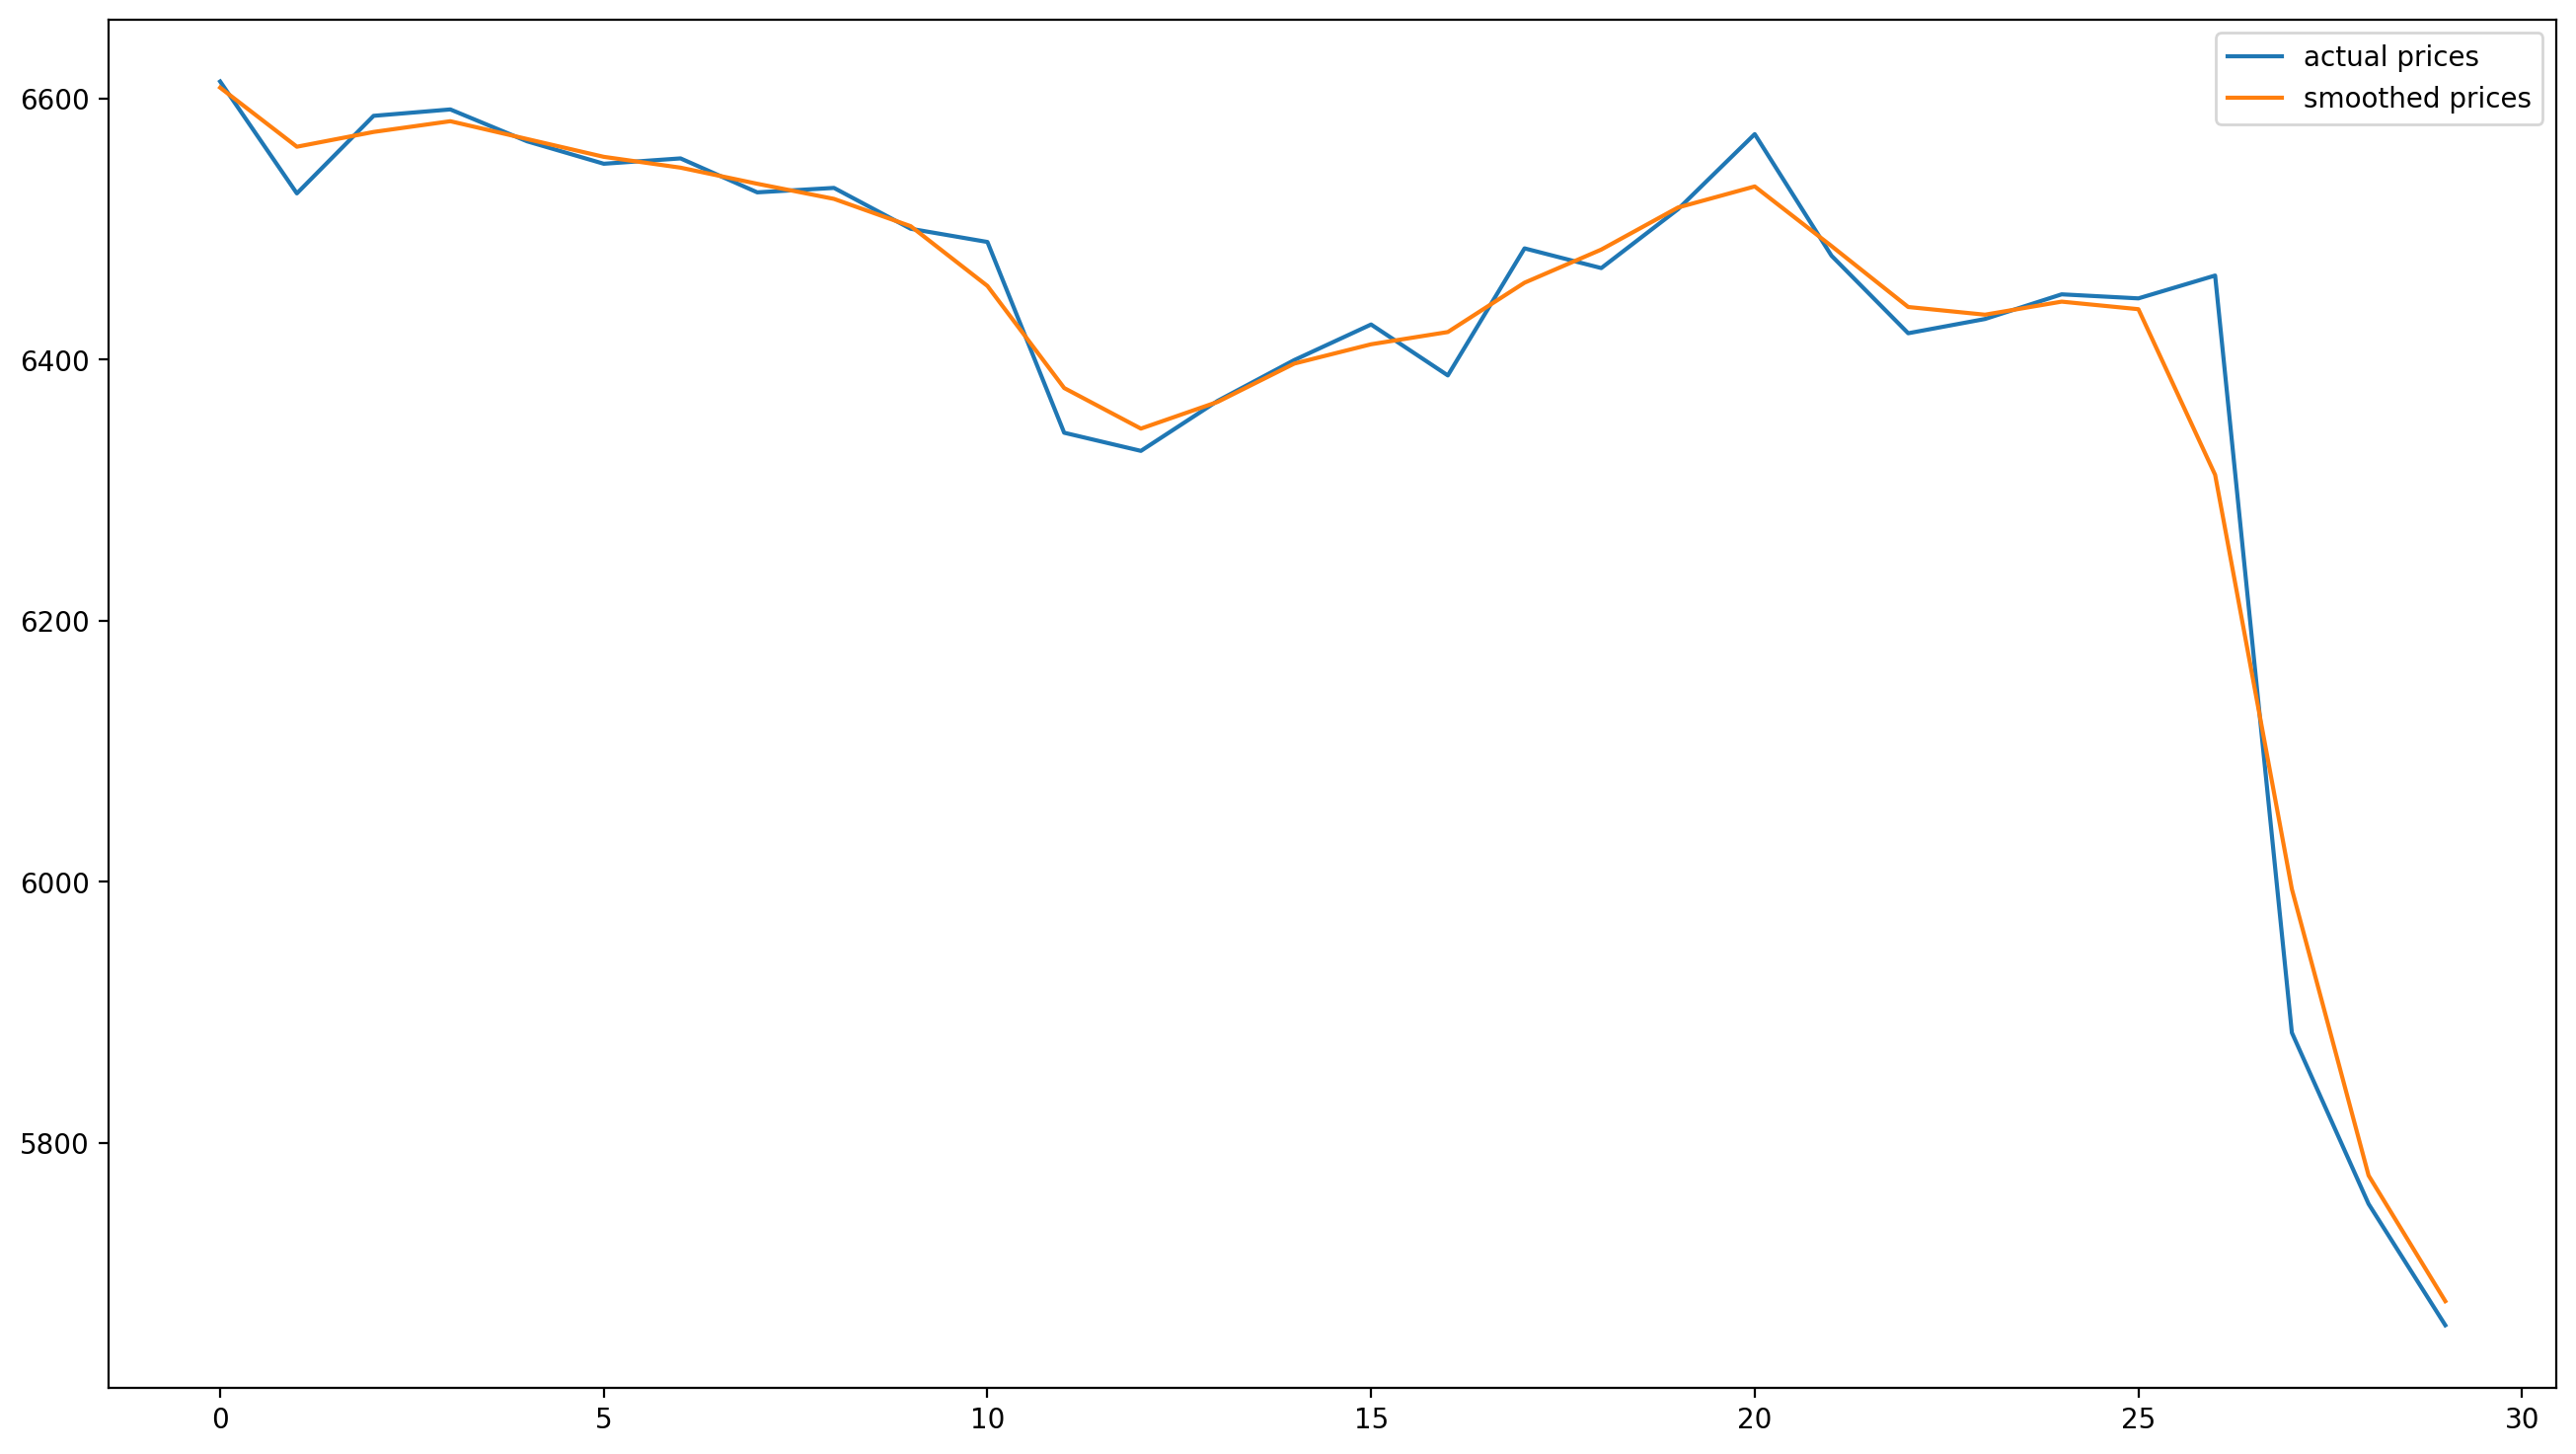

In [3]:
import pickle 
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd


# data & hyperparameter Ï°∞Ï†à 
data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')
data = data.drop(columns=['v', 'RSI', 'MA5', 'MA20', 'MA50', 'MA200']).tail(2400) #ÏàòÏ†ï

n_clusters = 10
l_min = 18
l_max = 22
dist_thre = 1.50
clus_thre = 30
dataname = f'c_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}' #ÏàòÏ†ï
print(dataname)

# hyperparameter Ï°∞Ï†à end 
data = data.reset_index(drop=True)
#data = data.iloc[::-1].reset_index(drop=True)
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)
data['close'].iloc[:30].plot()

#kernel Ï∂îÍ∞Ä
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
print([data['close'].values])
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 
smooth_prices.iloc[:30].plot()
#end

plt.legend(['actual prices', 'smoothed prices'])

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler
import torch
torch.set_default_dtype(torch.float)
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle

# from models.utils_recognition import *
from utils.utils_clustering import *
from utils.load_data import *
from models.model_params import *
from models.pattern_recognition_module import *
from models.train_ftsdiffusion import *

import yfinance as yf
from concurrent.futures import ProcessPoolExecutor
from dtaidistance import dtw_ndim
from tslearn.barycenters import softdtw_barycenter, dtw_barycenter_averaging, dtw_barycenter_averaging_subgradient

In [5]:

res_path = '/home/juwonkim/Pattern_Recognize/SISC/res/'
min_dist_list = []


class SISC:
  def __init__(self, n_clusters, l_min=10, l_max=20, gamma=.5, dist_thre = 0.8, clus_thre = 3, trad_num = 0):
    self.n_clusters = n_clusters
    self.l_min = l_min
    self.l_max = l_max
    self.dist_thre = dist_thre
    self.clus_thre = clus_thre
    self.gamma = gamma
    self.T = None  # Îç∞Ïù¥ÌÑ∞ ÏãúÌÄ∏Ïä§ Í∏∏Ïù¥
    self.centroids = None
    self.labels = None
    self.subsequences = None
    self.segmentation = None
    self.total_loss = np.inf
    self.min_loss = np.inf
    self.first_iter = True
    self.hist_loss = []
    self.converge = 0
    self.remain_idxs = []
    self.trad_num = trad_num


  def fit(self, series,
    max_iters,
    init_strategy='traditional',
    barycenter='dba',
    plot_progress=False,
    store_res=False, dataname=None):

    self.T = len(series)
    self.remain_idxs = np.arange(self.T-self.l_max+1)
    if self.first_iter:
      self.centroids = self.init_centroids(series, strategy=init_strategy)
      if plot_progress:
        self.plot_centroids(dataname, 0)
      self.first_iter = False

    # Start learning
    for iter in tqdm(range(max_iters)):
      curr_pos = 0
      new_subsequences = [] #Í∞Å Î∂ÄÎ∂Ñ subsequence ÏãúÍ≥ÑÏó¥
      new_segmentation = [] #ÌòÑÏû¨ position (index)
      new_labels = [] #Ïñ¥Îäê centroidÏóê Ìï¥ÎãπÌïòÎäîÏßÄ
      
      self.centroids = np.array([self._normalize_arr(x) for x in self.centroids])
      old_centroids = self.centroids

      # Greedy segmentation through the entire time series
      while curr_pos+self.l_min < self.T:
        #print('curr_pos: ', curr_pos)
        #ÌòÑÏû¨ posÏóêÏÑú centroid ÏßëÌï©Ïóê ÏÜçÌïòÎäî subsequenceÍ∞Ä ÏûàÎäîÏßÄ, ÏûàÏúºÎ©¥ listÏóê Ï∂îÍ∞Ä 
        if curr_pos+self.l_max >= self.T:
          curr_seg, curr_seg_len, curr_seg_label = self.compute_optimal_segment(series[curr_pos:])
        else:
          curr_seg, curr_seg_len, curr_seg_label = self.compute_optimal_segment(series[curr_pos:curr_pos + self.l_max])
        if curr_seg is not None:
          new_subsequences.append(curr_seg)
          new_labels.append(curr_seg_label)
          new_segmentation.append(curr_pos)
        curr_pos += curr_seg_len

      new_subsequences = np.array(new_subsequences, dtype=object)
      new_labels = np.array(new_labels)
      new_segmentation = np.array(new_segmentation)
      new_segmentation, new_subsequences, new_labels, new_centroids, new_mean_loss, new_init_centroid = self.update_centroids(series, new_segmentation, new_subsequences, new_labels, iter, max_iters, barycenter)
      self.hist_loss.append(new_mean_loss)
      
      
      # Update results
      self.total_loss = new_mean_loss
      self.centroids = new_centroids
      self.labels = new_labels
      self.subsequences = new_subsequences
      self.segmentation = new_segmentation
      
      
      
      # Save results
      if store_res:
        self.save_results(new_mean_loss, dataname, init_strategy, barycenter)

      # Display progress
      print(f"-- Iter {iter+1} --")
      # Ìïú Ìå®ÌÑ¥ Îãπ ÌèâÍ∑† loss
      #print(f"Total Mean Loss: {new_mean_loss}")
      if plot_progress:
        self.plot_centroids(dataname, iter+1)

      if new_init_centroid: 
        self.centroids = np.concatenate([self.centroids, new_init_centroid], axis=0)
        
      # Early-stop criteria. Ìå®ÌÑ¥Ïù¥ ÏàòÎ†¥Ìï† Í≤ΩÏö∞ 
      if self.stop_criteria(old_centroids):
        print(f"-- Converge and stop at iter {iter+1} --")
        break    
      
    plt.plot(self.hist_loss, marker='o')  # Ï†ê ÌëúÏãú Ï∂îÍ∞Ä
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(len(self.hist_loss)))
    plt.grid(True)
    plt.show()
      

      # print(f"-- Terminate at iter {max_iters} --")

    ''' ~func: initialize the centroids at the begining '''
  def init_centroids(self, series, strategy='traditional'): #(n_cluster, length, n_variable)
    if strategy=='random_noise':
      # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Ï†êÏùÑ Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú ÏÉòÌîåÎßÅ
      return np.random.normal(0, 0.2, (self.n_clusters, self.l_max))
    elif strategy=='random_sample':
      # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ seriesÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Í∞úÏàòÎßåÌÅº Î∂ÄÎ∂Ñ ÏãúÌÄÄÏä§Î•º ÏÑ†ÌÉùÌïòÏó¨ Ï§ëÏã¨Ï†êÏúºÎ°ú ÏÑ§Ï†ï
      random_indices = np.random.choice(self.T, size=self.n_clusters, replace=False)
      return [series[idx:idx + self.l_max] for idx in random_indices]
    elif strategy=='kmeans++':
      # Ï§ëÏã¨Ï†ê Í∞ÑÏùò Í±∞Î¶¨Î•º ÏµúÎåÄÌôîÌïòÏó¨ Ï¥àÍ∏∞Ìôî
      #print('init_centroids')
      return self._kmeanspp_init(series)
    elif strategy=='traditional':
      # Ï§ëÏã¨Ï†ê Í∞ÑÏùò Í±∞Î¶¨Î•º ÏµúÎåÄÌôîÌïòÏó¨ Ï¥àÍ∏∞Ìôî
      #print('traditional')
      return self._traditional_init(series, self.trad_num)
    else:
      print("Invailid strategy for cluster initialization. Use K-Means++ instead.")
      return self._traditional_init(series, self.trad_num)


  def _traditional_init(self, series, trad_num):
    bundle_name= r'/home/juwonkim/Pattern_Recognize/SISC/Traditional_pattern/SP500_traditional'
    loaded_array = np.load(bundle_name + f"/centroid_array.npy")
    result = loaded_array[:trad_num]
    #result = result[:, :, :2]
    #with open(bundle_name + f"/centroids.csv", 'rb') as f:
    #  loaded_dict = pickle.load(f)
    #del loaded_dict['RTOP']
    #del loaded_dict['RBOT']
    #result = np.array([
    #    np.stack([v['close'], v['volume'], v['rsi']], axis=1) #ÏàòÏ†ï -------
    #    for v in loaded_dict.values()
    #])[:trad_num]
    
    if len(result) == 0:
      first_centroid = False
      return self._kmeanspp_init(series)
    else: 
      centroids = []
      first_centroid = False
      # iteratively add the next centroid probably far from the existings following k-means++
      while len(result) + len(centroids) < self.n_clusters:
        select_idx, self.remain_idxs, first_centroid = self._select_next_centroid(series,
                                                            self.remain_idxs, result,
                                                            first_centroid)
        seg = series[select_idx:select_idx+self.l_max]
        cluster_segments = self._normalize_arr(np.array(seg))
        centroids.append(cluster_segments)

      if centroids:
        result = np.concatenate([result, np.array(centroids)], axis=0)
      return result


  ''' ~util: k-means++ initialization '''
  def _kmeanspp_init(self, series):
    centroids = []
    first_centroid = True
    # iteratively add the next centroid probably far from the existings following k-means++
    while len(centroids)<self.n_clusters:
      select_idx, self.remain_idxs, first_centroid = self._select_next_centroid(series,
                                                           self.remain_idxs, centroids,
                                                           first_centroid)
      seg = series[select_idx:select_idx+self.l_max]
      cluster_segments = self._normalize_arr(np.array(seg))
      centroids.append(cluster_segments)
    return np.array(centroids, dtype=object)


  ''' ~util: select the next centroid following k-means++ '''
  def _select_next_centroid(self, series, remain_idxs, centroids, first_centroid):
    if first_centroid:
      weight = np.ones(len(remain_idxs))/len(remain_idxs)
      first_centroid = False
    else:
      weight = self._weight_next_centroid(series, remain_idxs, centroids)
    np.random.seed(42) 
    select_idx = np.random.choice(remain_idxs, p=weight)
    remain_idxs = np.delete(remain_idxs, np.where(remain_idxs==select_idx))
    return select_idx, remain_idxs, first_centroid #fix: ÏõêÎûò ÏΩîÎìúÏóêÏÑú first_centroidÍ∞Ä trueÎ°ú Í≥†Ï†ïÎê®


  ''' ~util: compute the k-means++ probability of the next centroid '''
  def _weight_next_centroid(self, series, remain_idxs, centroids):
    weights = np.zeros(len(remain_idxs))
    for i, idx in enumerate(remain_idxs):
      seq = series[idx:idx+self.l_max]
      dist = [self._compute_scaled_dtw(seq, c) for c in centroids]
      weights[i] += min(dist) #fix: ÏûòÎ™ªÌëúÍ∏∞Îê®
    return weights/sum(weights)


  ''' ~util: compute the DTW distance with scaled magnitude '''
  def _compute_scaled_dtw(self, subse, centroid):
    subse = self._normalize_arr(subse) 
    return self._calculate_dtw(subse, centroid)


  def _normalize_arr(self, arr): #Í∞Å Î≥ÄÏàòÎ≥Ñ normalize
      scaler = MinMaxScaler(feature_range=(0, 1))

      # Îç∞Ïù¥ÌÑ∞Í∞Ä pandas DataFrameÏù∏ Í≤ΩÏö∞, numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
      if not isinstance(arr, np.ndarray):
          arr = arr.to_numpy()

      float_arr = arr.astype(float)
      # Îç∞Ïù¥ÌÑ∞Í∞Ä numpy ndarrayÏù¥Í≥† 2Ï∞®ÏõêÏù∏ Í≤ΩÏö∞
      if isinstance(float_arr, np.ndarray) and float_arr.ndim == 2:
          for i in range(float_arr.shape[1]):
              float_arr[:, i] = scaler.fit_transform(float_arr[:, i].reshape(-1, 1)).flatten()
      elif isinstance(float_arr, np.ndarray) and float_arr.ndim == 1:  # Îç∞Ïù¥ÌÑ∞Í∞Ä 1Ï∞®Ïõê numpy Î∞∞Ïó¥Ïù∏ Í≤ΩÏö∞
          float_arr = scaler.fit_transform(float_arr.reshape(-1, 1))
      else:
          raise TypeError("Input must be a pandas DataFrame or a numpy ndarray.")
      return float_arr        #(Î≥ÄÏàò Í∞úÏàò, subsequence ÏãúÍ≥ÑÏó¥ Í∏∏Ïù¥), 2Ï∞®Ïõê


  def _calculate_dtw_parallel(self, stock1, stock2, parts=1):
    '''
    part_length = len(stock1) // parts
    results = []

    with ProcessPoolExecutor() as executor:
        futures = [
            executor.submit(self._calculate_dtw, stock1[i*part_length:(i+1)*part_length], stock2[i*part_length:(i+1)*part_length])
            for i in range(parts)
        ]
        results = [f.result() for f in futures]

    total_distance = sum(results)  # Ïù¥ ÏòàÏ†úÏóêÏÑúÎäî Í∞ÑÎã®Ìûà Í≤∞Í≥ºÎ•º Ìï©ÏÇ∞Ìï©ÎãàÎã§.
    return total_distance
    '''
    return self._calculate_dtw(stock1, stock2)

  def _calculate_dtw(self, stock1, stock2):
    """Ï£ºÏñ¥ÏßÑ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú DTW Í±∞Î¶¨Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§."""
    distance = dtw_ndim.distance(stock1, stock2)
    return distance



  ''' ~util: find the possible segnments in a given sequence in length of l_max '''
  def _possible_segments(self, sequence, norm=True):
    #print('sequence in possible_segment: ', type(sequence), sequence.shape) #dataframe type, (length=20, Î≥ÄÏàò Ïàò=3)
    if norm:
      #print('norm ÌïòÍ∏∞')
      subseqs = [self._normalize_arr(sequence[:l]) for l in range(self.l_min, self.l_max+1)]
      #print('subseqs: ', subseqs) #shape: (max-min+1, length, n_variable)
    else:
      subseqs = [sequence[:l] for l in range(self.l_min, self.l_max+1)]
    return np.array(subseqs, dtype=object)

  ''' ~util: find the centroid with the minimum DTW distance '''
  def _compute_nearest_dtw(self, subsequence):
    distances = []
    for i, centroid in enumerate(self.centroids):
      distance = self._compute_scaled_dtw(subsequence, centroid)
      distances.append(distance)
    return min(np.array(distances)), int(np.argmin(np.array(distances)))

  def _new_centroid_compute_nearest_dtw(self, subsequence, centroid):
    distances = []
    distance = self._compute_scaled_dtw(subsequence, centroid)
    distances.append(distance)
    return min(np.array(distances)), int(np.argmin(np.array(distances)))
  
  def new_centroid_compute_optimal_segment(self, sequence, centroid):
      subsequences = self._possible_segments(sequence, norm=True) #shape: (max-min+1, length, n_variable)
      min_dist_label_pairs = np.array([self._new_centroid_compute_nearest_dtw(seq, centroid) for seq in subsequences]) #((2,2), (3,2), (4,2), (5,2))
      dist_column = min_dist_label_pairs[:, 0]
      min_sum = np.min(dist_column)
      min_dist_pos = np.argmin(dist_column)
      min_dist_list.append(min_sum)
      if min_sum < self.dist_thre:
        seq_optimal = subsequences[min_dist_pos]
        l_optimal = 5
        return seq_optimal, int(l_optimal)
      else:
        return None, 5

  def compute_optimal_segment(self, sequence):
    #norm=True: norm Ìï¥ÏïºÌïúÎã§Îäî Îßê
    #_possible_segments() Í∞ÄÎä•Ìïú Í∏∏Ïù¥Ïùò subsequenceÎ•º Î™®Îëê return. Í∞Å Î≥ÄÏàòÎ≥ÑÎ°ú 0-1 normalize Îêú ÏÉÅÌÉú
    subsequences = self._possible_segments(sequence, norm=True) #shape: (max-min+1, length, n_variable)
    min_dist_label_pairs = np.array([self._compute_nearest_dtw(seq) for seq in subsequences]) #((2,2), (3,2), (4,2), (5,2))
    dist_column = min_dist_label_pairs[:, 0]
    min_sum = np.min(dist_column)
    min_dist_pos = np.argmin(dist_column)
    min_dist_list.append(min_sum)
    
    if min_sum < self.dist_thre:
      seq_optimal = subsequences[min_dist_pos]
      l_optimal = 5
      label_optimal = min_dist_label_pairs[min_dist_pos, 1]
      return seq_optimal, int(l_optimal), int(label_optimal)
    else:
      #print('no matching')
      # Îß§Ïπ≠ÎêòÎäî centroidÍ∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ 3 ÎßåÌÅº curr_pos Ïù¥Îèô
      return None, 5, 0


  ''' ~func: update the centroids given the new segmented subsequences and labels '''
  def update_centroids(self, series, segmentation, subsequences, labels, iter, max_iters, barycenter='dba'):
    new_centroids = []
    filtered_indices = []
    new_init_centroid = []
    total_loss = 0.0

    for i in range(self.n_clusters):
      cluster_segments = subsequences[labels==i]
      #print(len(cluster_segments))
      if len(cluster_segments) >= self.clus_thre: # hyperparameter n_subsuquenceÍ∞Ä threshÎ•º ÎÑòÏßÄ ÏïäÎäî cluster center ÏÇ≠Ï†ú
        centroid = self._compute_centroid(cluster_segments, barycenter)
        centroid = self._normalize_arr(centroid)
        new_centroids.append(centroid)
        inner_mean_loss = self._compute_inner_loss(cluster_segments, centroid)
        total_loss += inner_mean_loss
        
        condition = labels == i
        
        if np.any(condition):
          indices = np.where(condition)[0]    
          filtered_indices.extend(indices)
    #print('filtered_indices: ', filtered_indices)
    segmentation = segmentation[filtered_indices]
    subsequences = subsequences[filtered_indices]
    labels = labels[filtered_indices]

    #print('before cluster num: ', len(new_centroids))
    if iter+1 < max_iters: # ÎßàÏßÄÎßâ iterÏóêÎäî 15Í∞ú Ïù¥ÏÉÅ subseÍ∞Ä ÏûàÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ cluster ÏóÜÏï†Í∏∞
      if len(new_centroids) == 0:  #fix: centroidÍ∞Ä ÌïòÎÇòÎèÑ ÎßåÎì§Ïñ¥ÏßÄÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞
        print('kmean++ Ïì∞ÏûÑ')
        new_centroids.extend(self.init_centroids(series, strategy='kmeans++'))
      else:
        init_new_centr = self.n_clusters - len(new_centroids)
        #print('init_new_centr: ', init_new_centr)
        for i in range(init_new_centr):  # fix Î™®ÏûêÎûÄ cluster Í∞úÏàòÎßåÌÅº cluster centroid initalize
          select_idx, self.remain_idxs, _ = self._select_next_centroid(series,
                                                              self.remain_idxs, new_centroids,
                                                              first_centroid=False)
          seg = series[select_idx:select_idx+self.l_max]
          cluster_segments = self._normalize_arr(np.array(seg))
          new_init_centroid.append(cluster_segments)
          #Í∏∞Ï°¥Ïùò centroidÎäî Îã§Î•∏ subsequenceÎì§Ïùò ÌèâÍ∑†Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ï†úÍ±∞Ìï† idx ÏóÜÏùå

    if not new_centroids:
      total_loss = -np.inf
    else:
      total_loss /= len(new_centroids)
    return segmentation, subsequences, labels, np.array(new_centroids, dtype=object), total_loss / len(new_centroids), new_init_centroid



  ''' ~util: normalize the segments into the standard scale in magnitude '''
  def _normalize_segments(self, segments):
    segments_norm = []
    for seg in segments:
        max_values = np.max(seg, axis=0)
        min_values = np.min(seg, axis=0)
        seg_norm = (seg - min_values) / (max_values - min_values)
        segments_norm.append(seg_norm)
    return np.array(segments_norm, dtype=object)



  ''' ~util: compute centroid given the subsequences with a cluster '''
  def _compute_centroid(self, subsequences, barycenter='dba'):
    # Use DTW
    if barycenter=='dba':
      return dtw_barycenter_averaging(subsequences, barycenter_size=self.l_max, tol=1e-5)
    # Use soft-DTW
    elif barycenter=='softdtw':
      subseq_lengths = [len(subseq) for subseq in subsequences]
      index_maxlen = np.argmax(subseq_lengths)
      interp_f = interp1d(np.linspace(0, 1, len(subsequences[index_maxlen])), subsequences[index_maxlen])
      subsequences[index_maxlen] = interp_f(np.linspace(0, 1, self.l_max))
      return softdtw_barycenter(subsequences, gamma=self.gamma, tol=1e-5)



  ''' ~util: compute the inner cluster loss '''
  def _compute_inner_loss(self, subsequences, centroid):
    inner_loss = 0.0
    for subseq in subsequences:
      inner_loss += self._compute_scaled_dtw(subseq, centroid)
    return inner_loss / len(subsequences)



  '''~func: early stop criteria'''
  def stop_criteria(self, old_centroids, epsilon=5e-1):
    #if len(new_centroids) != self.n_clusters:
    #  return False
    #Í∞Å centroidÏùò ÏàúÏÑúÎäî ÏÉàÎ°ú Îß§Ïπ≠Îê®
    for new, old in zip(self.centroids, old_centroids):
      dtw = self._compute_scaled_dtw(new, old)
      print('dtw: ', dtw)
      #print(epsilon * np.sqrt(self.centroids.shape[2]))
      if dtw > (epsilon * np.sqrt(self.centroids.shape[2])):
        self.converge = 0
        #print('self.converge: ', self.converge)
        return False
    if self.converge == 0:
      self.converge = 1
      print('self.converge: ', self.converge)
      return False
    return True
  


  ''' ~func: plot the centroids '''
  def plot_centroids(self, dataname='BTC', iter=0):
    n_rows = 1
    n_cols = len(self.centroids)
    #print('n_cols: ', n_cols)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows * 0.7))
    
    # axsÍ∞Ä Îã®Ïùº Í∞ùÏ≤¥Ïù¥Î©¥ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò, Î∞∞Ïó¥Ïù¥Î©¥ ÌèâÌÉÑÌôî
    if n_cols == 1:
        axs = [axs]
        
    for i, centroid in enumerate(self.centroids):
      axs[i].plot(centroid)
      axs[i].get_xaxis().set_visible(False)
      axs[i].get_yaxis().set_visible(False)

    plt.tight_layout()  # Í∑∏ÎûòÌîÑ Í∞Ñ Í≤πÏπ® Î∞©ÏßÄ
    #plt.savefig(f'/home/juwonkim/Pattern_Recognize/SISC/pic/plot_{iter}_{dataname}.png')  # ÌååÏùºÎ°ú Ï†ÄÏû•
    plt.close()
    #plt.show()


    ''' ~func: save the results '''
  def save_results(self, new_mean_loss, dataname, init_strategy, barycenter):
    if new_mean_loss<=self.min_loss:
      self.min_loss = new_mean_loss
      dict_init = {'traditional': 'trad',
                   'kmeans++': 'kmpp',
                  'random_sample': 'rs',
                  'random_noise': 'rn',
                  'reference':'ref'}
      filename = f"sisc_{dataname}_k{self.n_clusters}_l{self.l_min}-{self.l_max}_{barycenter[:4]}_{dict_init[init_strategy]}"
      
      unique_vals = sorted(set(self.labels))
      mapping = {val: i for i, val in enumerate(unique_vals)}
      new_label = [mapping[a] for a in self.labels]

      with open(res_path + filename +'_centroids.pkl', 'wb') as file:
        pickle.dump(self.centroids, file)
      with open(res_path + filename +'_labels.pkl', 'wb') as file:
        pickle.dump(new_label, file)
      with open(res_path + filename +'_subsequences.pkl', 'wb') as file:
        pickle.dump(self.subsequences, file)
      with open(res_path + filename +'_segmentation.pkl', 'wb') as file:
        pickle.dump(self.segmentation, file)
      with open(res_path + filename +'_MinMeanLoss.txt', 'wb') as file:
        pickle.dump(self.min_loss, file)  

# Î≥ÄÏàòÏóê Îî∞Î•∏ Ìå®ÌÑ¥ Ïàò/Ïú†ÏÇ¨ÎèÑ/ÌèâÍ∑† dtw

dataname:  c_10_18_22_30_BTC


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  0.4883849714113392
dtw:  1.230563819434544
-- Iter 2 --
dtw:  0.14756541228937575
dtw:  0.2621208126688545
dtw:  0.1749656880556286
dtw:  0.22955532087251226
dtw:  0.1531970921867637
dtw:  0.26160641011561026
dtw:  0.23070993600878092
dtw:  0.09332863712644143
dtw:  0.31671800439024606
dtw:  0.3565684124608039
self.converge:  1
-- Iter 3 --
dtw:  0.08476001921764952
dtw:  0.21932935527904954
dtw:  0.08771464367395683
dtw:  0.13335533225374768
dtw:  0.06163638313590274
dtw:  0.12480328772328765
dtw:  0.3564284067771231
dtw:  0.4713053587341252
dtw:  0.154877644312985
dtw:  0.35574035293472916
-- Converge and stop at iter 3 --


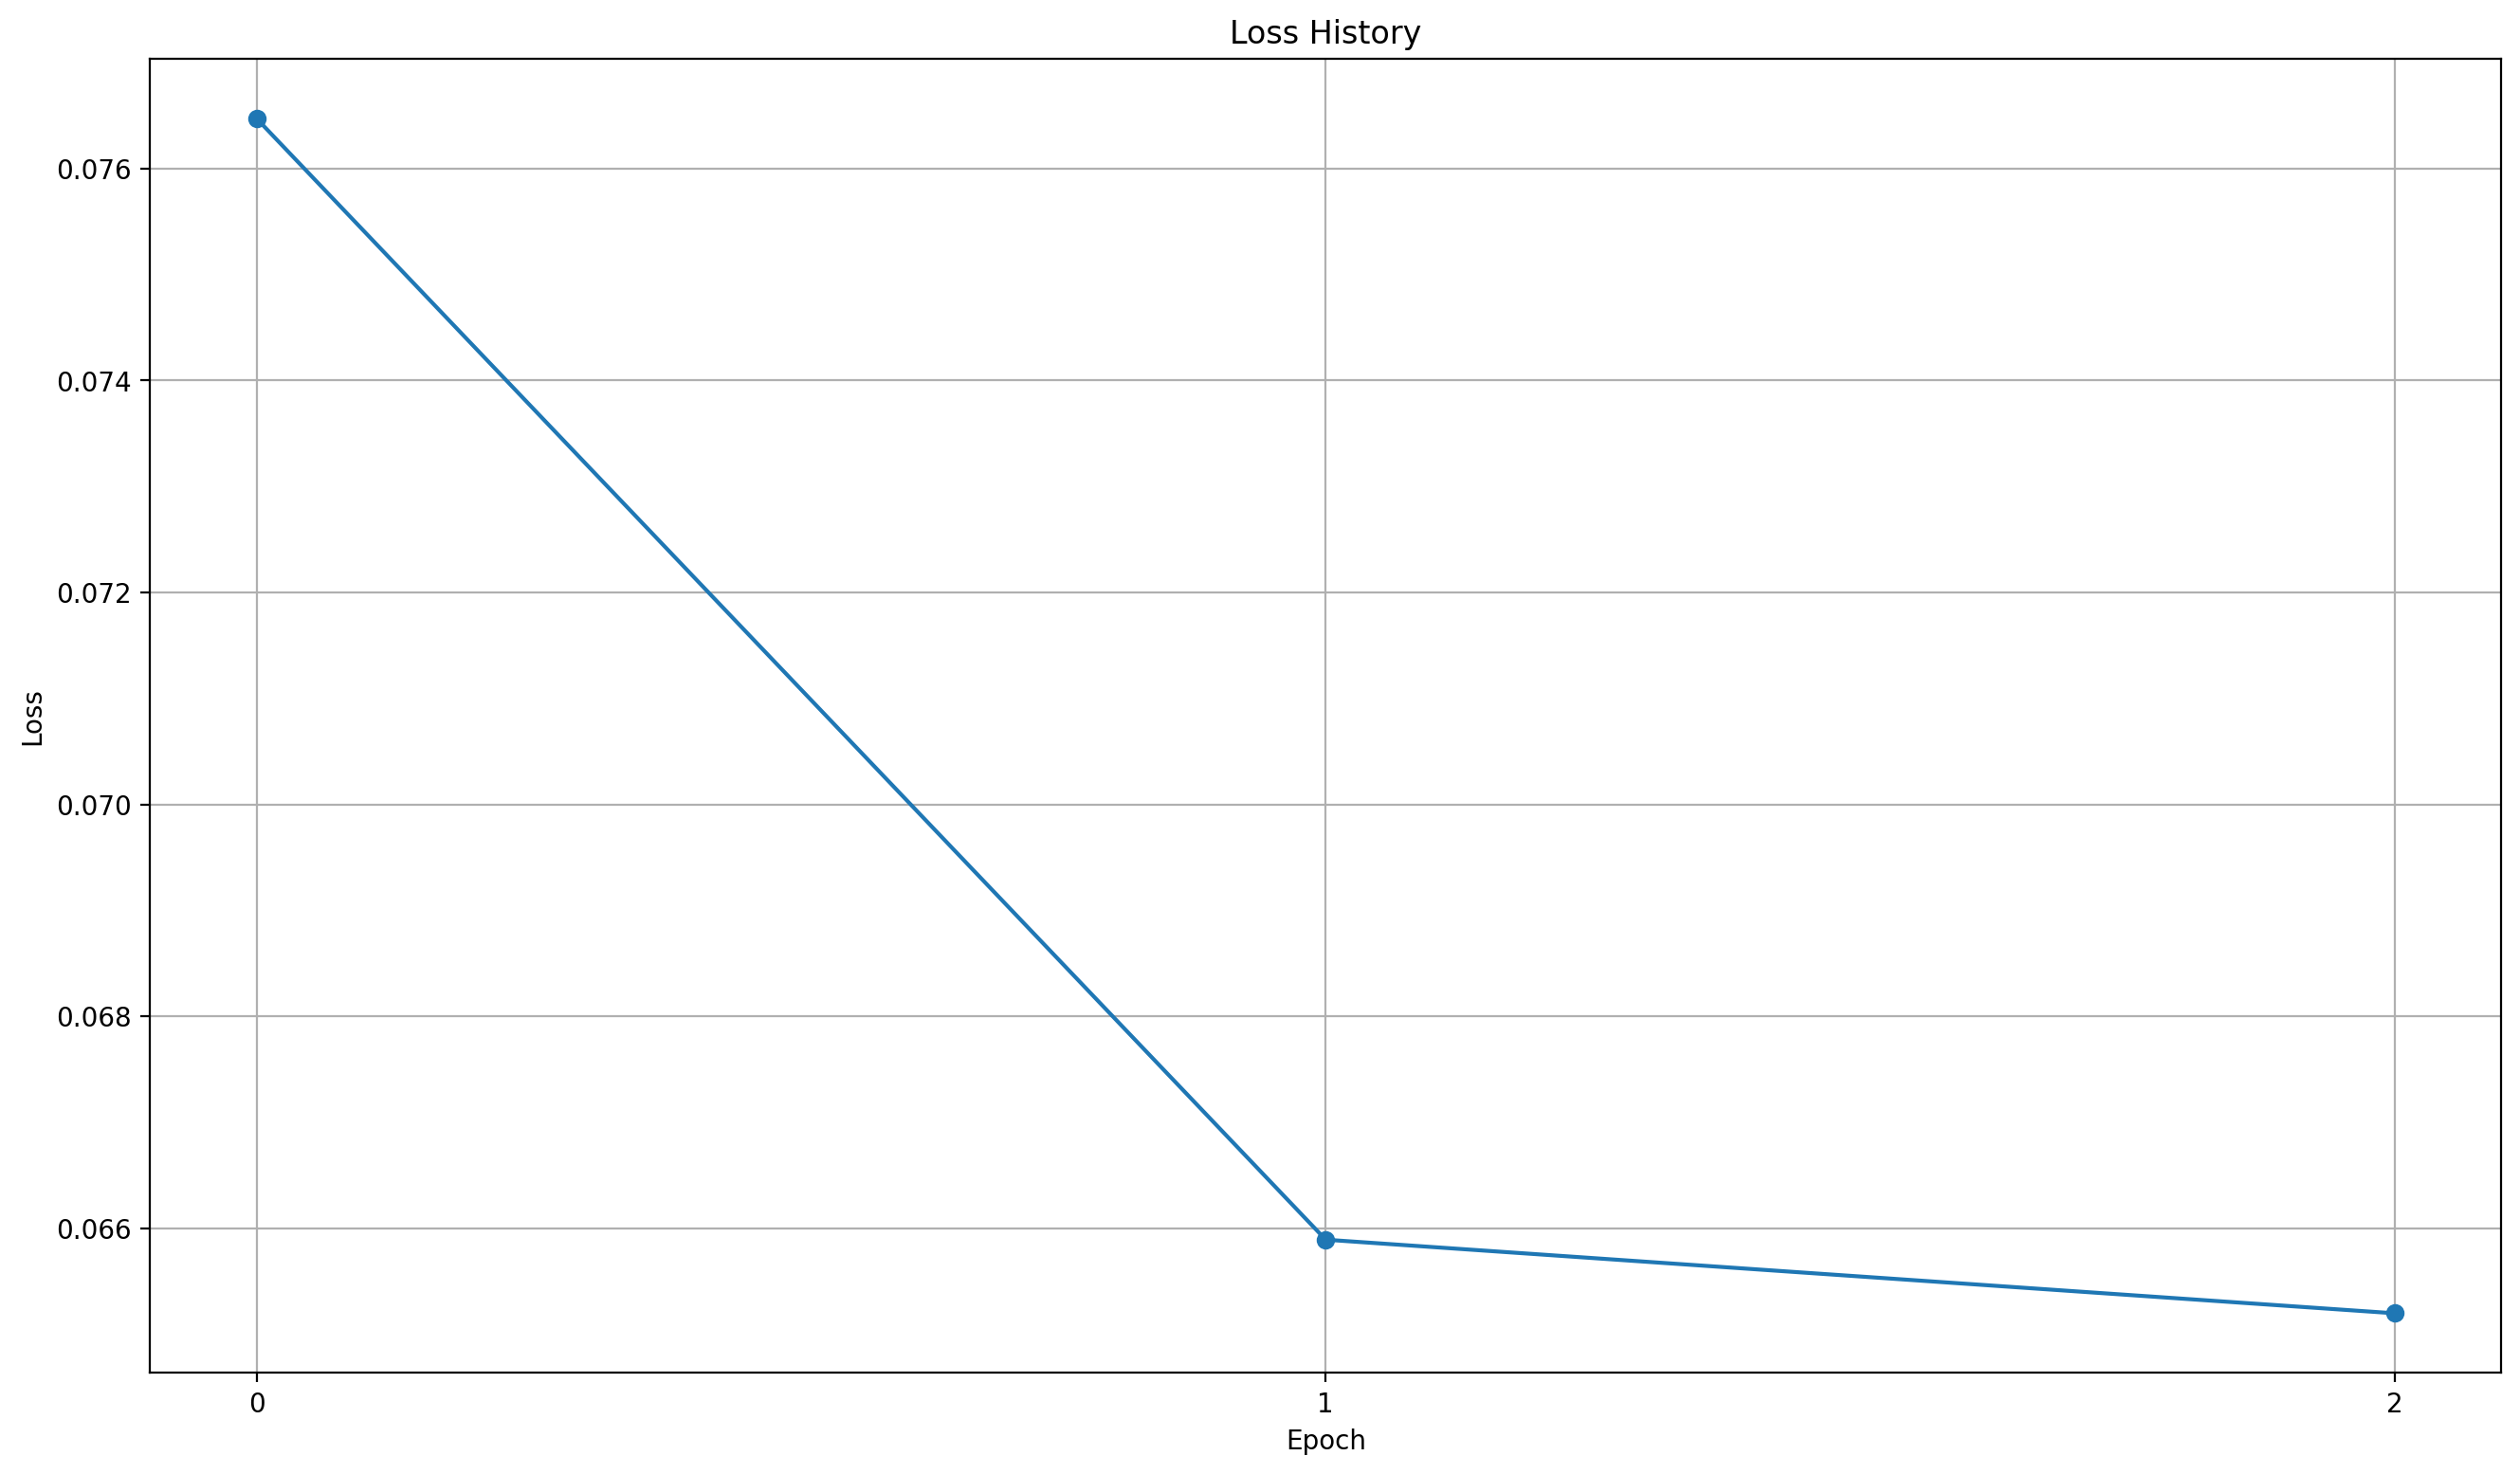

In [ ]:
# BTC / close 

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['v', 'RSI', 'MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 10
l_min = 18
l_max = 22
dist_thre = 1.50 #ÏàòÏ†ï
clus_thre = 30
variable = 'c' #ÏàòÏ†ï
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, dist_thre=dist_thre, clus_thre=clus_thre)
sisc.fit(series=data,
          max_iters=300,
          init_strategy='kmeans++', 
          barycenter='dba',
          plot_progress=True, 
          store_res=True, dataname=dataname)

dataname:  cv_10_18_22_30_BTC


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.5320625730348219
0.7071067811865476
-- Iter 2 --
dtw:  0.8407190757280278
0.7071067811865476
-- Iter 3 --
dtw:  0.5460011444010383
0.7071067811865476
dtw:  0.348097450200467
0.7071067811865476
dtw:  0.5484652933382999
0.7071067811865476
dtw:  0.46685186296041653
0.7071067811865476
dtw:  0.5641742776713916
0.7071067811865476
dtw:  0.8688847324222715
0.7071067811865476
-- Iter 4 --
dtw:  0.6060694625133604
0.7071067811865476
dtw:  0.2839757848125215
0.7071067811865476
dtw:  0.8536529690708877
0.7071067811865476
-- Iter 5 --
dtw:  0.4084976644408386
0.7071067811865476
dtw:  0.38817821800450486
0.7071067811865476
dtw:  0.810585151601116
0.7071067811865476
-- Iter 6 --
dtw:  0.3852081164912818
0.7071067811865476
dtw:  0.5076607192972421
0.7071067811865476
dtw:  0.7890192543276315
0.7071067811865476
-- Iter 7 --
dtw:  0.48282341517361993
0.7071067811865476
dtw:  0.4148662454012224
0.7071067811865476
dtw:  0.858378871441029
0.7071067811865476
-- Iter 8 --
dtw:  0.30525129

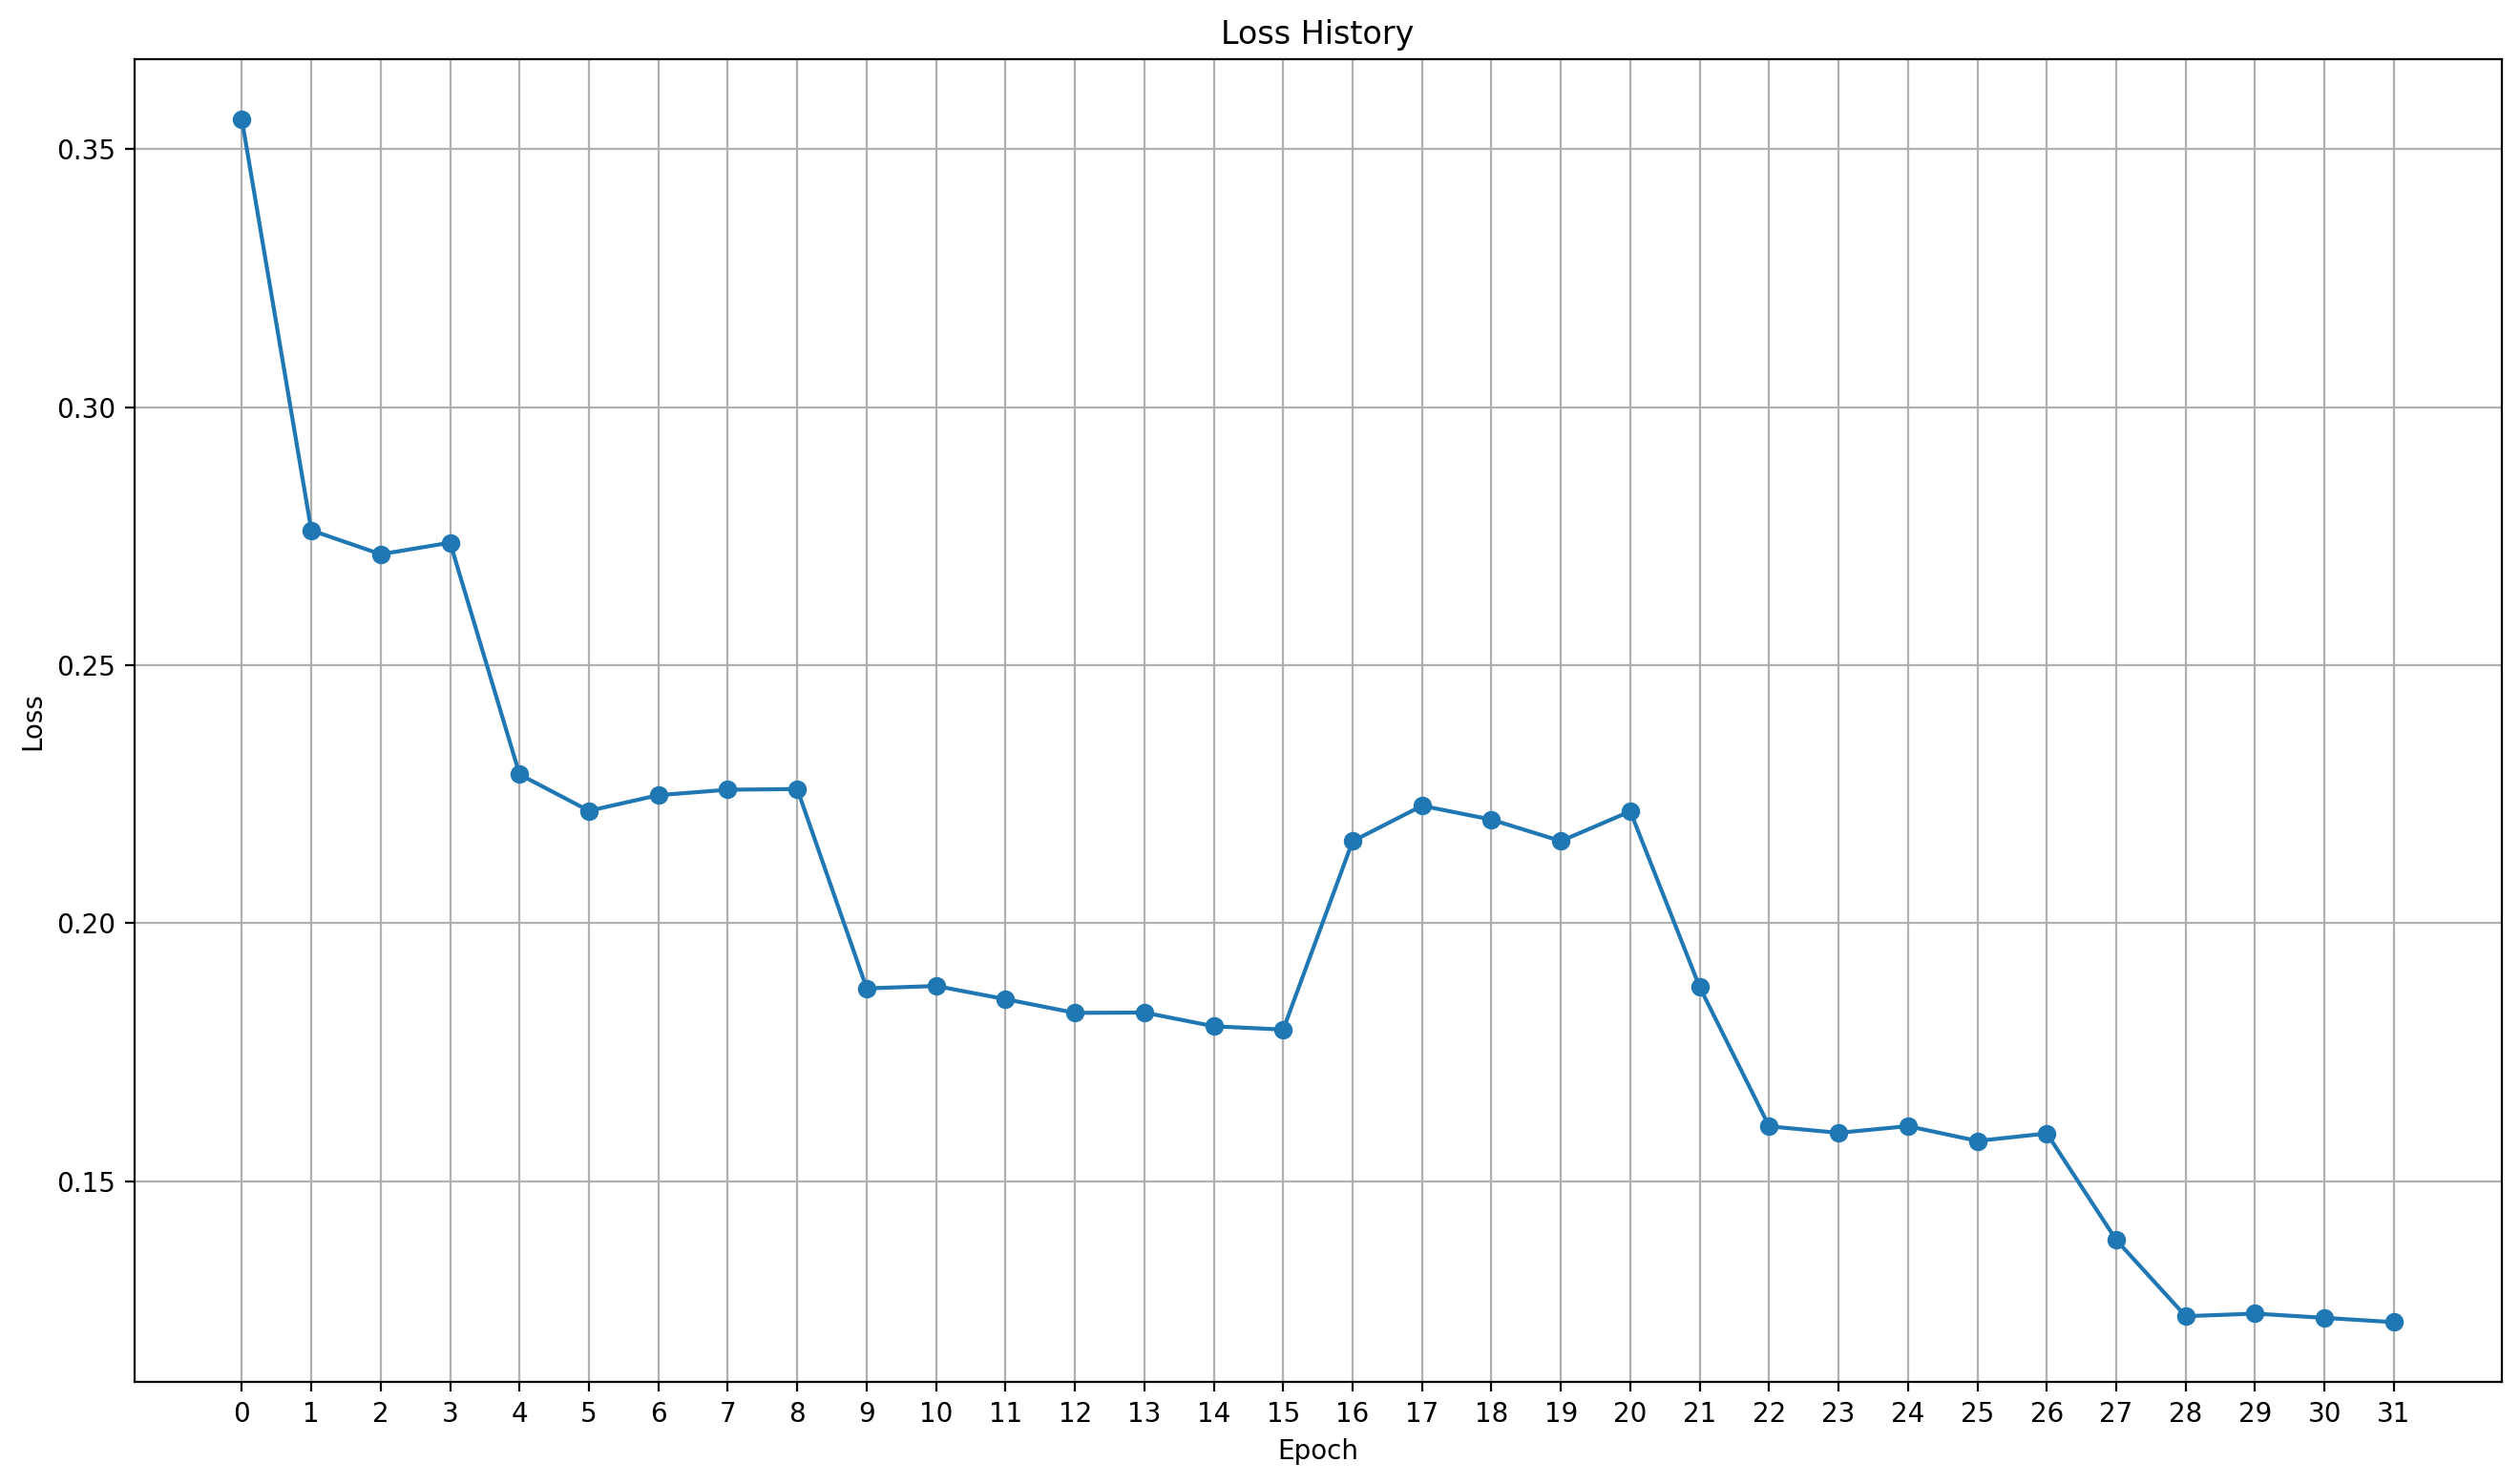

In [ ]:
# BTC / close + volume

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['RSI', 'MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 10
l_min = 18
l_max = 22
dist_thre = 2.1213  #ÏàòÏ†ï
clus_thre = 30
variable = 'cv'  #ÏàòÏ†ï
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}' #ÏàòÏ†ï
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, dist_thre=dist_thre, clus_thre=clus_thre)
sisc.fit(series=data,
          max_iters=300,
          init_strategy='kmeans++', 
          barycenter='dba',
          plot_progress=True, 
          store_res=True, dataname=dataname)

dataname:  cr_10_18_22_30_BTC


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  0.6866389506745028
dtw:  1.167555986781551
-- Iter 2 --
dtw:  0.5829235282479142
dtw:  0.8177314794486777
-- Iter 3 --
dtw:  0.5519038735904196
dtw:  0.5981960401141633
dtw:  0.38580814132004154
dtw:  0.3658912189029251
dtw:  0.2876561914867047
dtw:  1.4678484941821361
-- Iter 4 --
dtw:  0.36002847728034765
dtw:  0.6783876018962932
dtw:  0.526998093285523
dtw:  0.17615187114207678
dtw:  0.2563419020720171
dtw:  1.1027454990918057
-- Iter 5 --
dtw:  0.4066629769456579
dtw:  0.579451246213291
dtw:  0.4401408786377318
dtw:  0.2825803085840262
dtw:  0.21684927673975937
dtw:  1.891568248978233
-- Iter 6 --
dtw:  0.2872370523535633
dtw:  0.4582690211340259
dtw:  0.39315988578488764
dtw:  0.19162152200008328
dtw:  0.2735724968579747
dtw:  2.2313177694275788
-- Iter 7 --
dtw:  0.2393508939901884
dtw:  0.4839033817327369
dtw:  0.30679477652578235
dtw:  0.34020392583378917
dtw:  0.22523204567361196
dtw:  0.6650545699559584
dtw:  1.0386202035875083
-- Iter 8 --
dtw:  0.38918374

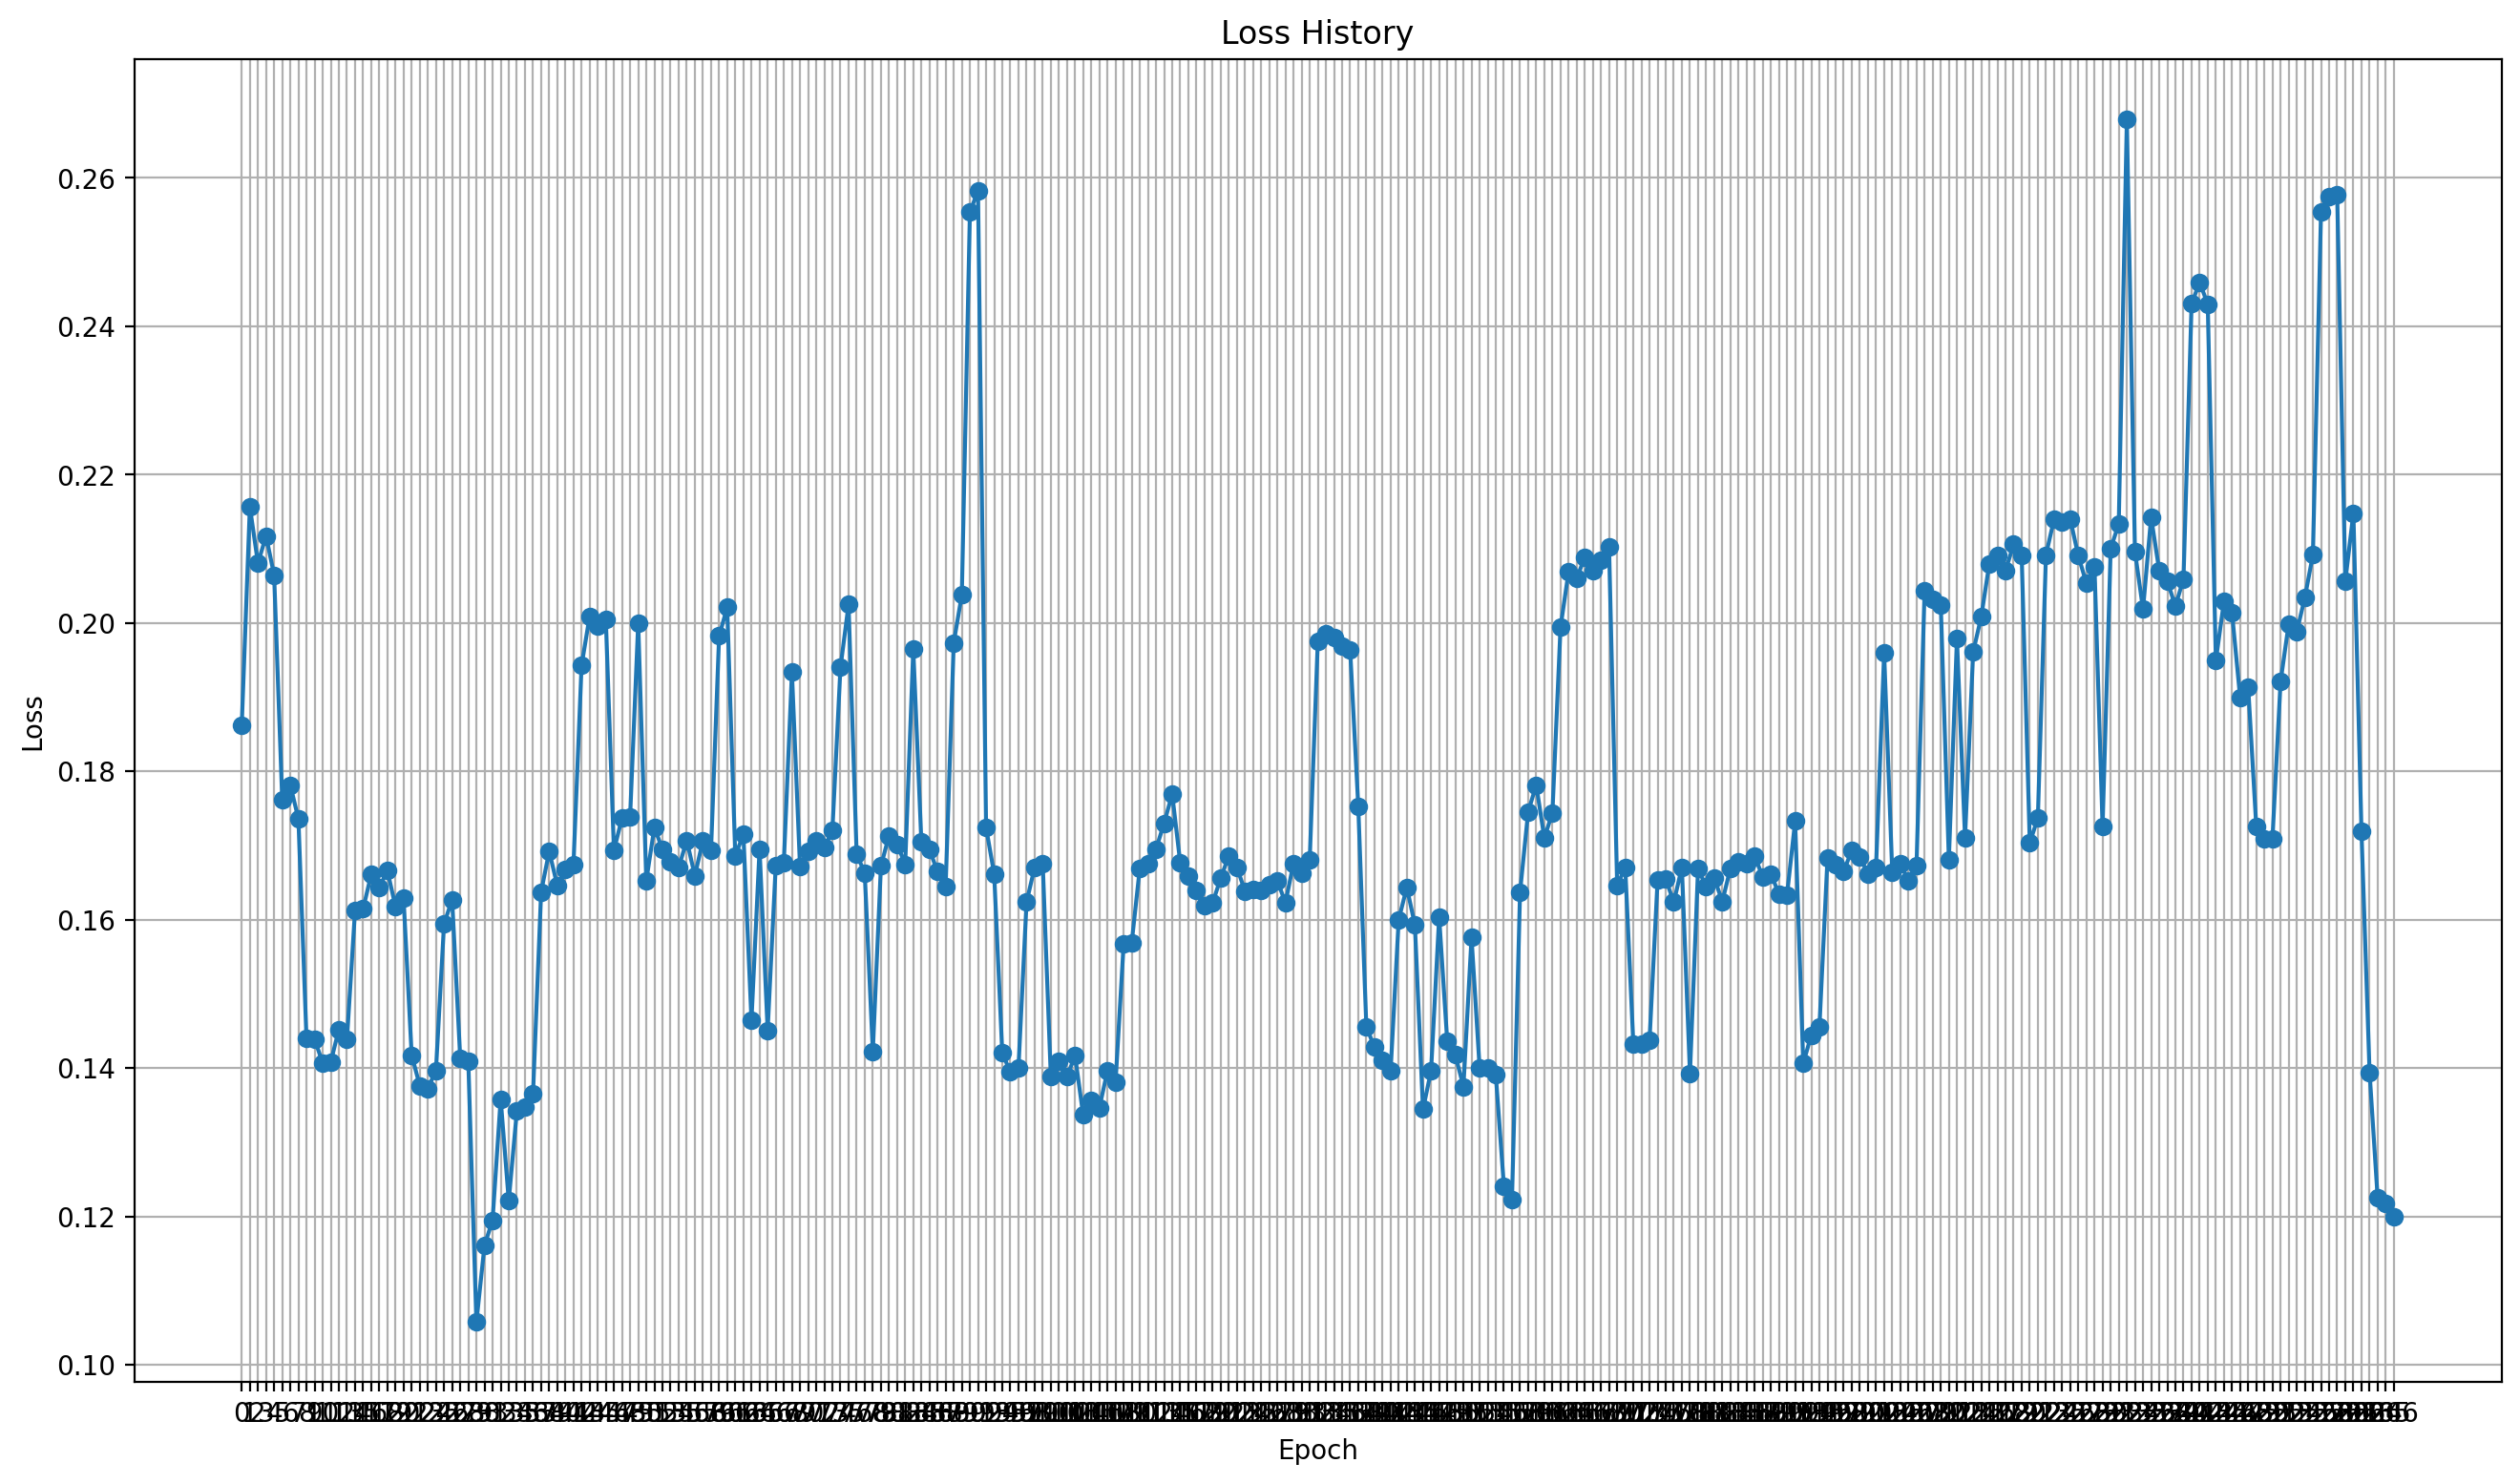

In [ ]:
# BTC / close + rsi

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['v', 'MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 10
l_min = 18
l_max = 22
dist_thre = 2.1213  #ÏàòÏ†ï
clus_thre = 30
variable = 'cr'  #ÏàòÏ†ï
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}'
print('dataname: ', dataname)


#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, dist_thre=dist_thre, clus_thre=clus_thre)
sisc.fit(series=data,
          max_iters=300,
          init_strategy='kmeans++', 
          barycenter='dba',
          plot_progress=True, 
          store_res=True, dataname=dataname)

dataname:  cvr_10_18_22_30_BTC


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.203540557877207
-- Iter 2 --
dtw:  1.0945357046295219
-- Iter 3 --
dtw:  0.7249088718883966
dtw:  0.811445622882693
dtw:  0.5942074622795258
dtw:  0.7799068771529911
dtw:  0.8399694232211145
dtw:  3.021128593646083
-- Iter 4 --
dtw:  0.7299675686096903
dtw:  0.5807495037406578
dtw:  0.5246053224986097
dtw:  0.5960196904620951
dtw:  0.5259636312711456
dtw:  0.8447504951213992
dtw:  1.0734160752613484
-- Iter 5 --
dtw:  0.6240812527407313
dtw:  0.6627873027458203
dtw:  0.8424540680881065
dtw:  0.6681246129576532
dtw:  0.593125032012238
dtw:  0.6926754319038777
dtw:  3.778687761111161
-- Iter 6 --
dtw:  0.7958355766544594
dtw:  0.37459501616865915
dtw:  0.5986782807078788
dtw:  0.602394338962953
dtw:  0.9773965354496911
-- Iter 7 --
dtw:  0.4908672135038473
dtw:  0.3265968201040609
dtw:  0.3667496467420651
dtw:  0.22953861187978528
dtw:  0.712029872831358
dtw:  0.9806266919175171
-- Iter 8 --
dtw:  0.5589243555905657
dtw:  0.52959019316518
dtw:  0.3727839929762396
dtw

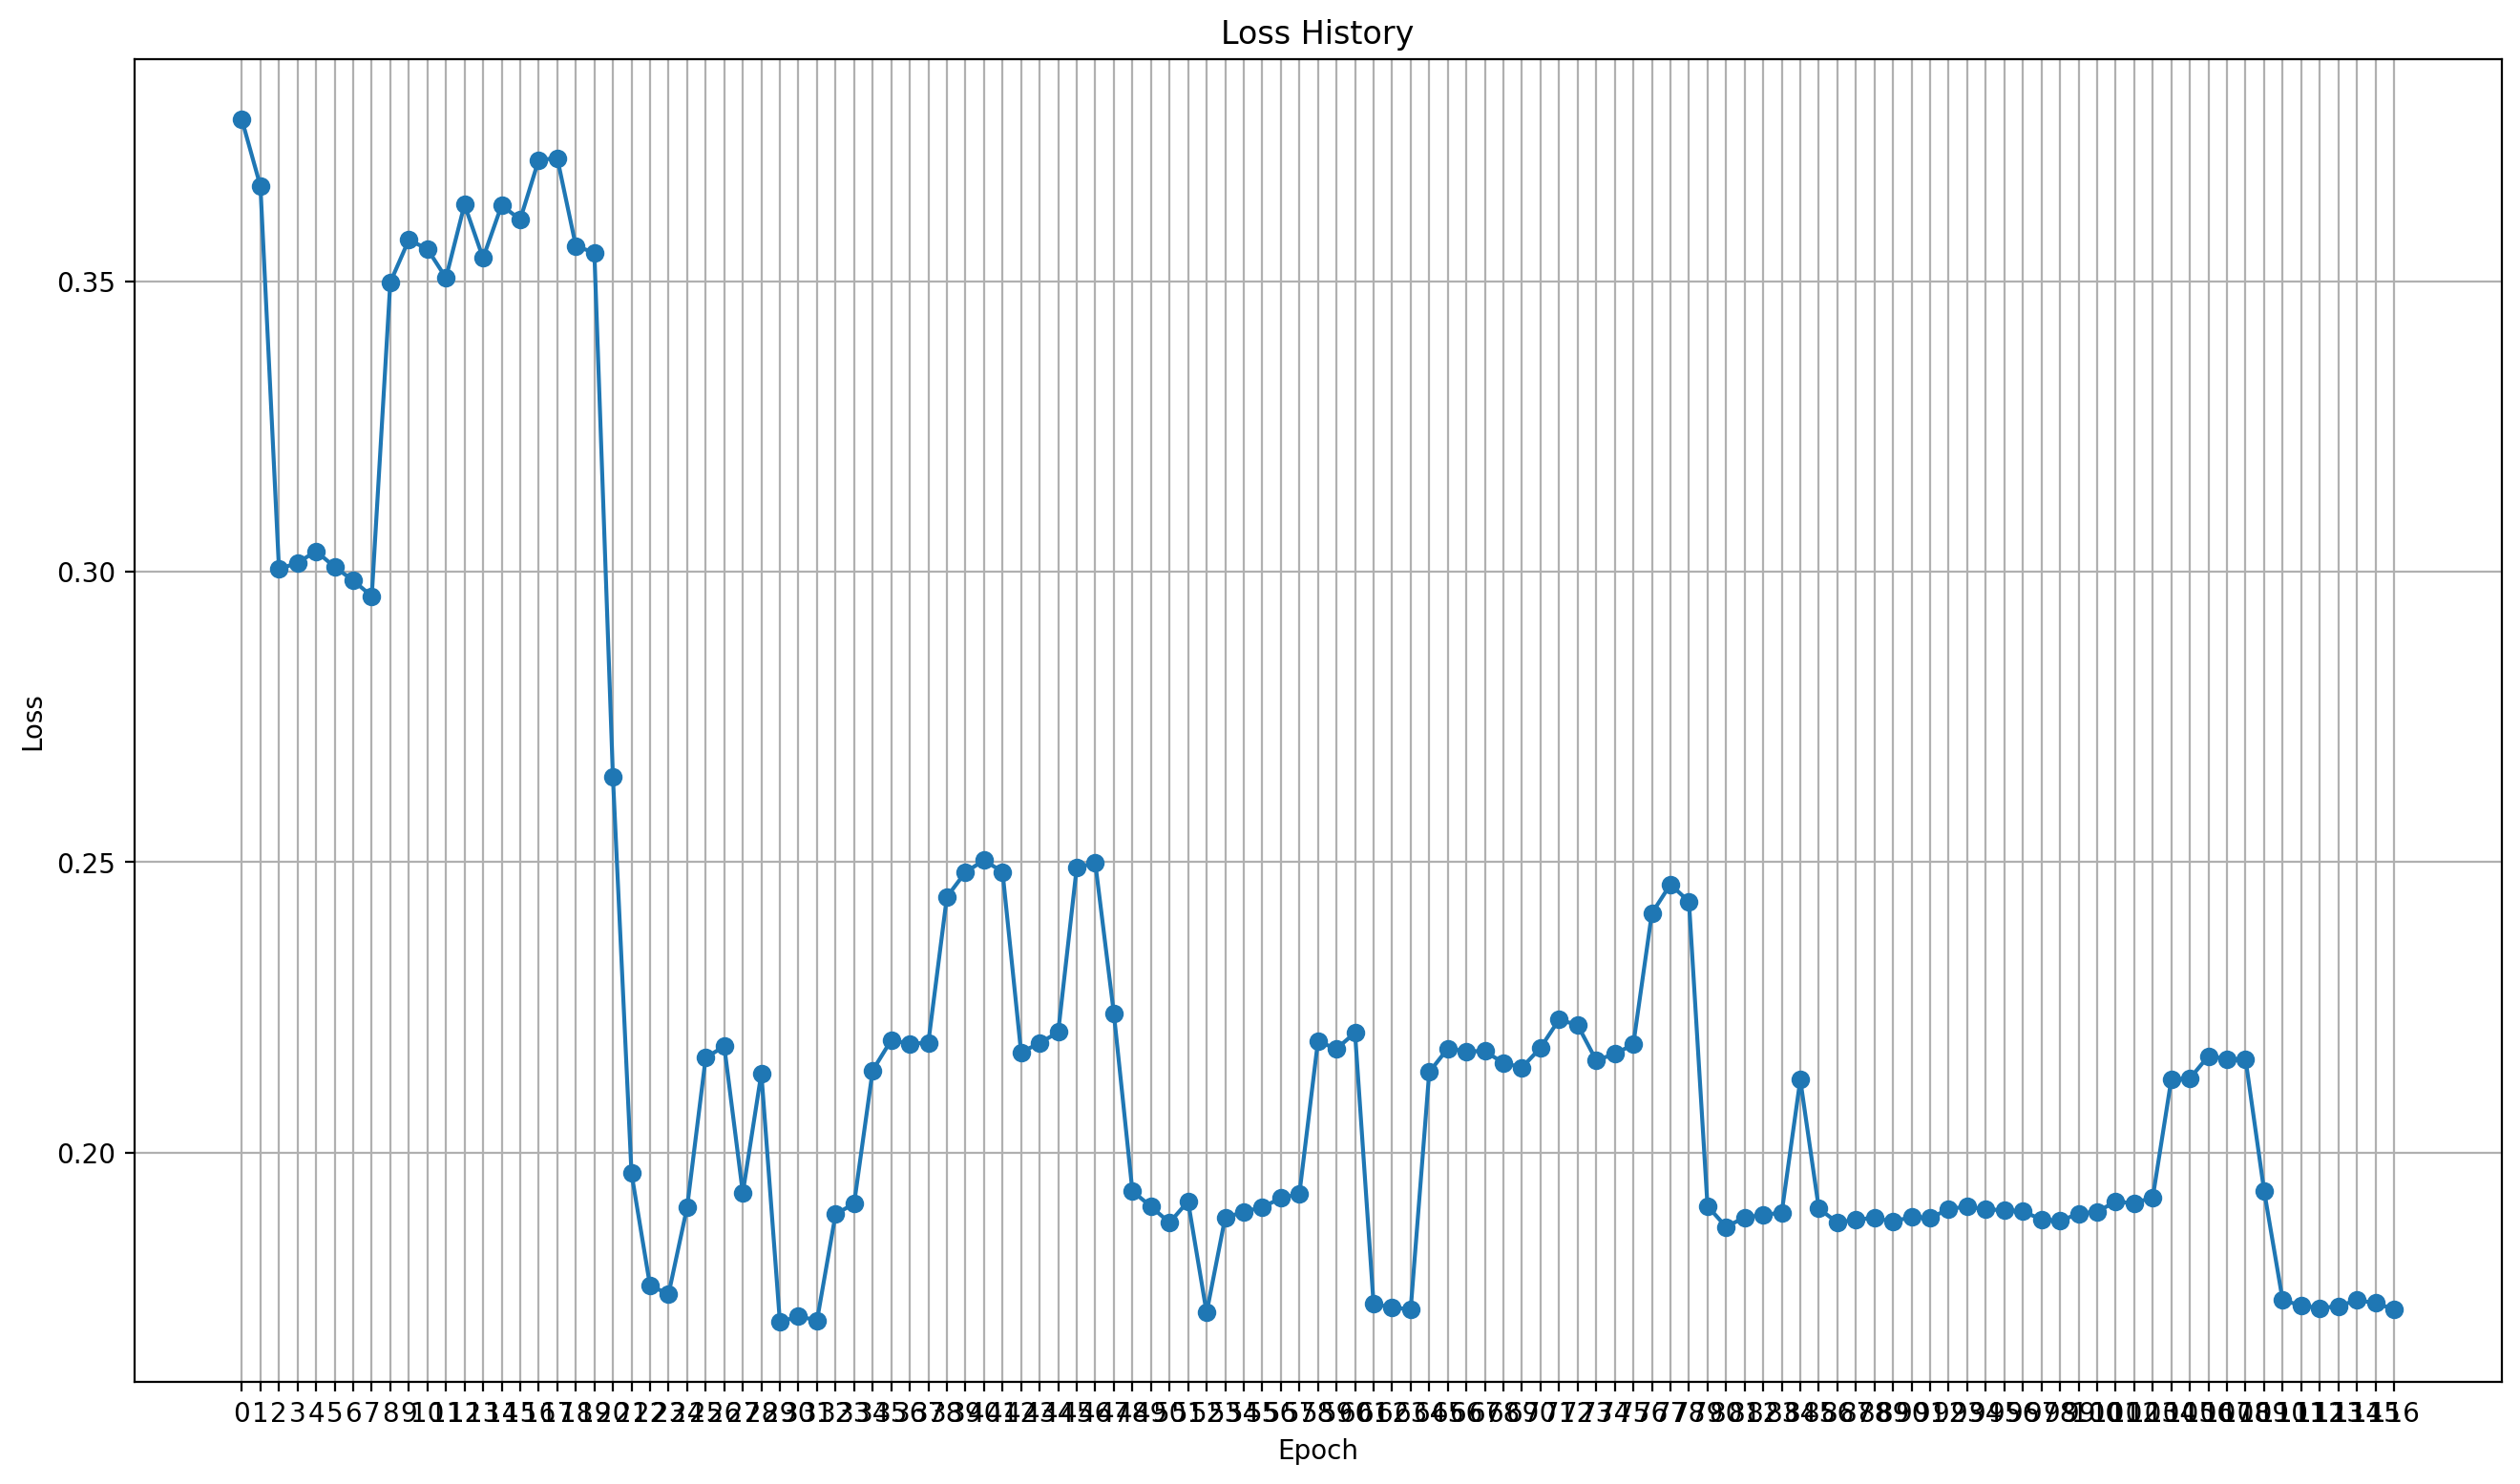

In [ ]:
# BTC / close + volume + rsi

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 10
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}' #ÏàòÏ†ï
print('dataname: ', dataname)


#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, dist_thre=dist_thre, clus_thre=clus_thre)
sisc.fit(series=data,
          max_iters=300,
          init_strategy='kmeans++',
          barycenter='dba',
          plot_progress=True, 
          store_res=True, dataname=dataname)

dataname:  cvrmm_10_18_22_30_BTC


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  2.7788494494713145
-- Iter 2 --
dtw:  1.4232566010012402
-- Iter 3 --
dtw:  1.239315012855653
-- Iter 4 --
dtw:  0.9276701975747497
dtw:  1.0197227064626857
dtw:  1.2061328963230047
-- Iter 5 --
dtw:  0.8344182929690355
dtw:  0.5167624887359091
dtw:  1.1606119047970254
-- Iter 6 --
dtw:  1.140383611513096
-- Iter 7 --
dtw:  1.153631078732785
-- Iter 8 --
dtw:  0.8407683472290103
dtw:  0.47852364692844673
dtw:  0.8395883685247852
dtw:  0.4630563165521144
dtw:  0.9190844361057228
dtw:  0.7563076663744984
dtw:  2.4161548126500305
-- Iter 9 --
dtw:  0.9707114129632628
dtw:  0.896010365390534
dtw:  0.6889026906946167
dtw:  0.46669044679391375
dtw:  1.0641382889118431
dtw:  0.6823818260180123
dtw:  4.641679433228682
-- Iter 10 --
dtw:  0.7500529402576671
dtw:  0.760990990893293
dtw:  0.7089064849628748
dtw:  0.5351142001957568
dtw:  0.9229062932127136
dtw:  1.1468340133104942
-- Iter 11 --
dtw:  0.8419771690645603
dtw:  0.5726333200161834
dtw:  0.715159788060449
dtw:  0.71

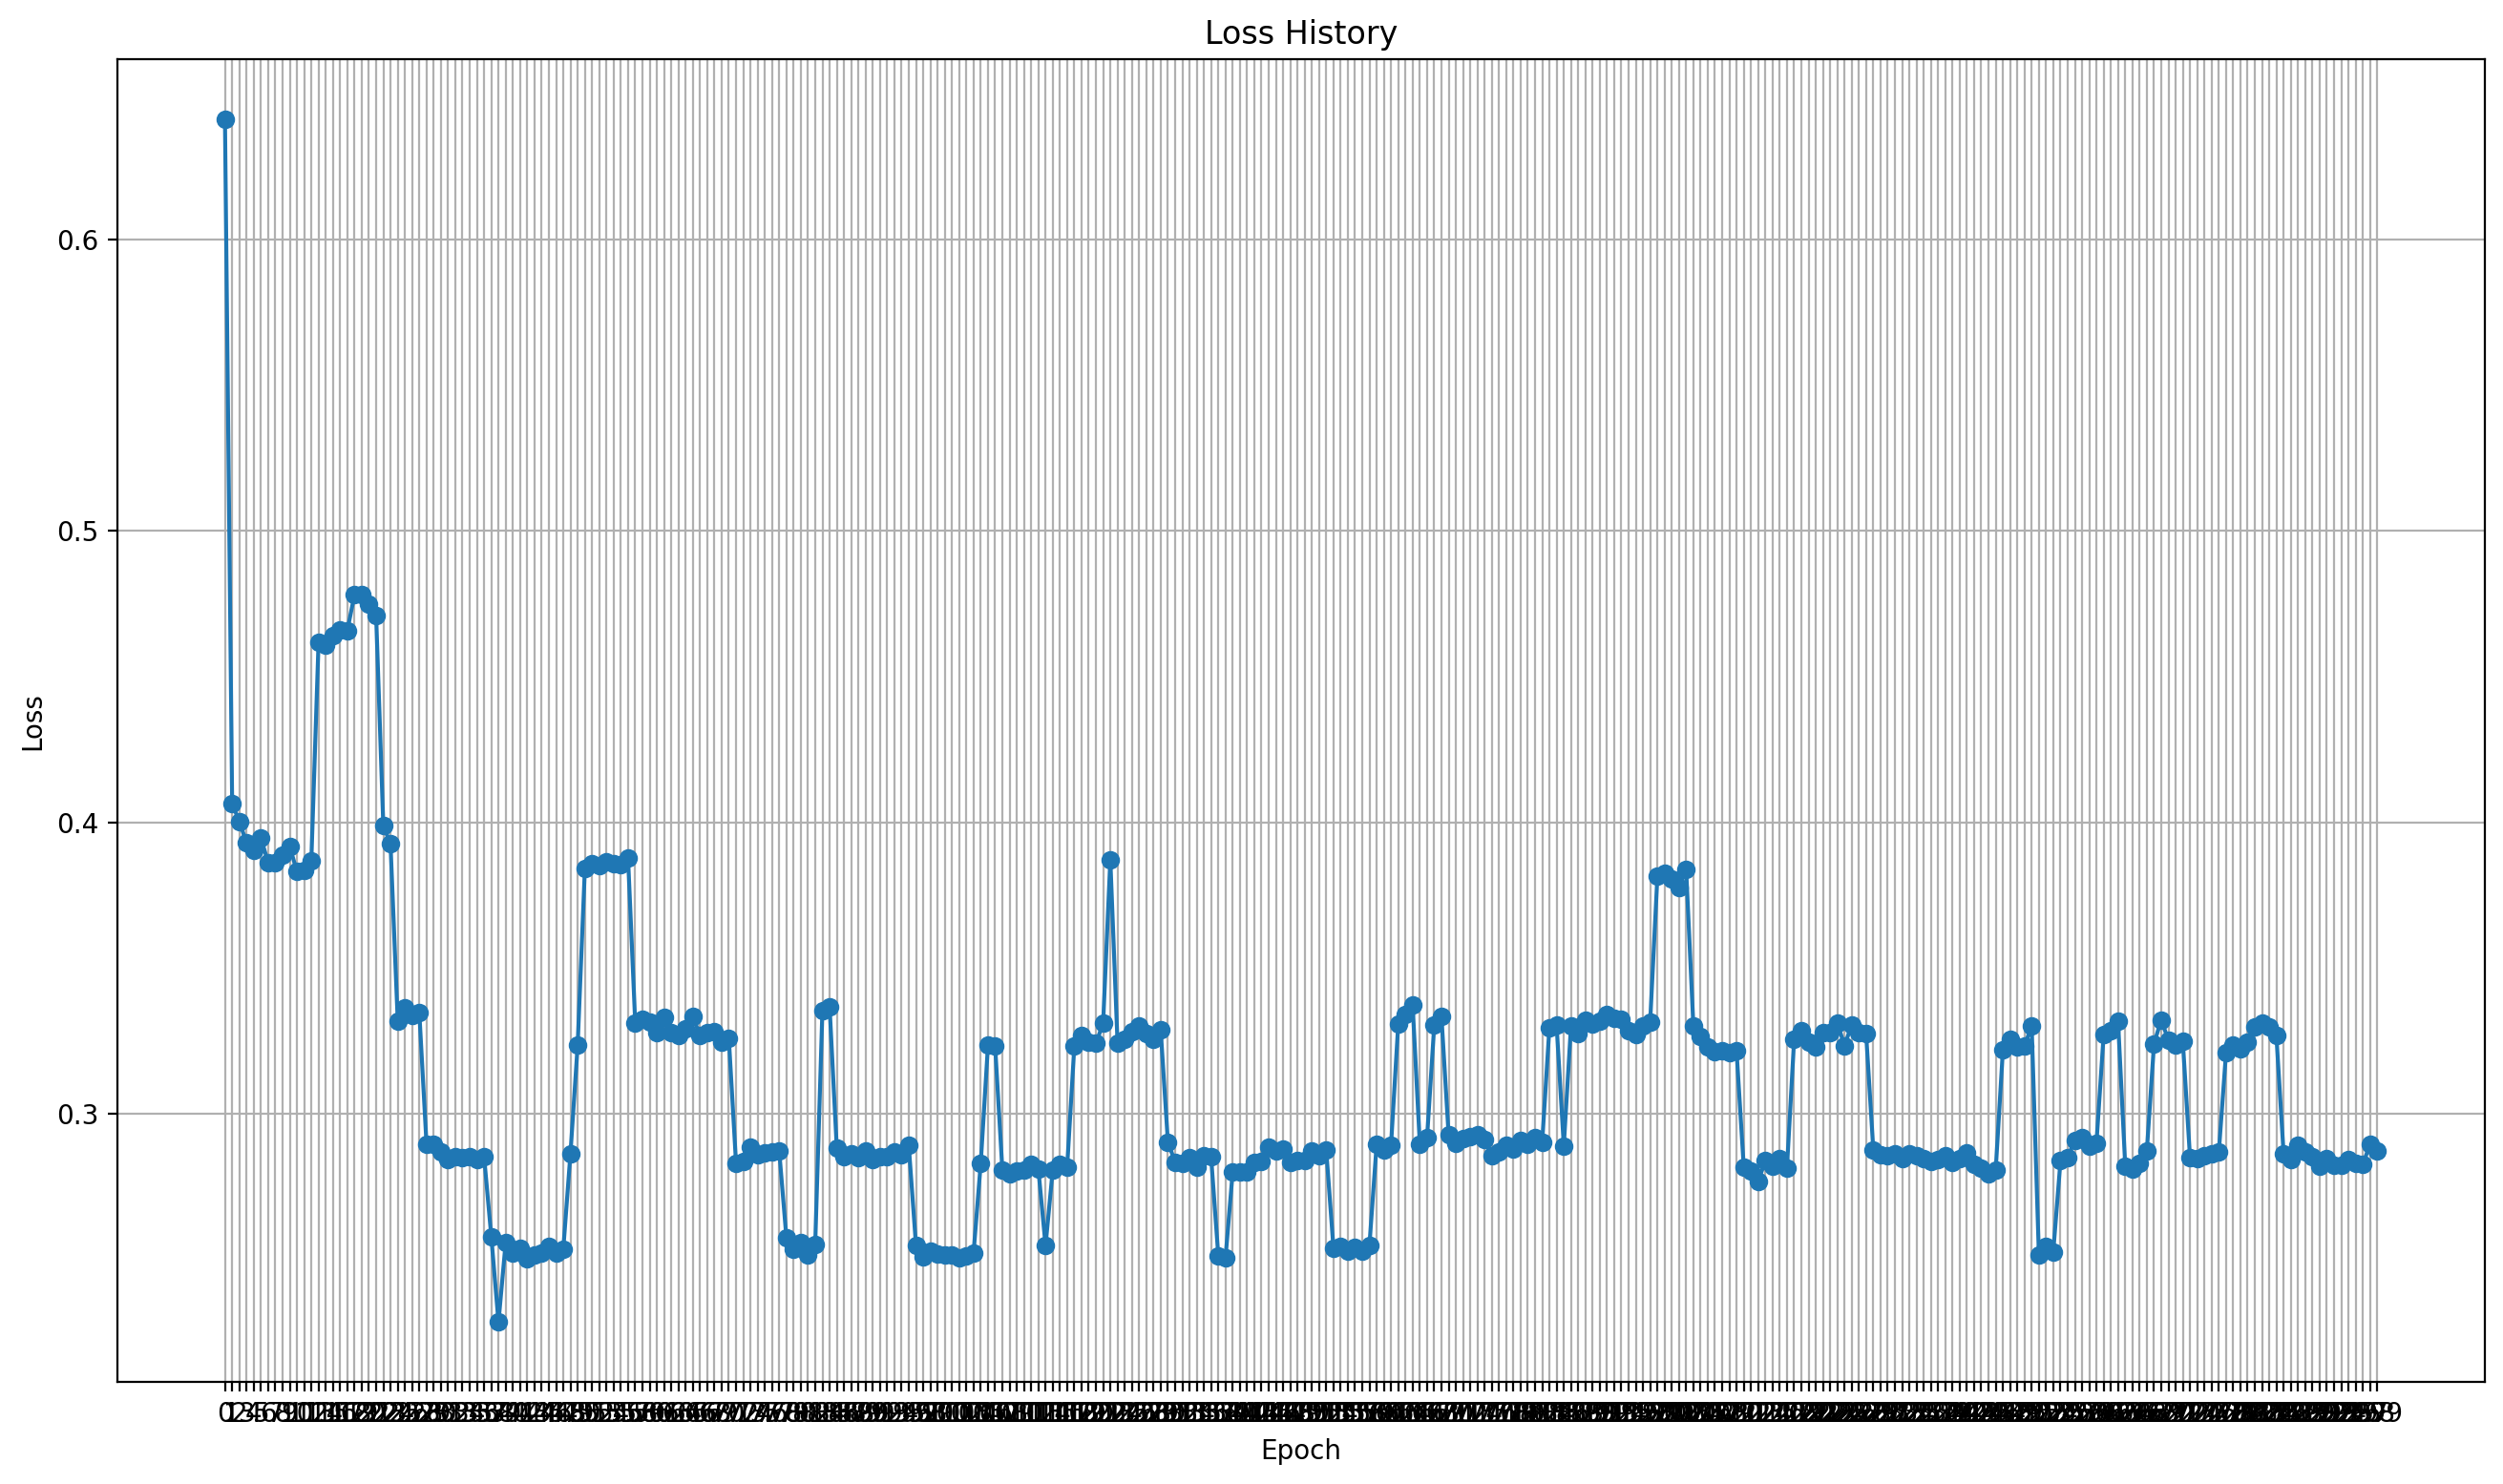

In [ ]:
# BTC / close + volume + rsi + ma5 + ma200

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA20', 'MA50']).head(2400) #ÏàòÏ†ï
n_clusters = 10
l_min = 18
l_max = 22
dist_thre = 3.3541  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvrmm'  #ÏàòÏ†ï
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, dist_thre=dist_thre, clus_thre=clus_thre)
sisc.fit(series=data,
          max_iters=300,
          init_strategy='kmeans++', 
          barycenter='dba',
          plot_progress=True, 
          store_res=True, dataname=dataname)

# Ïù¥Ïö©ÌïòÎäî Ï†ÑÌÜµÌå®ÌÑ¥ ÏàòÏóê Îî∞Î•∏ Ìå®ÌÑ¥ Ïàò/Ïú†ÏÇ¨ÎèÑ/ÌèâÍ∑† dtw ÎπÑÍµê

dataname:  cvr_6_18_22_30_BTC_0


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.3918181164187253
-- Iter 2 --
dtw:  0.6818312808368634
dtw:  1.1576681945382352
-- Iter 3 --
dtw:  0.9274701387738088
-- Iter 4 --
dtw:  1.19393893894911
-- Iter 5 --
dtw:  0.7894606539126827
dtw:  0.7422575924447755
dtw:  0.1563126147374027
dtw:  0.3293542773061679
dtw:  0.41739574410813585
dtw:  0.9326340450697881
-- Iter 6 --
dtw:  0.8570542295735782
dtw:  0.5642829922647213
dtw:  0.25373456434282216
dtw:  0.19683247786951485
dtw:  0.29819111931370446
dtw:  0.6419594561182526
self.converge:  1
-- Iter 7 --
dtw:  0.8242700126263782
dtw:  0.4357154348698774
dtw:  0.2581567293179025
dtw:  0.21591979310199344
dtw:  0.5362240084829699
dtw:  0.7499687149376499
-- Converge and stop at iter 7 --


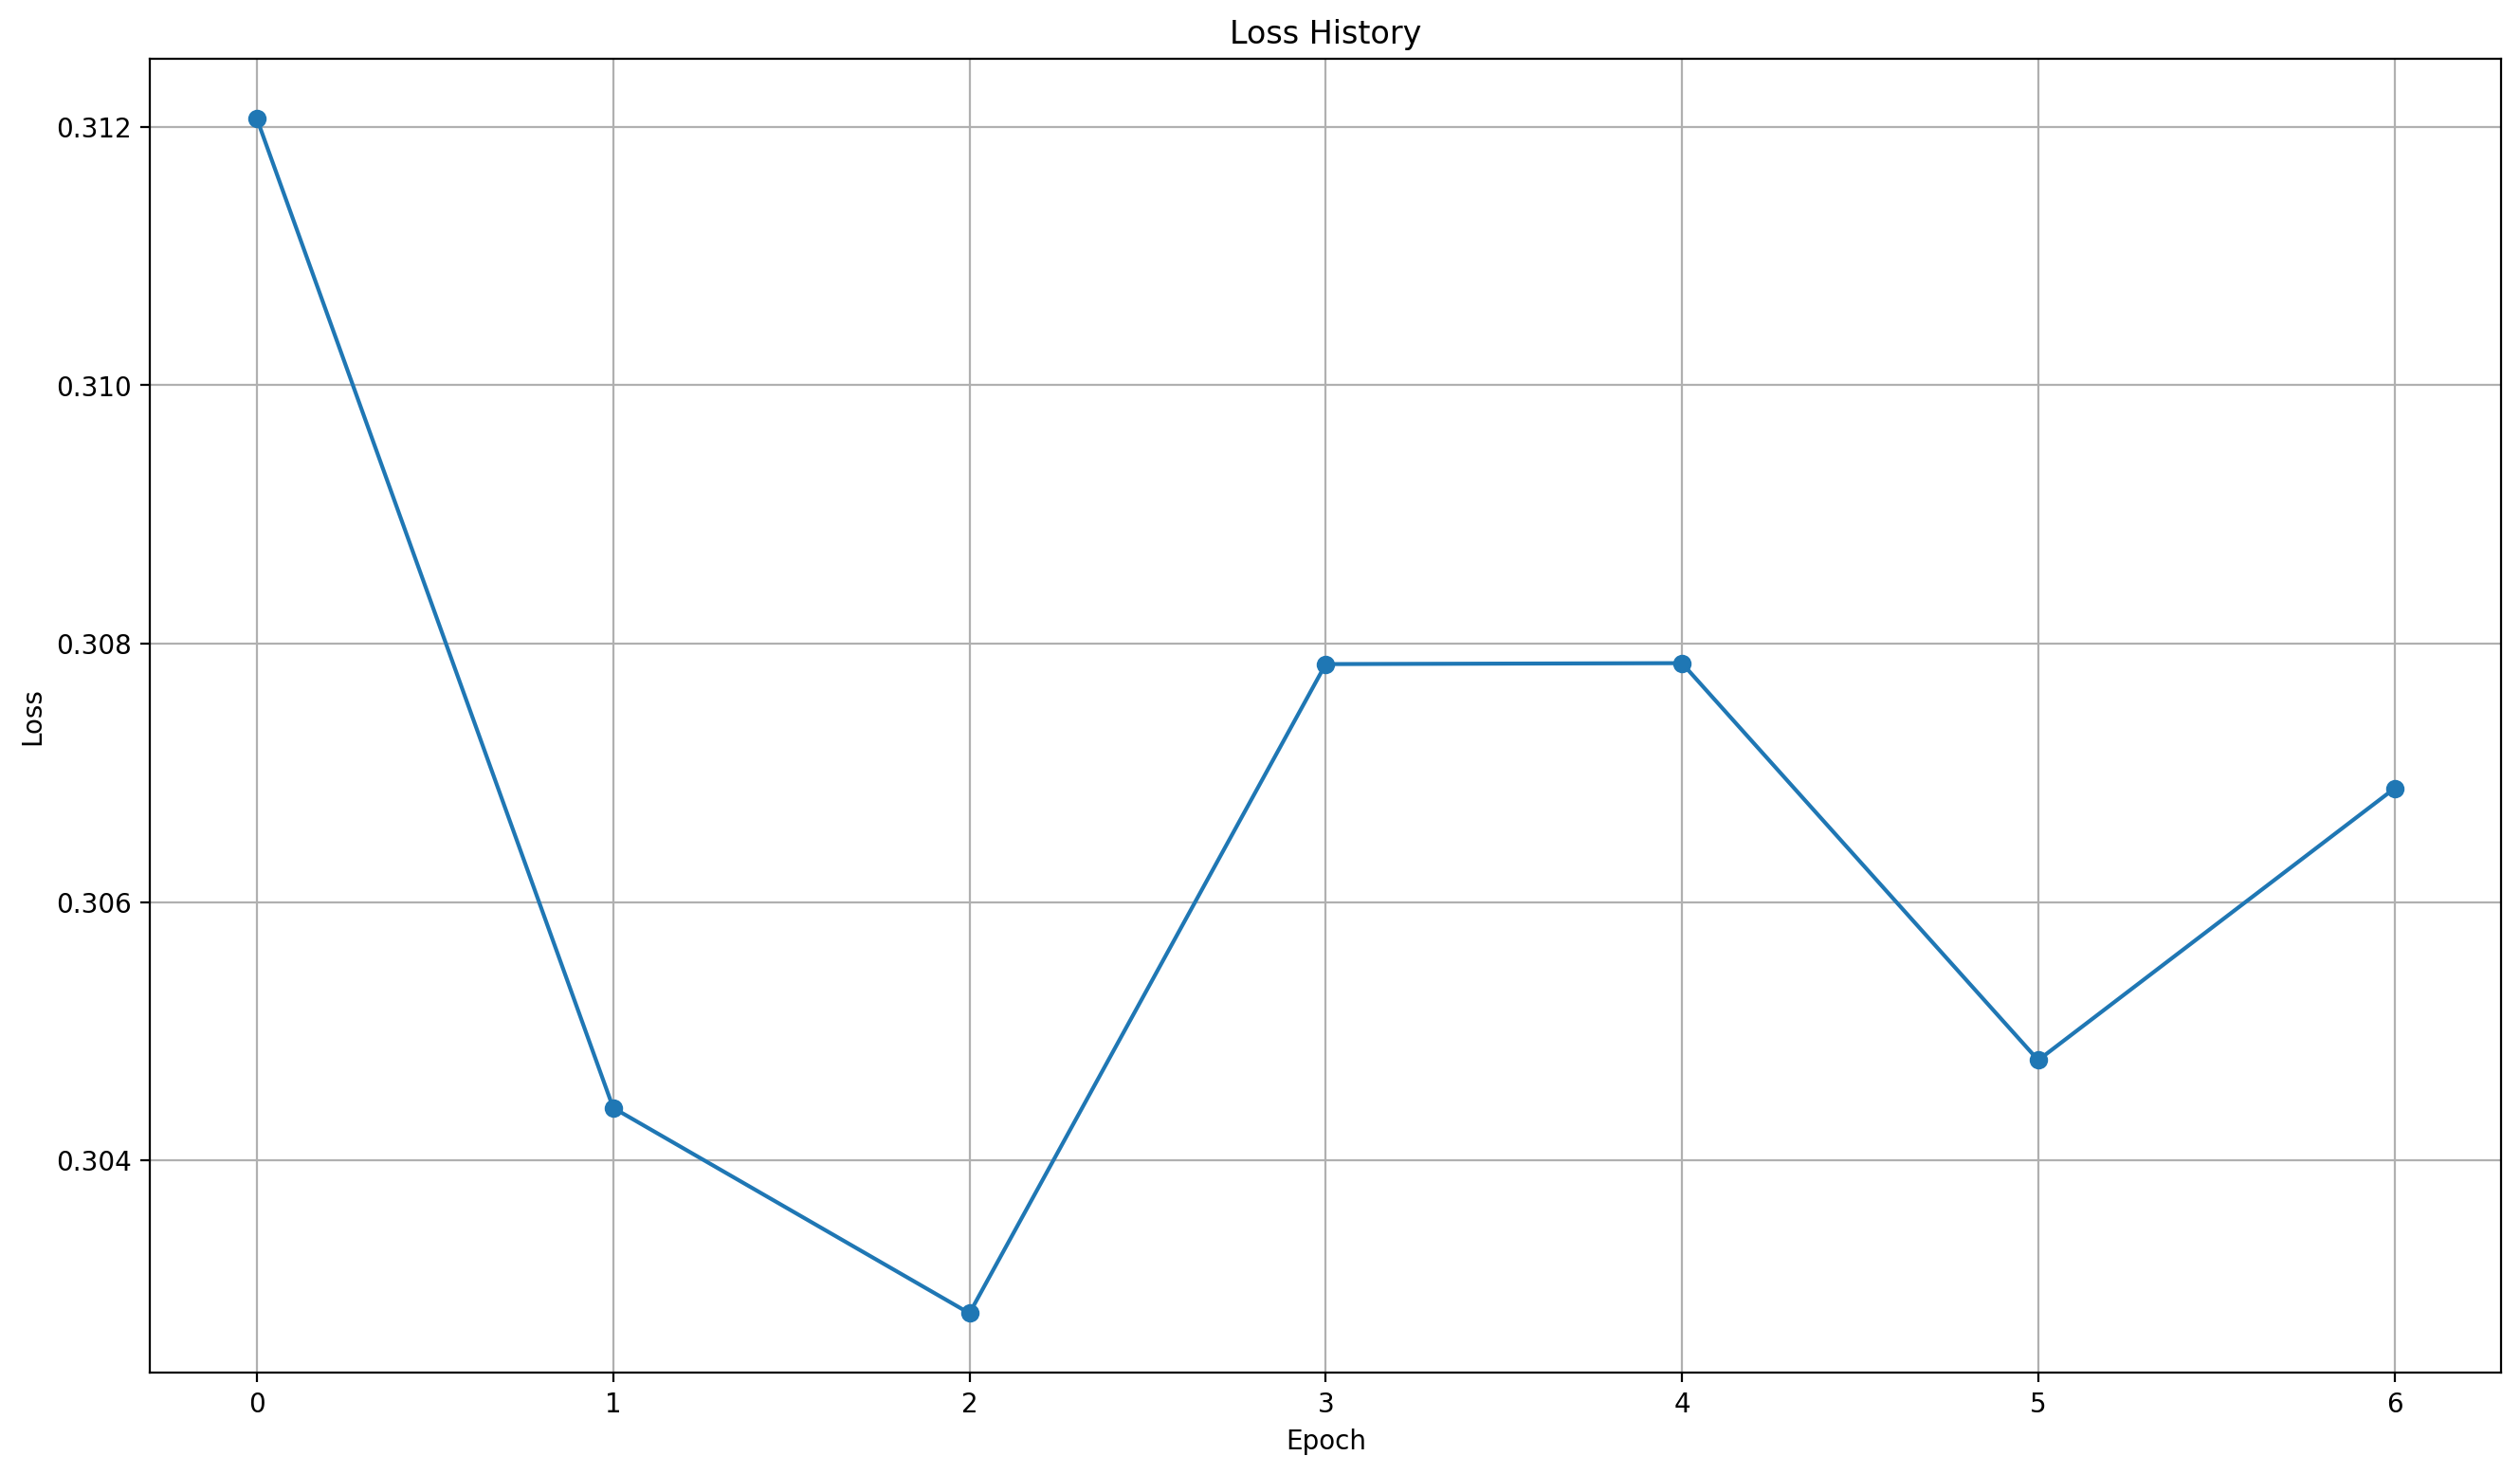

In [ ]:
# BTC / close + volume + rsi / trad_num = 0

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 6
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 0
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}_{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)

dataname:  cvr_6_18_22_30_BTC_1


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.7462729193302884
-- Iter 2 --
dtw:  0.7757154920134812
dtw:  1.1088591914730734
-- Iter 3 --
dtw:  0.8193599323700709
dtw:  0.8061167480856279
dtw:  0.8592200725137007
dtw:  0.6788758400208541
dtw:  0.9230731685409574
-- Iter 4 --
dtw:  0.8255410067807272
dtw:  0.29072675777432455
dtw:  1.0171159918255048
-- Iter 5 --
dtw:  1.200963532728247
-- Iter 6 --
dtw:  0.7010615487001699
dtw:  0.41265030520743984
dtw:  0.4970013086183591
dtw:  0.349004995558753
dtw:  0.7887581069978652
dtw:  1.950570329016133
-- Iter 7 --
dtw:  0.4906419534453991
dtw:  0.23288703744765588
dtw:  0.45944525803151476
dtw:  0.578573375262047
dtw:  0.5478712466242694
dtw:  1.94671004841694
-- Iter 8 --
dtw:  0.7681136217912408
dtw:  0.17846267404769847
dtw:  0.572154924512198
dtw:  0.5887124922660498
dtw:  0.763747757727644
dtw:  0.6749727020338272
self.converge:  1
-- Iter 9 --
dtw:  0.29091469032388273
dtw:  0.3305880664437281
dtw:  0.5354503355083653
dtw:  0.23968840954169254
dtw:  0.74778427

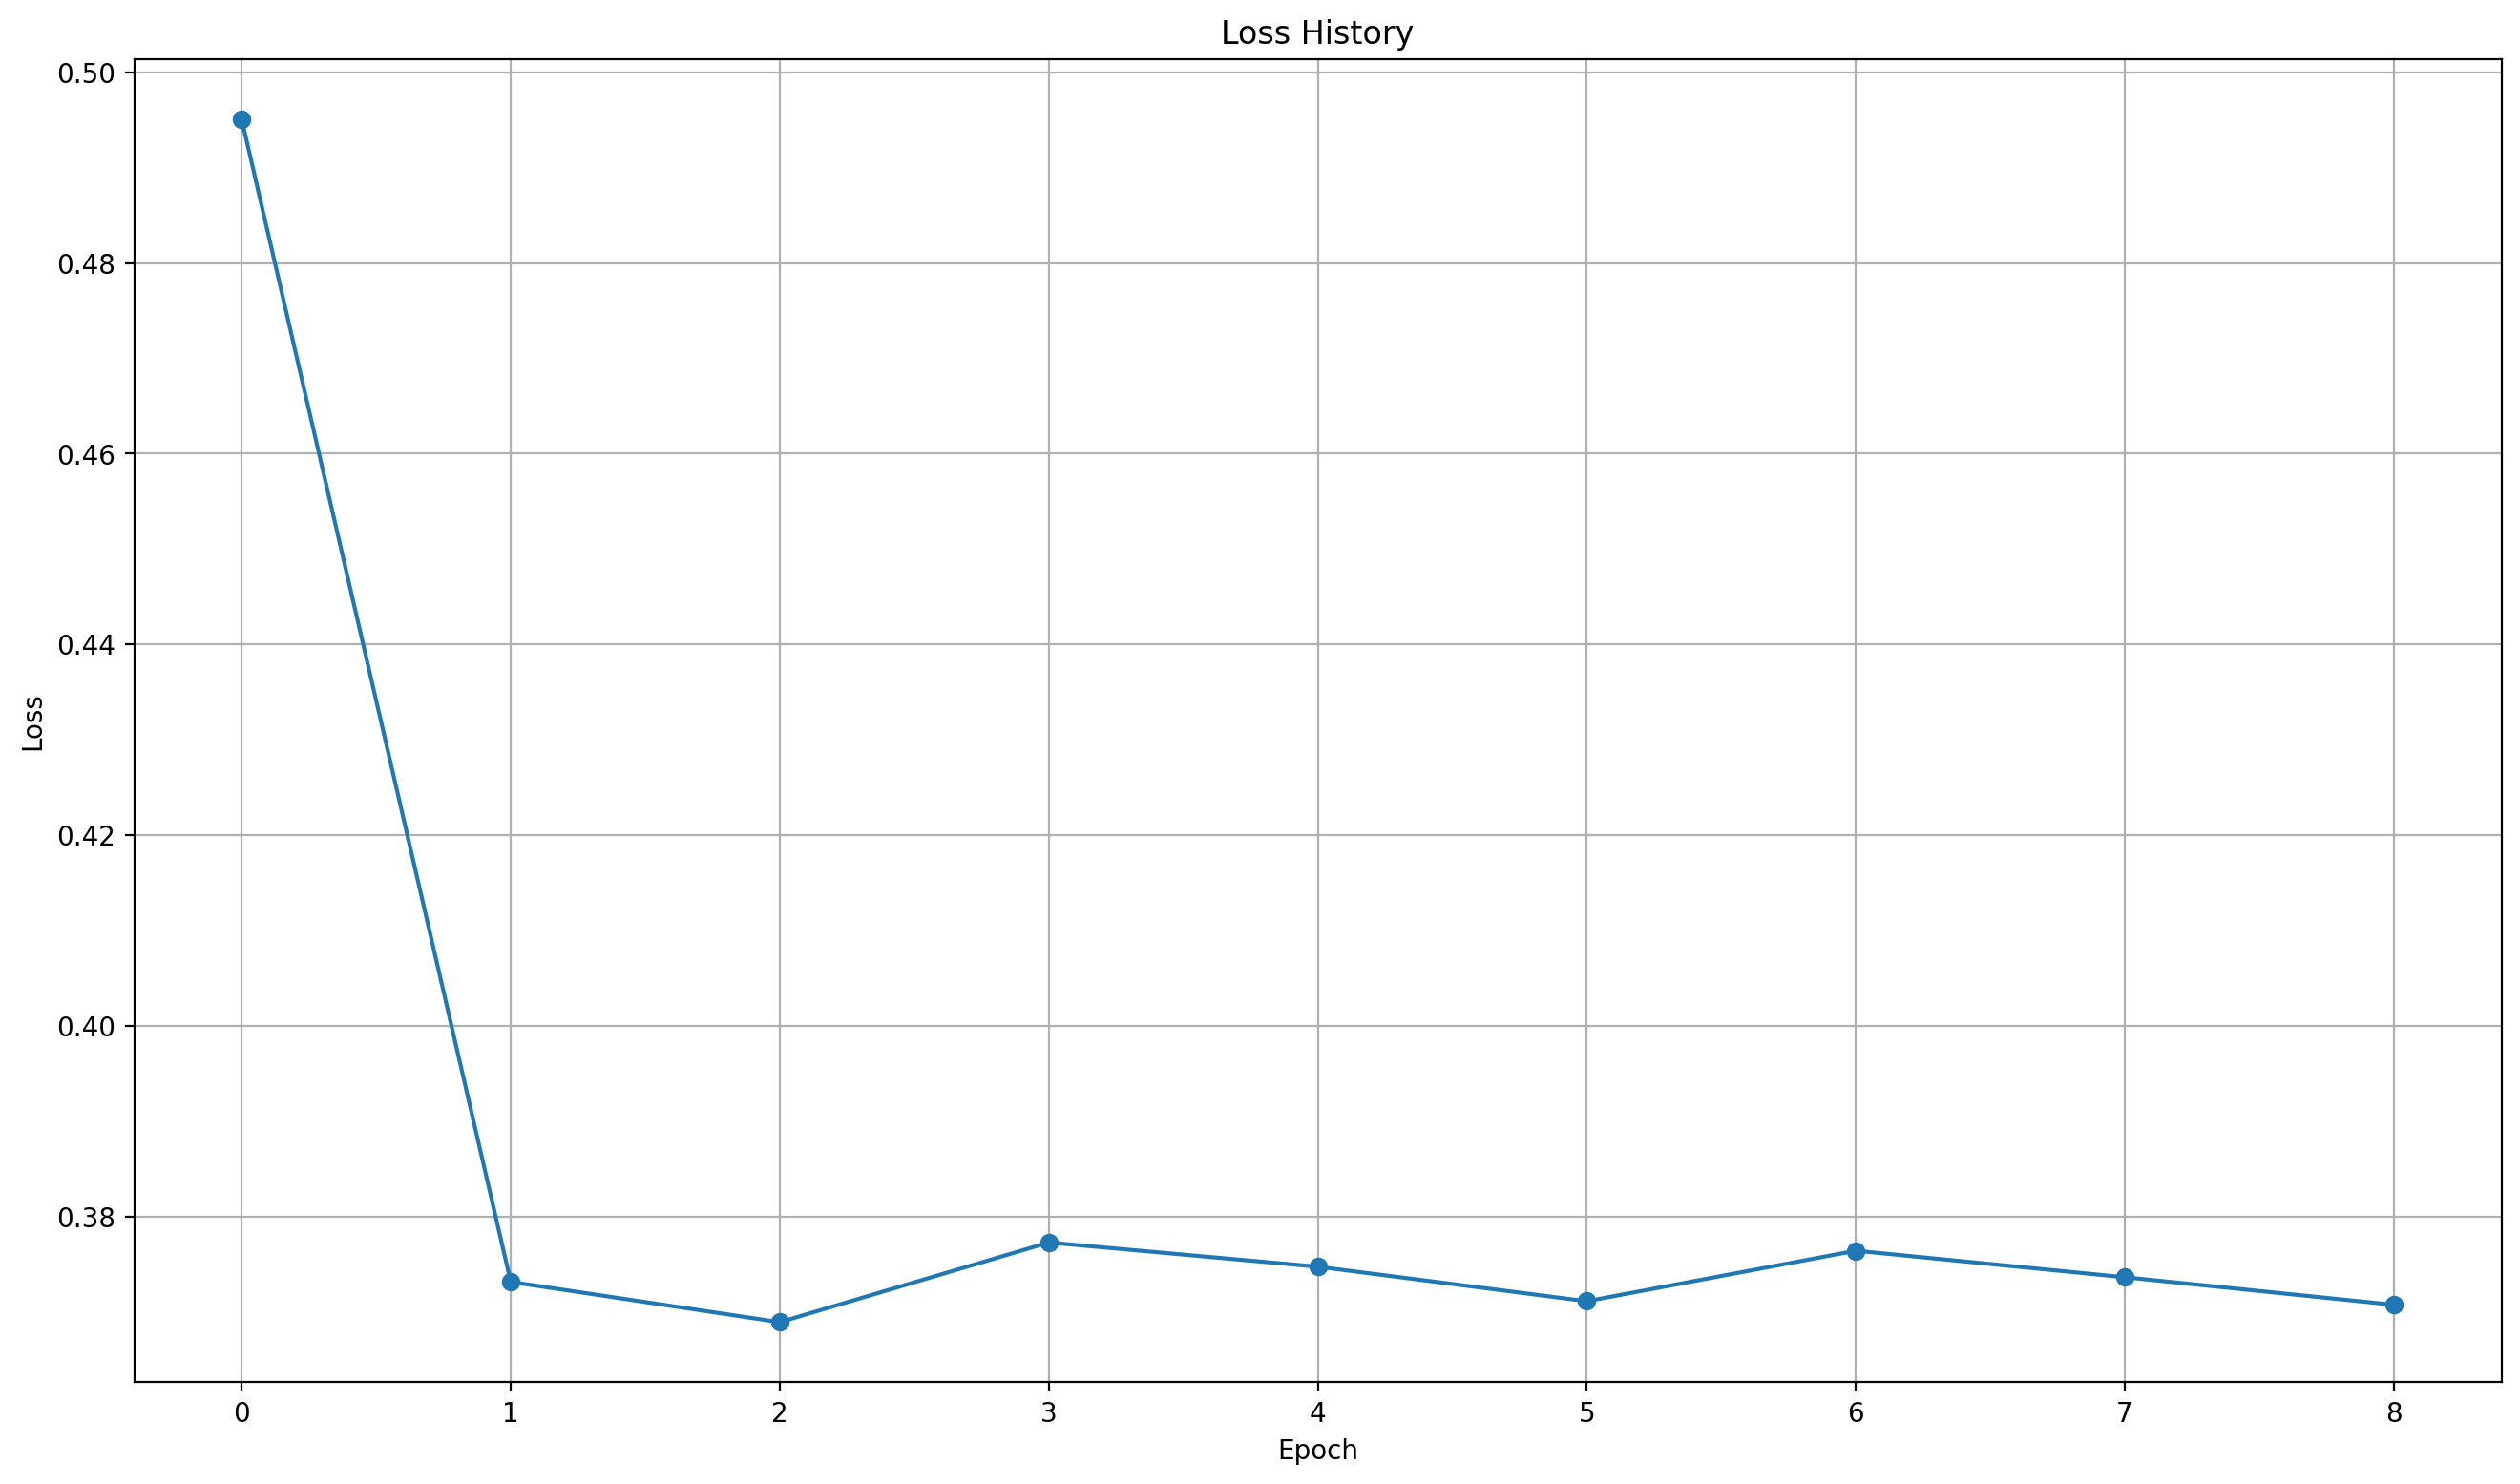

In [ ]:
# BTC / close + volume + rsi / trad_num = 1

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 6
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 1
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}_{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)

dataname:  cvr_6_18_22_30_BTC_2


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.7192787691974498
-- Iter 2 --
dtw:  0.8837442541116751
-- Iter 3 --
dtw:  0.8225608883246502
dtw:  0.9087102958929091
-- Iter 4 --
dtw:  0.44855220341047247
dtw:  0.8518707073368542
dtw:  0.42430808573407375
dtw:  0.7044897788812404
dtw:  0.6035644137528879
dtw:  1.718974398699559
-- Iter 5 --
dtw:  0.5905810211796843
dtw:  0.35721876613800246
dtw:  0.4381364710225571
dtw:  0.5147741045912293
dtw:  0.3823726292739159
dtw:  1.1882365204158842
-- Iter 6 --
dtw:  0.8294764637452069
dtw:  0.40729479541517205
dtw:  0.7343237651693594
dtw:  0.6681968588025056
dtw:  0.5873197687280394
dtw:  1.2263095116432567
-- Iter 7 --
dtw:  0.779340306777339
dtw:  0.22153457809843372
dtw:  0.8155623370264158
dtw:  0.7958477457618434
dtw:  0.5725173563201355
dtw:  1.0302558021498052
-- Iter 8 --
dtw:  0.8656059269923158
dtw:  0.5041563330959573
dtw:  0.4091816595189832
dtw:  0.6976149064637633
dtw:  0.7907872841755319
dtw:  0.5799494592101939
self.converge:  1
-- Iter 9 --
dtw:  0.5372

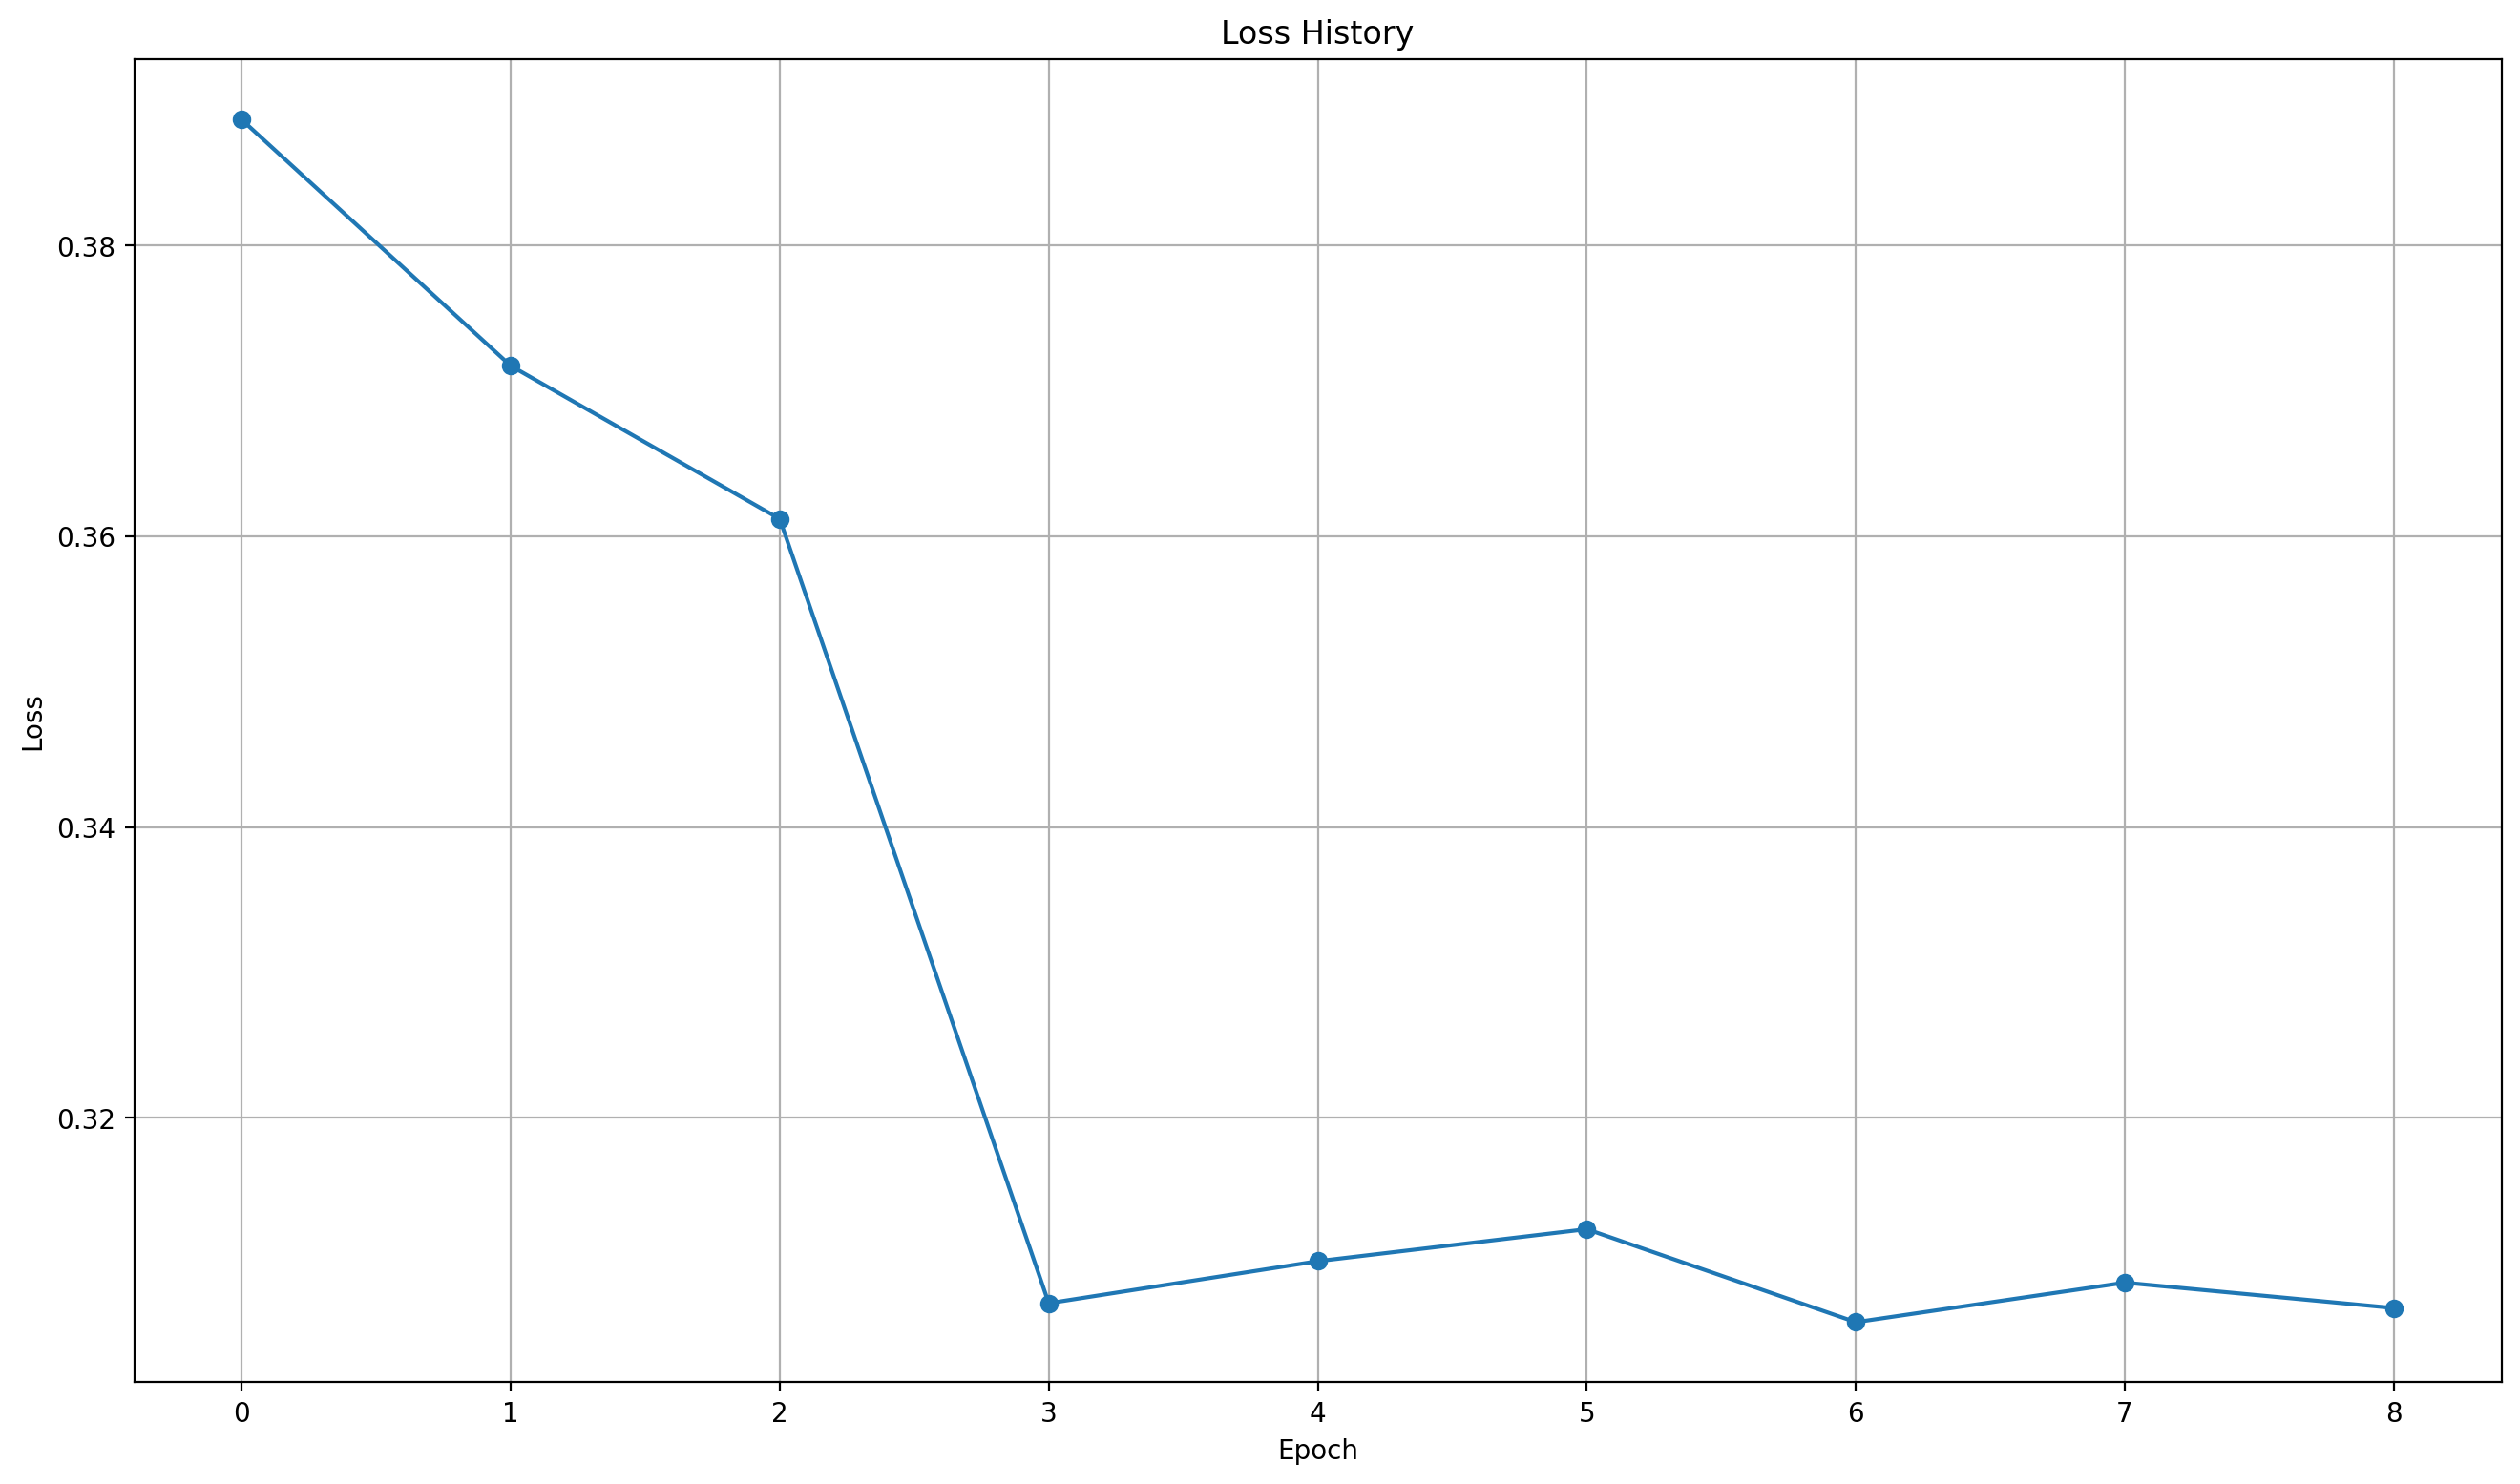

In [ ]:
# BTC / close + volume + rsi / trad_num = 2

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 6
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 2
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}_{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)

dataname:  cvr_6_18_22_30_BTC_3


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.814814364509964
-- Iter 2 --
dtw:  1.3420051982453942
-- Iter 3 --
dtw:  1.0569868100388389
-- Iter 4 --
dtw:  0.7779296072257361
dtw:  0.731694896067115
dtw:  0.7389699157062568
dtw:  0.9901113699368874
-- Iter 5 --
dtw:  0.3838788489286395
dtw:  0.573576029211326
dtw:  0.3445915112011889
dtw:  0.8540670647860155
dtw:  1.0921141184028245
-- Iter 6 --
dtw:  0.7066594387982348
dtw:  0.9024721026937221
-- Iter 7 --
dtw:  0.8596026140155948
dtw:  0.886976994599834
-- Iter 8 --
dtw:  0.7635225110243963
dtw:  0.2711303646290441
dtw:  0.5717112707524553
dtw:  0.6859245559023782
dtw:  0.6339778031751361
dtw:  0.334034980311831
self.converge:  1
-- Iter 9 --
dtw:  0.6918993941921815
dtw:  0.8300214660876903
dtw:  0.6244337343393026
dtw:  0.6182325413153357
dtw:  0.7216184103649574
dtw:  0.5365397805379005
-- Converge and stop at iter 9 --


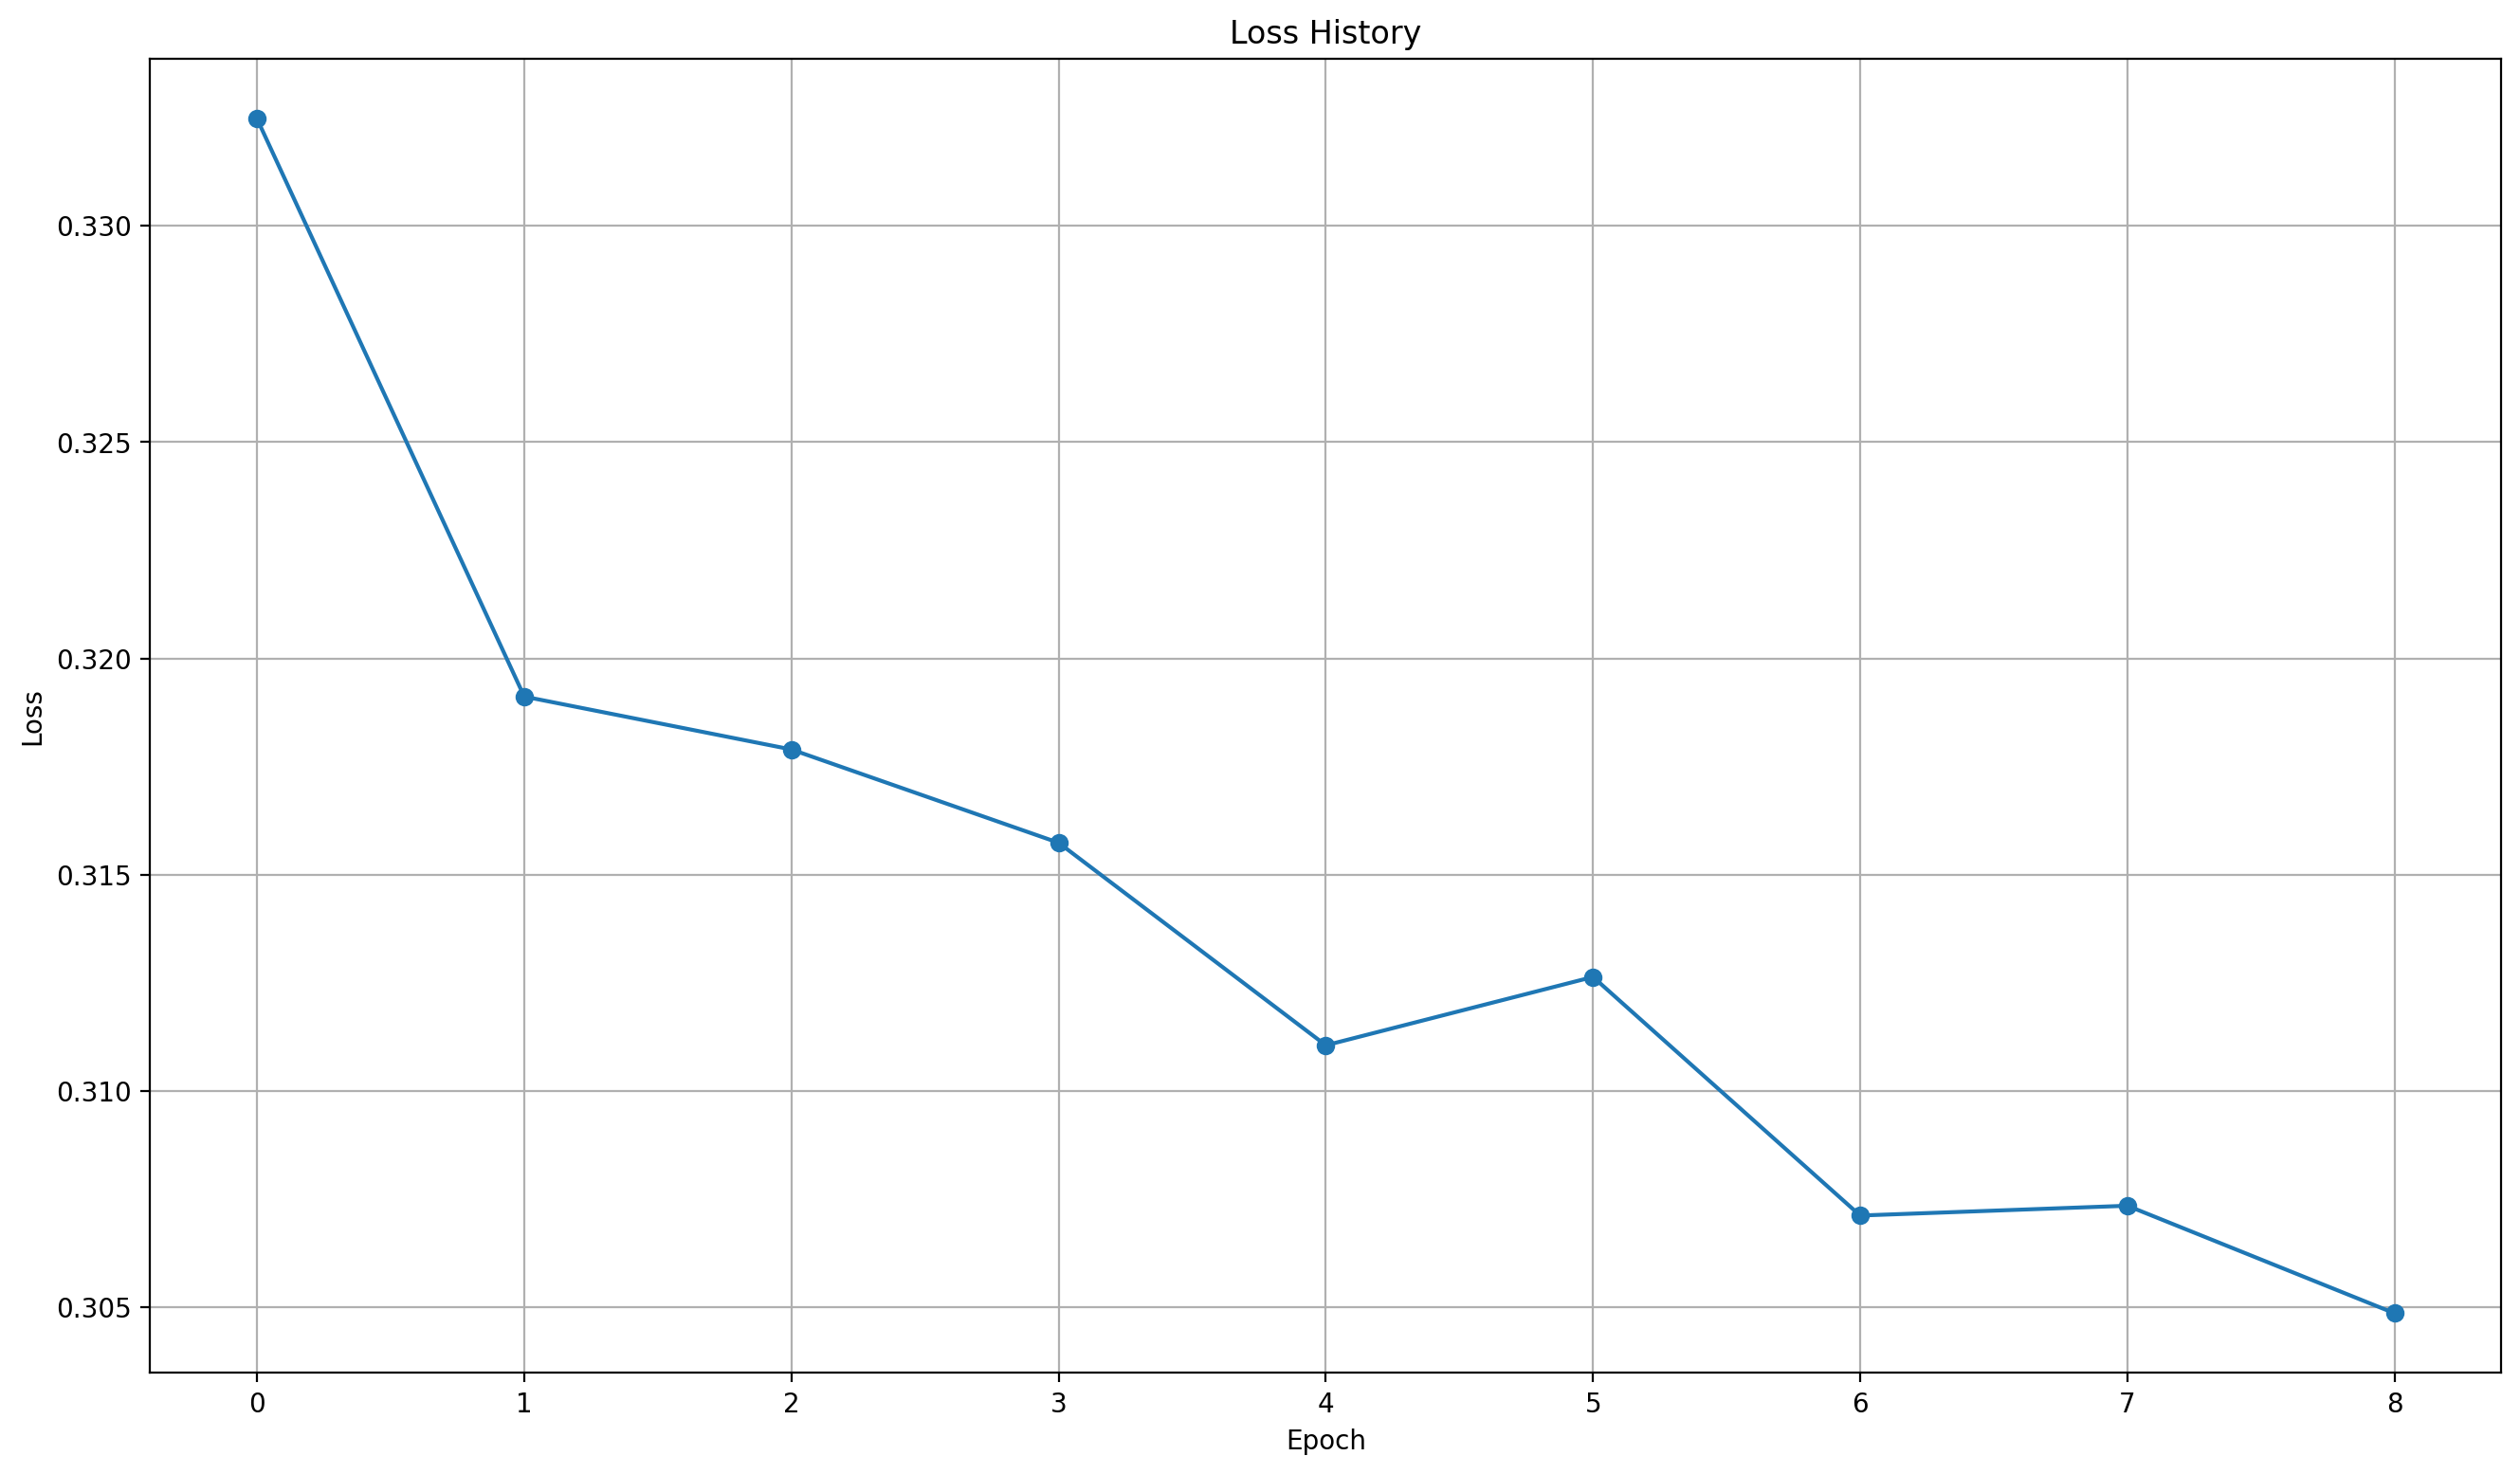

In [ ]:
# BTC / close + volume + rsi / trad_num = 3

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 6
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 3
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}_{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)

dataname:  cvr_6_18_22_30_BTC_4


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.6930225708281277
-- Iter 2 --
dtw:  1.011863143445157
-- Iter 3 --
dtw:  0.8827149573329578
-- Iter 4 --
dtw:  0.5039753171471464
dtw:  0.6648516636372731
dtw:  0.6263430210476129
dtw:  0.4188515839977638
dtw:  1.0251635896212012
-- Iter 5 --
dtw:  0.8372885716591156
dtw:  0.5285410335125634
dtw:  0.3685104918456352
dtw:  0.47821101283210254
dtw:  0.4193095607310215
dtw:  1.1285959209292562
-- Iter 6 --
dtw:  0.8185236990784477
dtw:  0.5793075661337417
dtw:  0.4619582597365316
dtw:  0.2872101000812568
dtw:  0.5636891746474673
dtw:  0.8086110284670015
self.converge:  1
-- Iter 7 --
dtw:  0.5838828148028702
dtw:  0.7331901709555454
dtw:  0.7619639134656578
dtw:  0.14576118348893802
dtw:  1.2406887470371508
-- Iter 8 --
dtw:  0.5896807957821972
dtw:  1.004106396116539
-- Iter 9 --
dtw:  0.793911928637115
dtw:  0.814504582633522
dtw:  0.32056780985843236
dtw:  0.21090894979755334
dtw:  0.8231545274434611
dtw:  1.4564101439633477
-- Iter 10 --
dtw:  0.9526561376447734
-

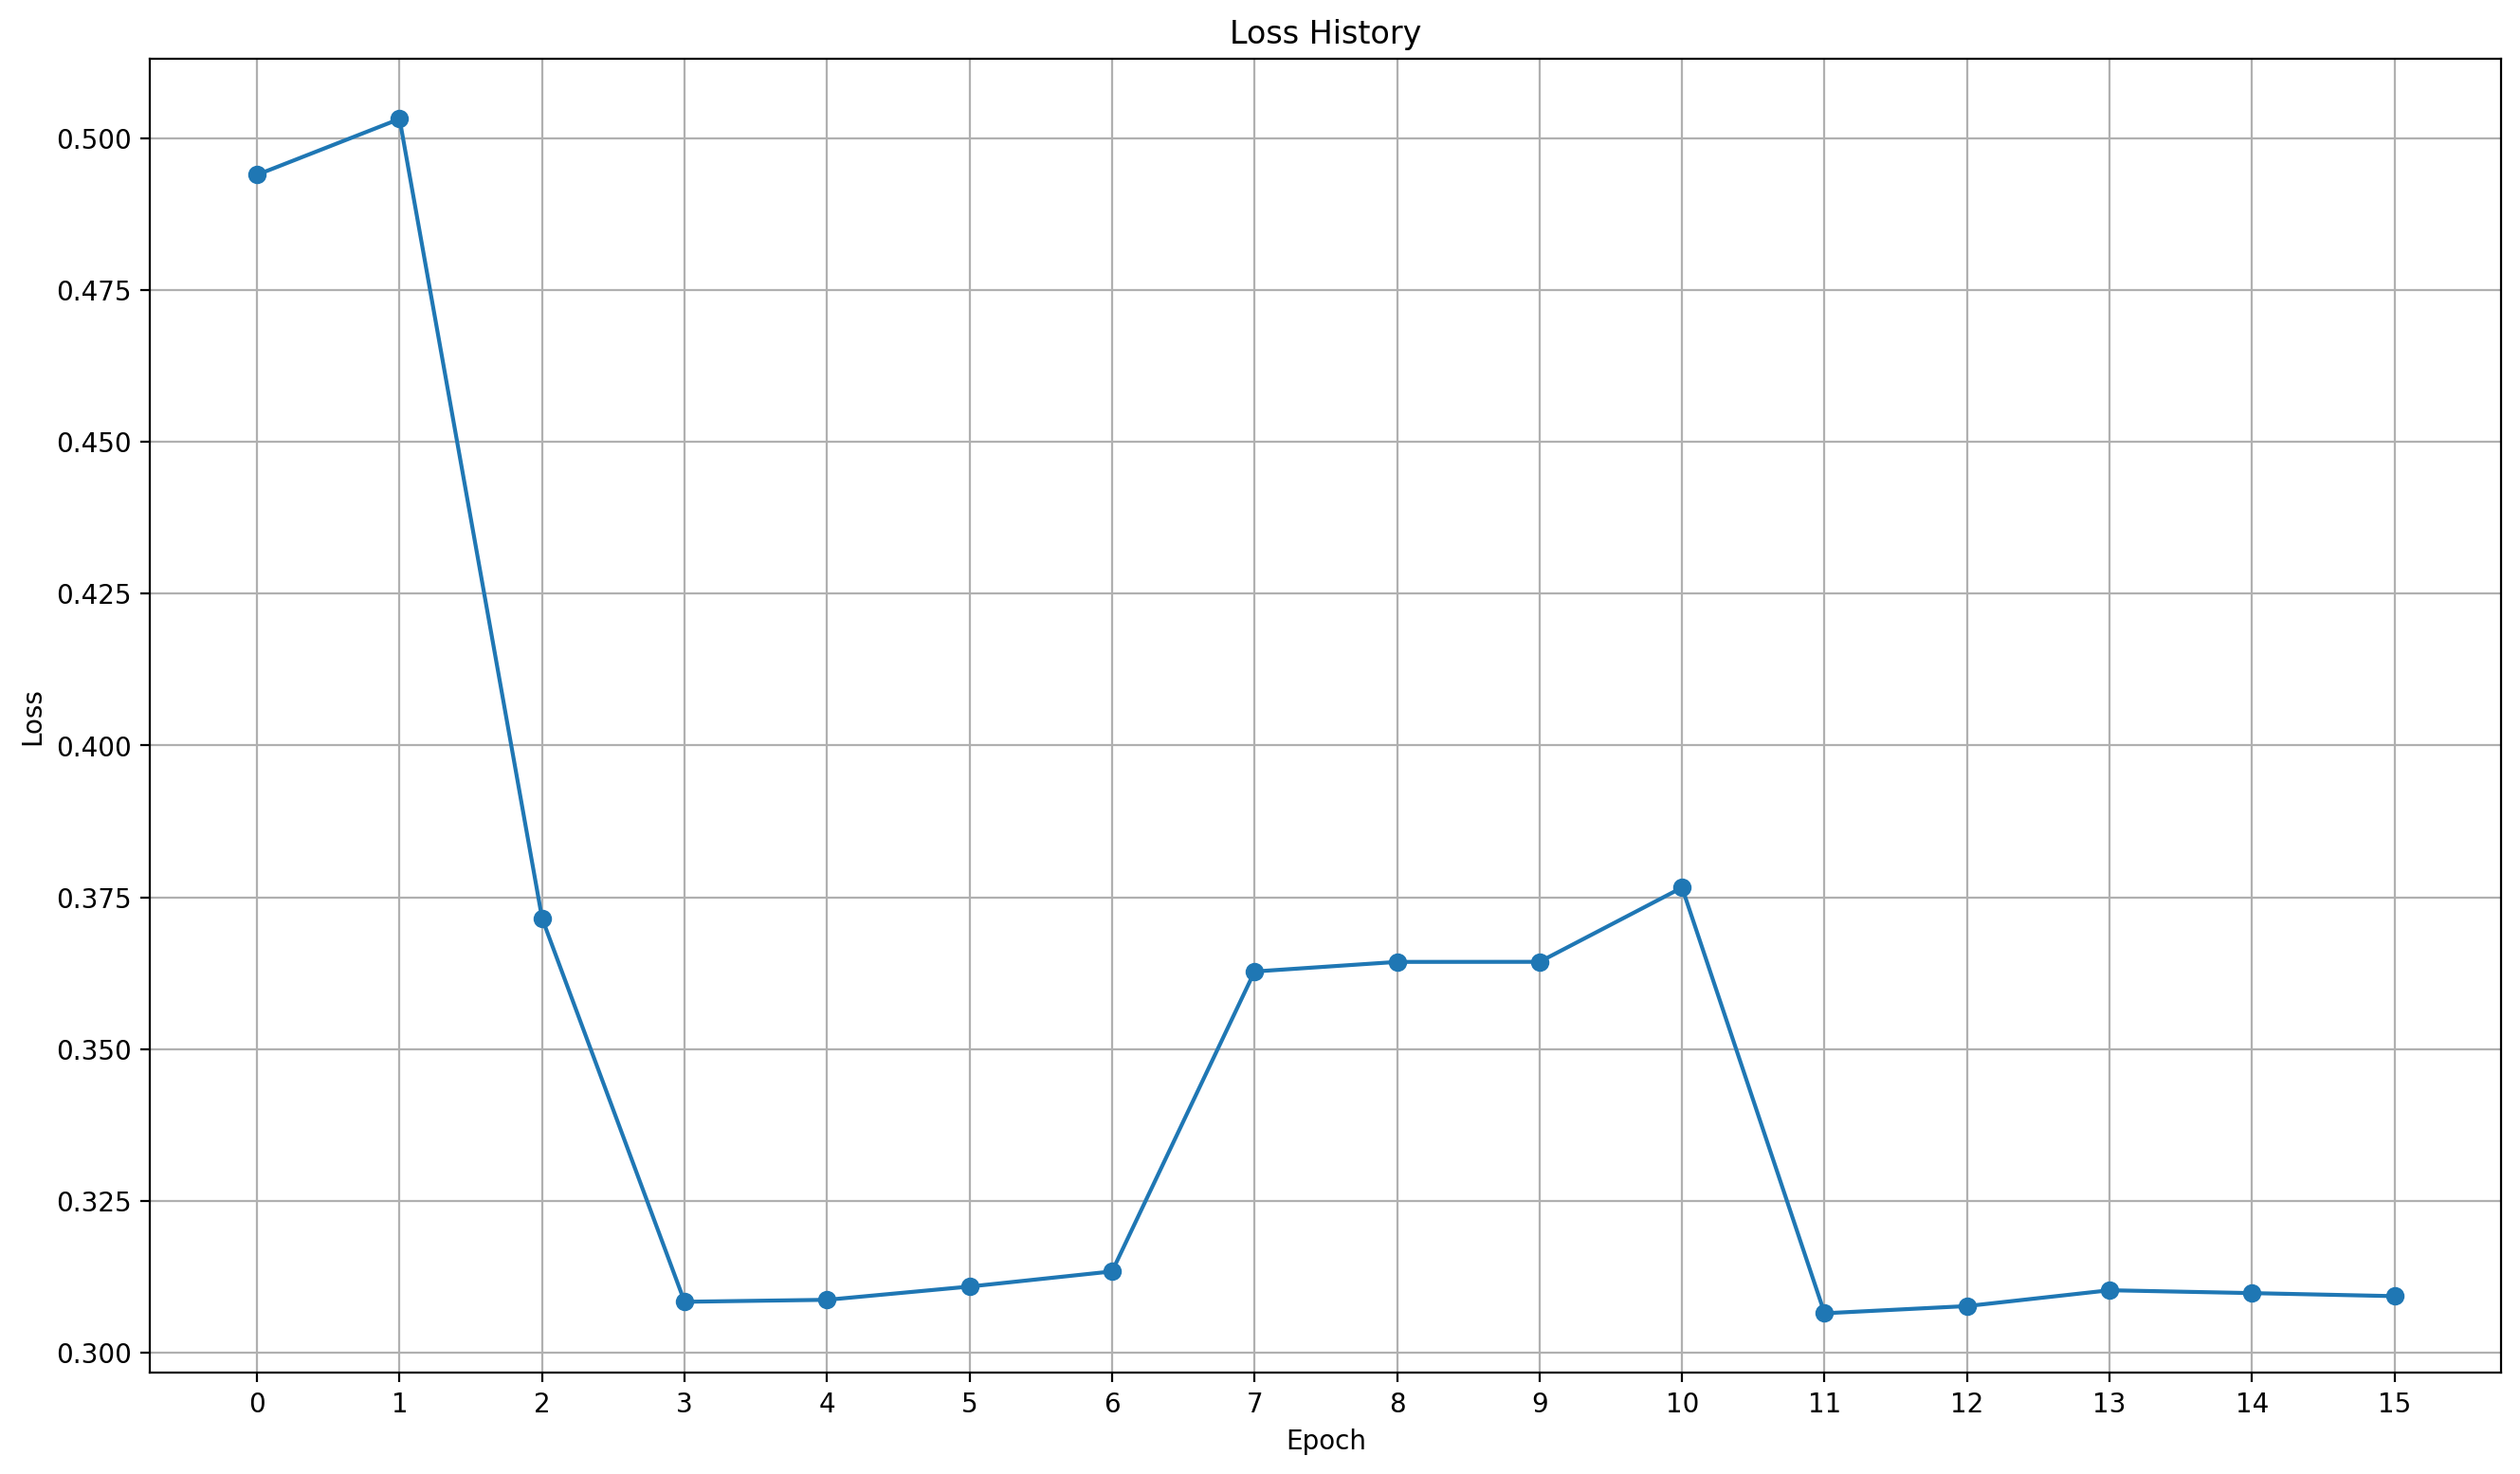

In [ ]:
# BTC / close + volume + rsi / trad_num = 4

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 6
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 4
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}_{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)

dataname:  cvr_6_18_22_30_BTC_5


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.6668363169648048
-- Iter 2 --
dtw:  0.8357037492013797
dtw:  1.2263367177215965
-- Iter 3 --
dtw:  0.42482440249066705
dtw:  0.5984560405749553
dtw:  0.616422467572321
dtw:  1.125214603785014
-- Iter 4 --
dtw:  0.5128362716307667
dtw:  0.4105308467857321
dtw:  0.9896308492980777
-- Iter 5 --
dtw:  0.5138177186534851
dtw:  0.9518898497719687
-- Iter 6 --
dtw:  0.8854639923189374
-- Iter 7 --
dtw:  0.6995602828712356
dtw:  0.6421310890014943
dtw:  0.4494873847083373
dtw:  0.4775152647107664
dtw:  0.8155181394004992
dtw:  0.6341200073852431
self.converge:  1
-- Iter 8 --
dtw:  0.896902974634455
-- Iter 9 --
dtw:  0.5782998512811897
dtw:  0.6310679246595962
dtw:  0.9985504115168244
-- Iter 10 --
dtw:  0.9489340139530141
-- Iter 11 --
dtw:  0.800479475597943
dtw:  0.3981931699930633
dtw:  0.20002471687410803
dtw:  0.29898710994376343
dtw:  0.33526343042107914
dtw:  0.8024923354288616
self.converge:  1
-- Iter 12 --
dtw:  0.6588057029542181
dtw:  0.23785428885435375
dtw:

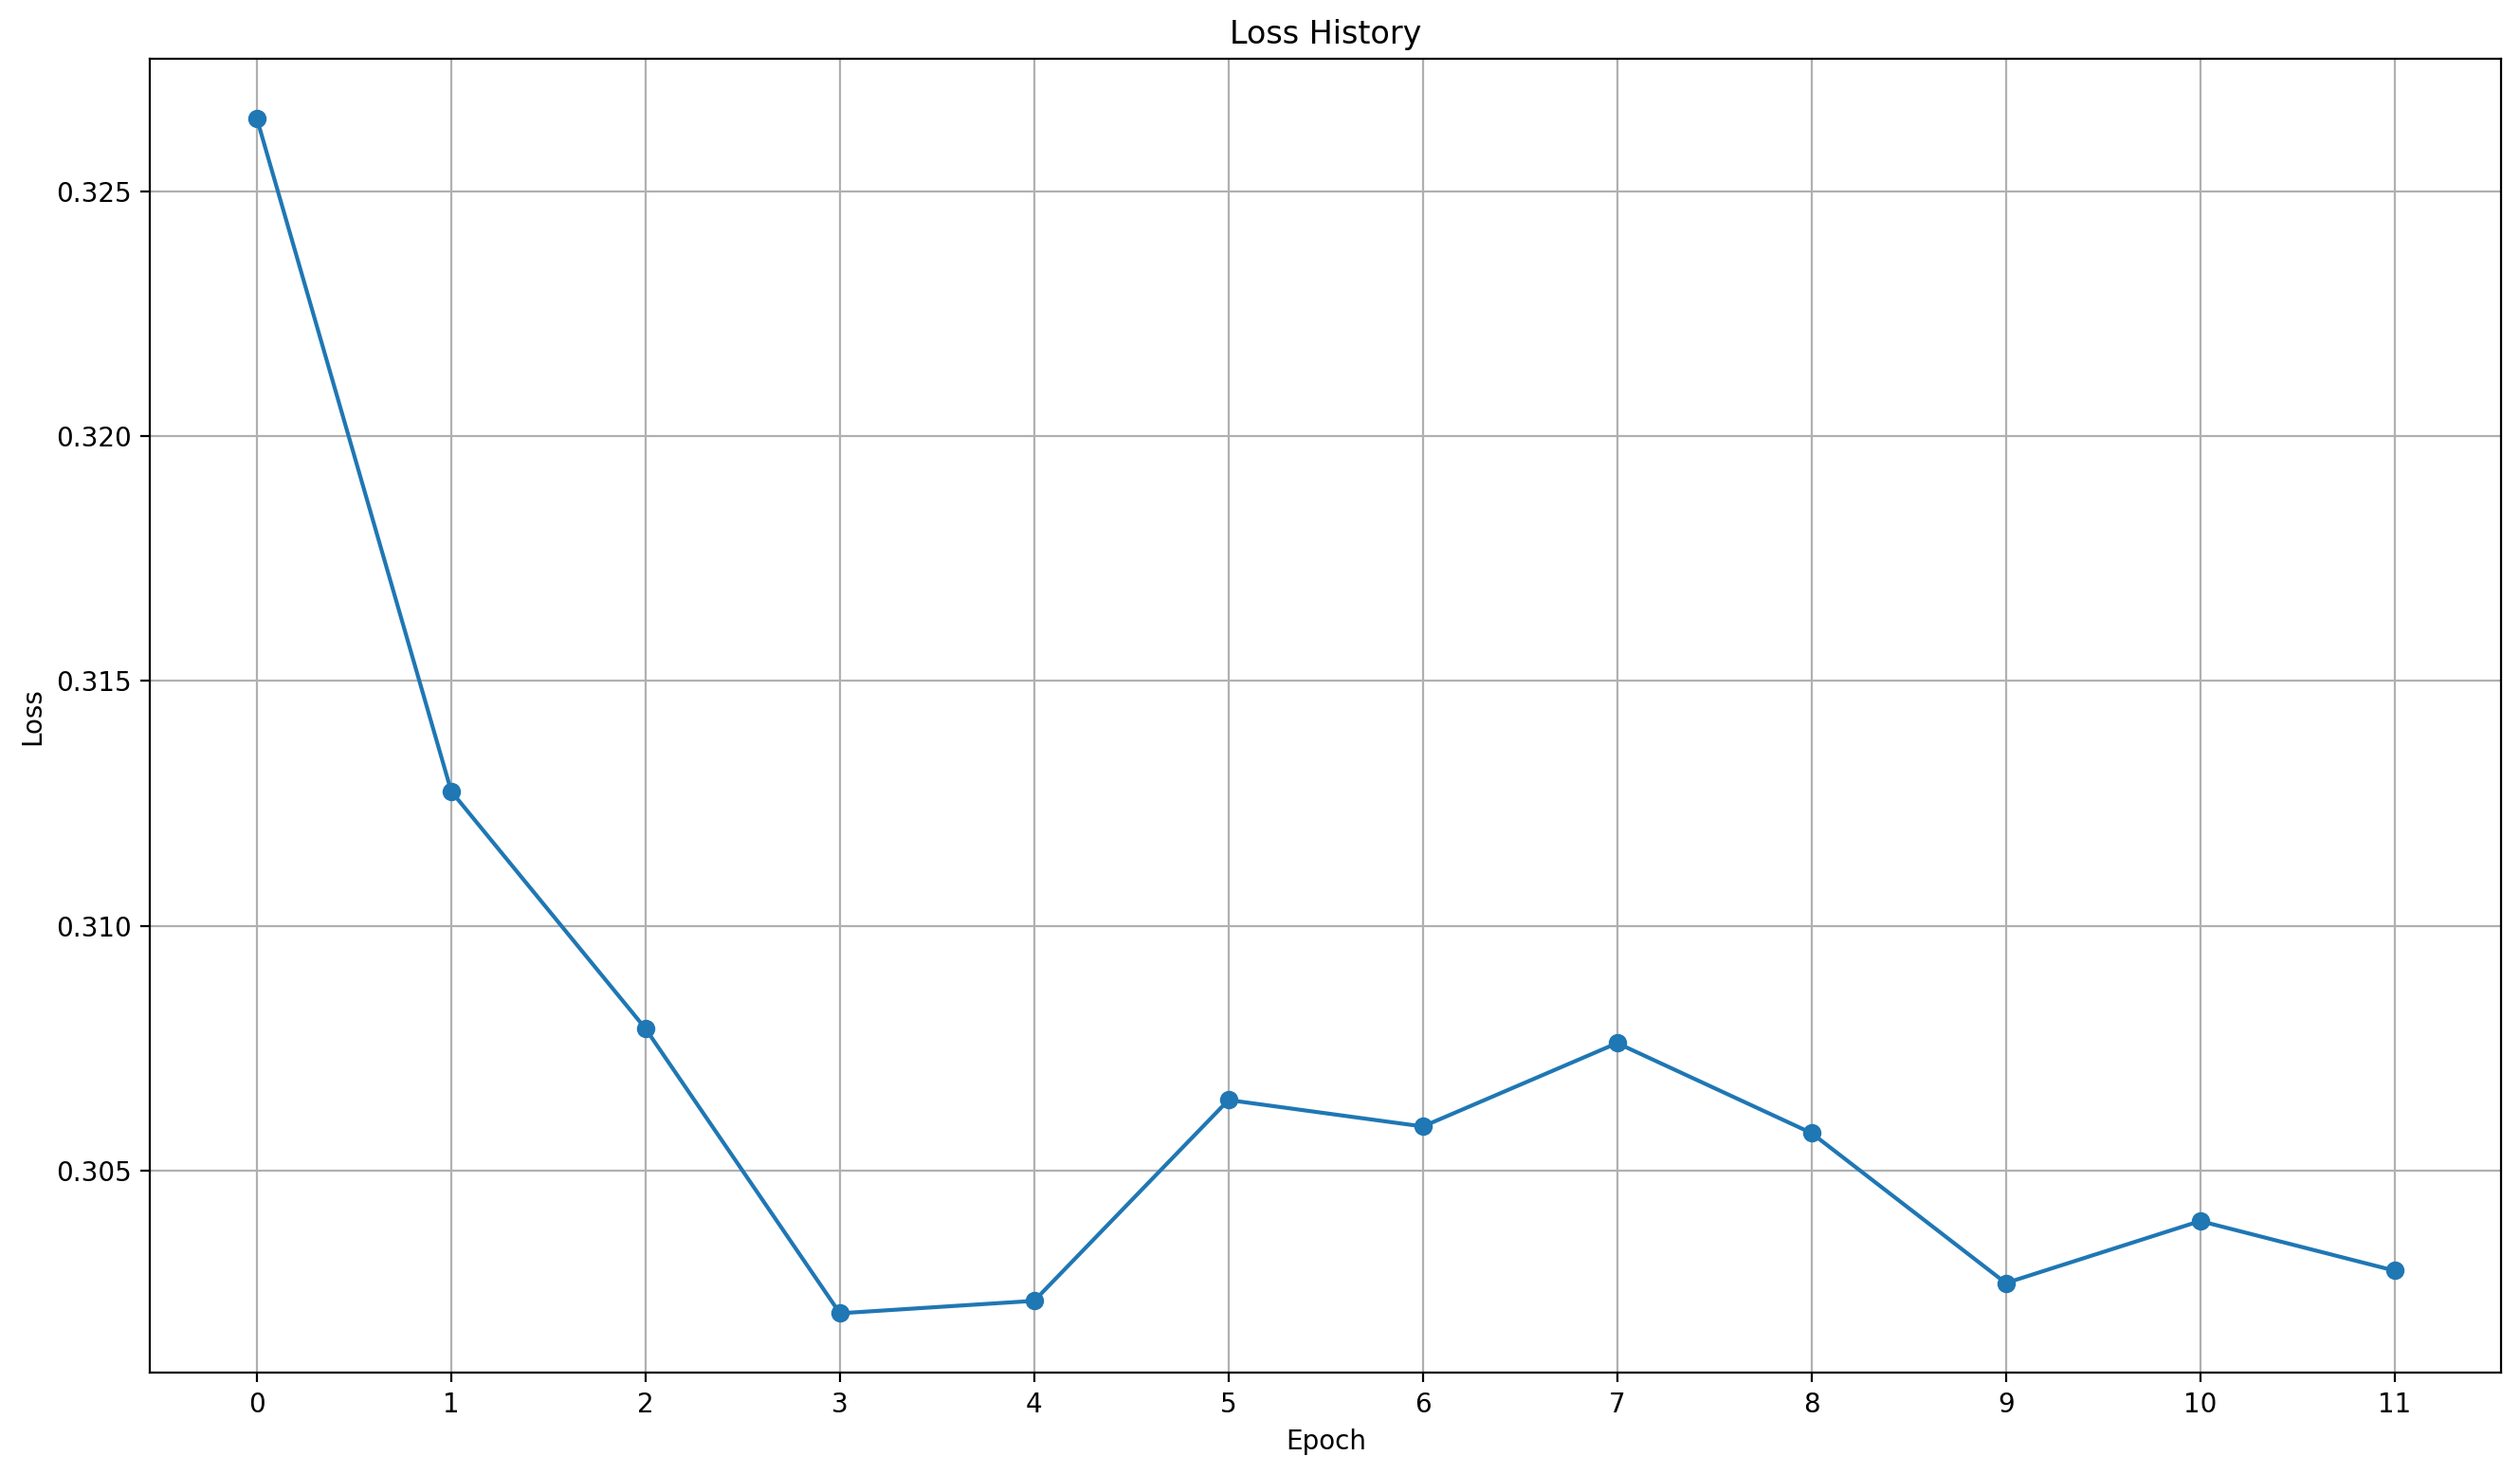

In [ ]:
# BTC / close + volume + rsi / trad_num = 5

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 6
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 5
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}_{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)

dataname:  cvr_6_18_22_30_BTC_6


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.6436959247881646
-- Iter 2 --
dtw:  0.670086875963061
dtw:  0.8673793648611191
-- Iter 3 --
dtw:  0.5297310329249165
dtw:  0.9148529139493448
-- Iter 4 --
dtw:  0.5844017293711616
dtw:  0.6402791290599125
dtw:  0.6826304205048436
dtw:  0.7353036241521165
dtw:  0.8983354453139473
-- Iter 5 --
dtw:  1.1697200973546786
-- Iter 6 --
dtw:  0.6108373613041036
dtw:  0.6154149573552358
dtw:  0.48588891807868295
dtw:  0.6121953421698244
dtw:  0.2807660236193379
dtw:  0.6962148785371544
self.converge:  1
-- Iter 7 --
dtw:  0.7443680860608303
dtw:  0.5187147153230364
dtw:  0.6979300848234159
dtw:  0.8464015579202437
dtw:  0.4613856084717925
dtw:  0.48249261312844877
-- Converge and stop at iter 7 --


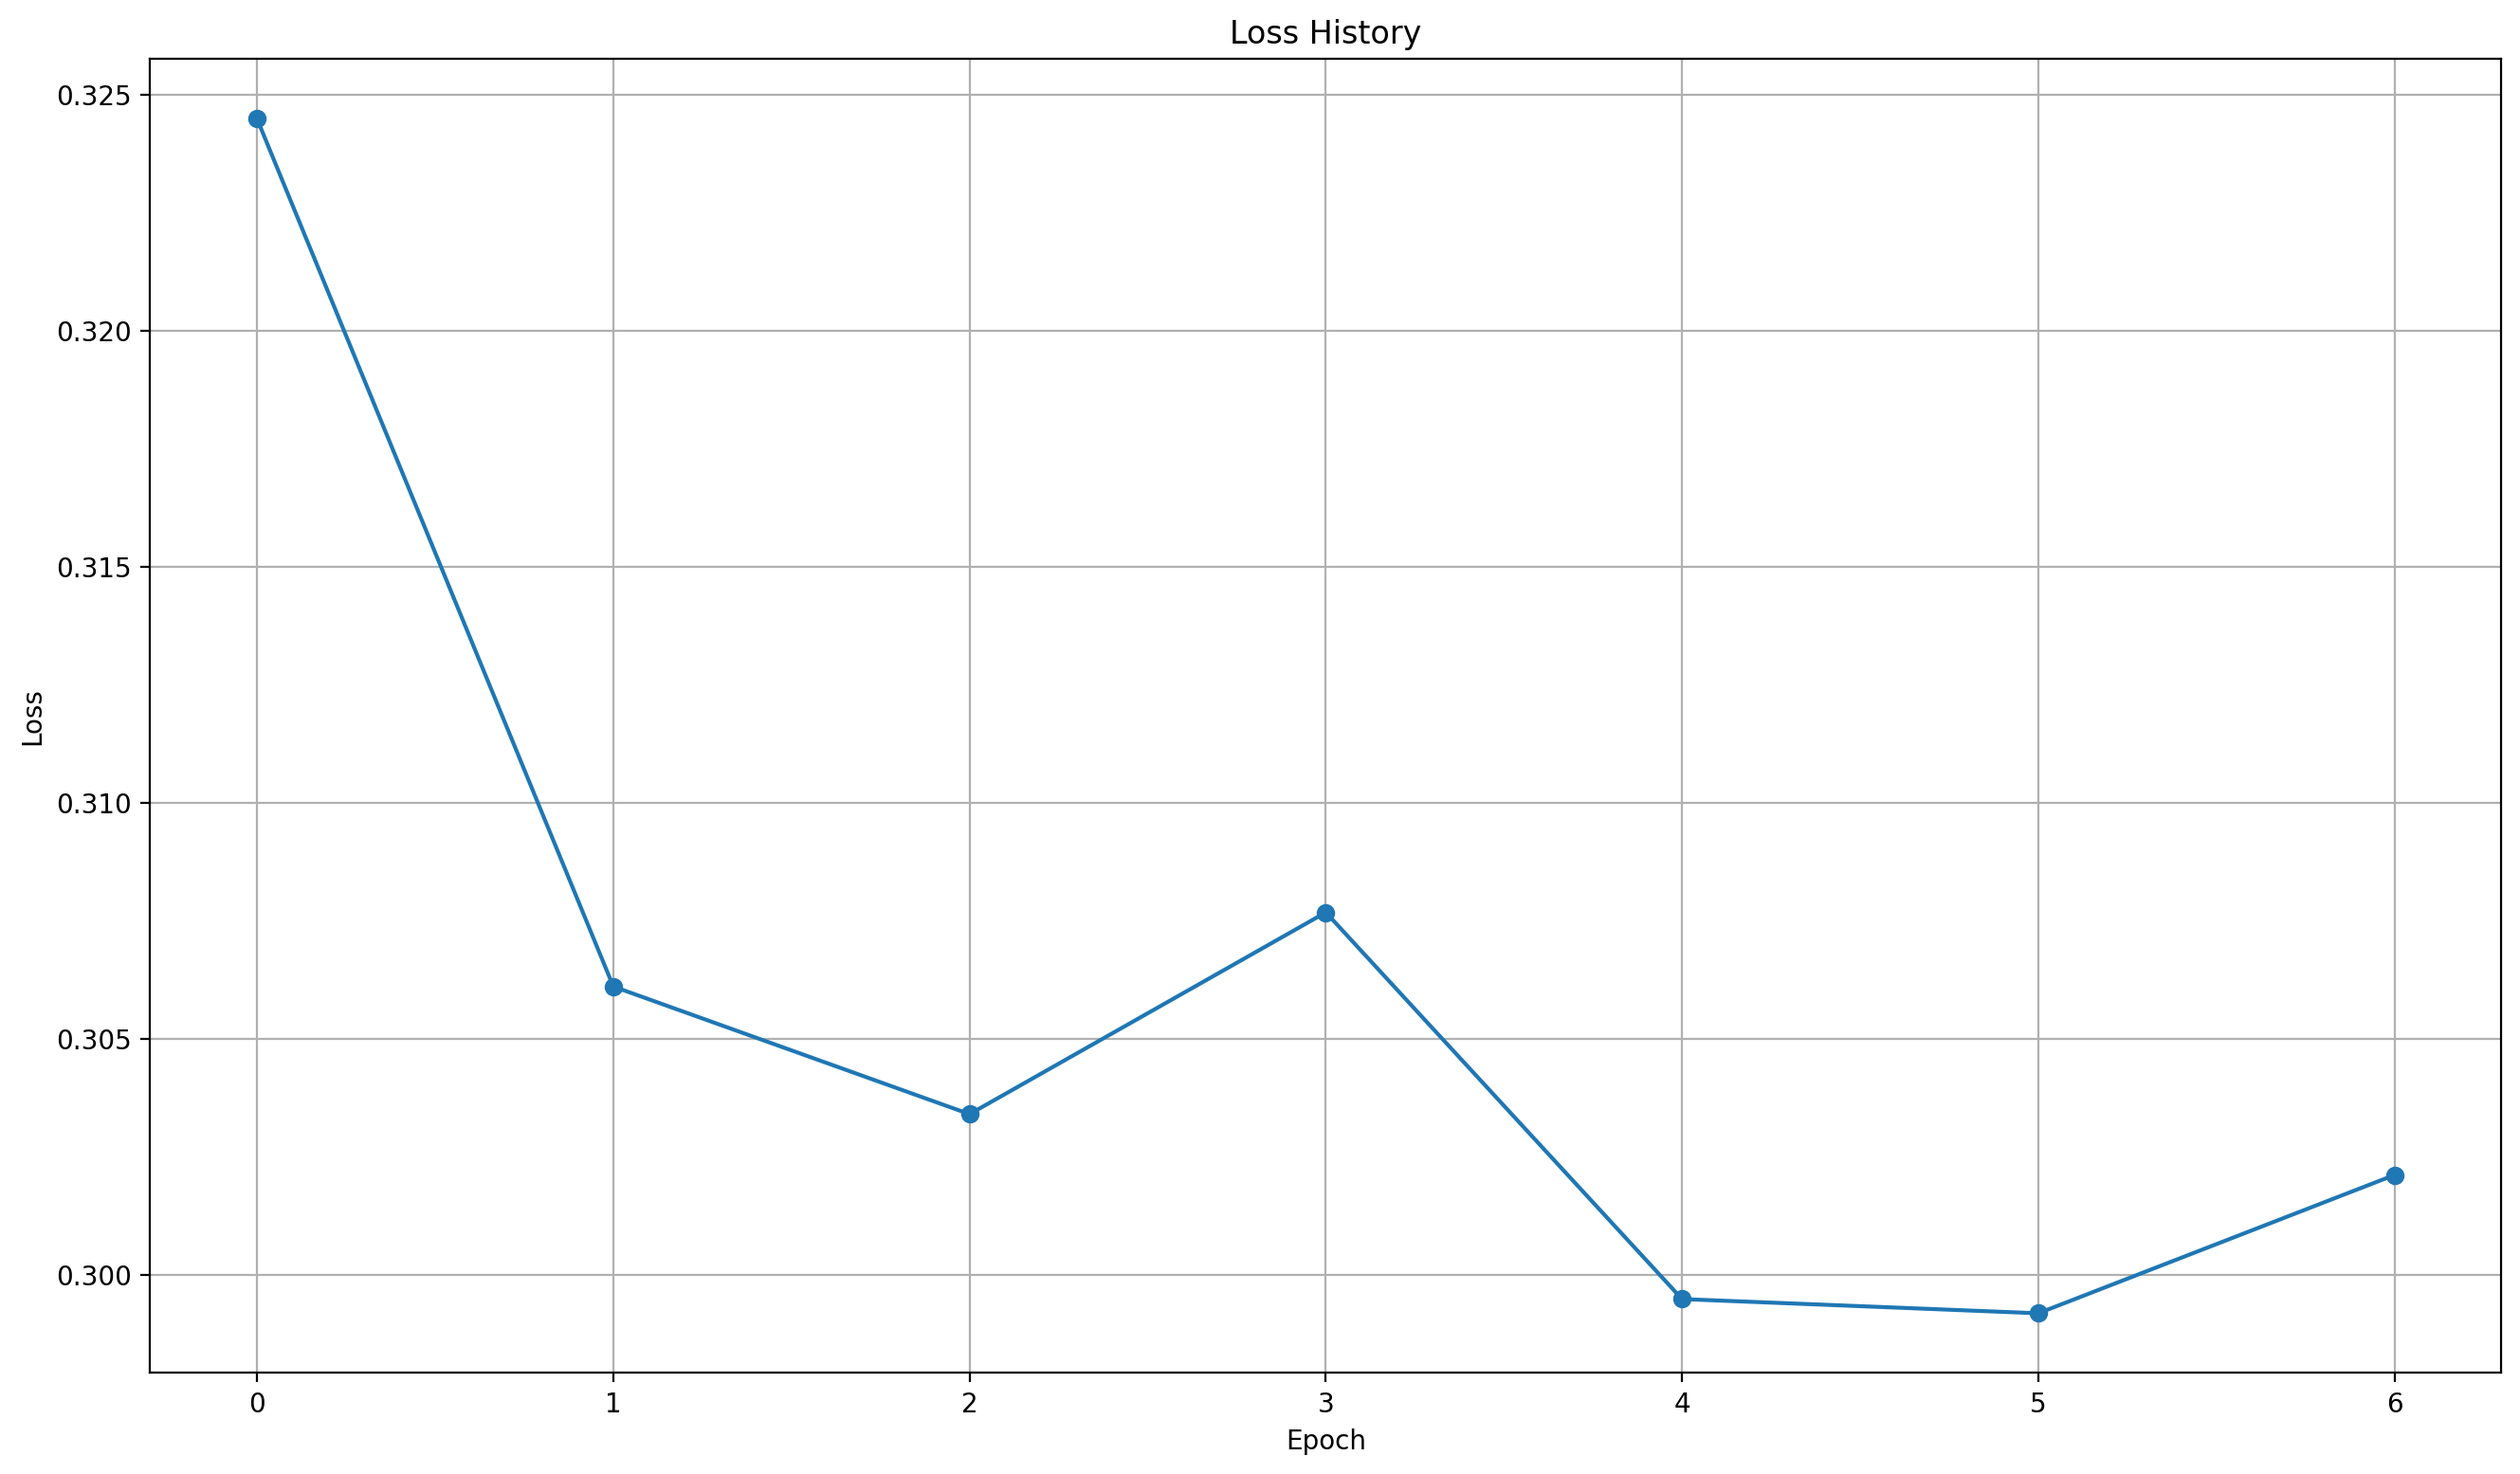

In [ ]:
# BTC / close + volume + rsi / trad_num = 6

data_name = 'BTC'
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/BTC/{data_name}.csv')

#hyperparameter 
data = data.drop(columns=['MA5', 'MA20', 'MA50', 'MA200']).head(2400) #ÏàòÏ†ï
n_clusters = 6
l_min = 18
l_max = 22
dist_thre = 2.5981  #ÏàòÏ†ï
clus_thre = 30
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 6
dataname = f'{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{data_name}_{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 

sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÏóê Îî∞Î•∏ Ìå®ÌÑ¥ Ïàò/Ïú†ÏÇ¨ÎèÑ/ÌèâÍ∑† dtw

# ÏúÑÏùò ÎÇ¥Ïö©Îì§ÏùÑ Ïù¥Ïö©Ìï¥ S&P500 Ïù¥ÎÇ¥ Î™®Îì† Í∏∞ÏóÖÏóêÏÑú Ìå®ÌÑ¥ Ï∂îÏ∂ú

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import pandas as pd

#KVUE Ï†úÍ±∞

data_folder = '/home/juwonkim/Pattern_Recognize/Data/Stock/1d-final'
csv_files = glob.glob(data_folder+'/*.csv')[98:]

for i, file in enumerate(csv_files):
    data = pd.read_csv(file)
    
    if len(data) < 1000:
       continue
    ticker = os.path.splitext(os.path.basename(file))[0] 

    # hyperparameter
    data = data[['Close', 'Volume', 'RSI']].head(2400)
    data = data.iloc[1:].reset_index(drop=True).astype(float)
    data = data.reset_index(drop=True)
    n_clusters = 6
    l_min = 18
    l_max = 22
    dist_thre = 2.6  #ÏàòÏ†ï
    clus_thre = 30
    variable = 'cvr'  #ÏàòÏ†ï
    trad_num = 6
    dataname = f'{ticker}_{variable}_{n_clusters}_{l_min}_{l_max}_{clus_thre}_{trad_num}' #ÏàòÏ†ï

    print('ticker: ', ticker)
    print(i)
    #if ticker == 'KVUE':
    #    print(i)

    #-----------------------
    #kernel Ï∂îÍ∞Ä
    kr = KernelReg([data['Close'].values], [data['Close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
    f = kr.fit([data['Close'].index.values])
    smooth_prices= pd.Series(data=f[0], index=data.index)
    data['Close'] = smooth_prices 
    #end
    
    sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
                dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
    sisc.fit(series=data,
            max_iters=300,
            init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
            barycenter='dba',
            plot_progress=True, 
            store_res=True, dataname=dataname)
            

In [ ]:
import os
import re

folder_path = "/home/juwonkim/Pattern_Recognize/SISC/pic/STOCK"
ticker_set = set()

# Ï†ïÍ∑úÌëúÌòÑÏãù: plot_Ïà´Ïûê_Î¨∏ÏûêÏó¥_...
pattern = re.compile(r"plot_\d+_([A-Z]+)_")

for filename in os.listdir(folder_path):
    match = pattern.match(filename)
    if match:
        ticker = match.group(1)
        ticker_set.add(ticker)

print(f"Ticker Í∞úÏàò: {len(ticker_set)}")
print("Tickers:", ticker_set)

In [40]:
#ÌäπÏ†ï Ìè¥ÎçîÏùò ÌååÏùº ÏÇ≠Ï†ú 

import os
import re

# Í≤ΩÎ°ú ÏÑ§Ï†ï
folder_path = '/home/juwonkim/Pattern_Recognize/SISC/pic/STOCK'

# Ï†ïÍ∑úÌëúÌòÑÏãù Ìå®ÌÑ¥: plot_Ï†ïÏàò_CEG_cvr_6_18_22_30_6.png
pattern = re.compile(r'^plot_\d+_GEV_cvr_6_18_22_30_6\.png$')

# Ìè¥Îçî ÎÇ¥ ÌååÏùº ÌôïÏù∏ Î∞è ÏÇ≠Ï†ú
for filename in os.listdir(folder_path):
    if pattern.match(filename):
        file_path = os.path.join(folder_path, filename)
        os.remove(file_path)
        print(f"Deleted: {file_path}")


Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_23_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_29_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_2_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_12_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_9_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_6_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_21_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_34_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_1_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_18_GEV_cvr_6_18_22_30_6.png
Deleted: /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/plot_24_GEV_cvr_6_18_22_30_6.png
Deleted: /home

# framework 2Î•º ÏúÑÌï¥ Ï†ÑÏ≤¥ ÎπÑÌä∏ÏΩîÏù∏ ÏãúÍ≥ÑÏó¥ÏóêÏÑú Ìå®ÌÑ¥ Ï∂îÏ∂ú 4693 

In [115]:
data.columns

Index(['close', 'v', 'RSI'], dtype='object')

In [31]:
# BTC / close + volume + rsi / trad_num = 6

data_name = 'XOM' # BTC, AAPL, XOM, BRKb
data = pd.read_csv(f'/home/juwonkim/Pattern_Recognize/Data/{data_name}/{data_name}_train.csv')

#hyperparameter 
drop_cols = ['date', 'MA5', 'MA20', 'MA50', 'MA200', 'OT']
data = data.drop(columns=[col for col in drop_cols if col in data.columns])
n_clusters = 8
l_min = 18
l_max = 22
dist_thre = 2.3 #ÏàòÏ†ï 1.33, 1.88, 2.3
clus_thre = 40 #40, 60
variable = 'cvr'  #ÏàòÏ†ï
trad_num = 6
dataname = f'Framework2_{data_name}_{variable}_clus{n_clusters}_newtrad{trad_num}' 
print('dataname: ', dataname)

#-----------------------
kr = KernelReg([data['close'].values], [data['close'].index.values], var_type='c', bw=np.full((1, 1), 0.8))
f = kr.fit([data['close'].index.values])
smooth_prices= pd.Series(data=f[0], index=data.index)
data['close'] = smooth_prices 


sisc = SISC(n_clusters=n_clusters, l_min=l_min, l_max=l_max, gamma=0.8, 
            dist_thre=dist_thre, clus_thre=clus_thre, trad_num=trad_num)
sisc.fit(series=data,
        max_iters=300,
        init_strategy='traditional', # Í∏∞Ï°¥Ïùò Ï†ÑÌÜµÏùÑ initial centroidÎ°ú ÏÑ§Ï†ï
        barycenter='dba',
        plot_progress=True, 
        store_res=True, dataname=dataname)
        

dataname:  Framework2_XOM_cvr_clus8_newtrad6


  0%|          | 0/300 [00:00<?, ?it/s]

-- Iter 1 --
dtw:  1.3035323181901084
-- Iter 2 --
dtw:  0.7946672781117372
dtw:  1.0052493052782463


KeyboardInterrupt: 

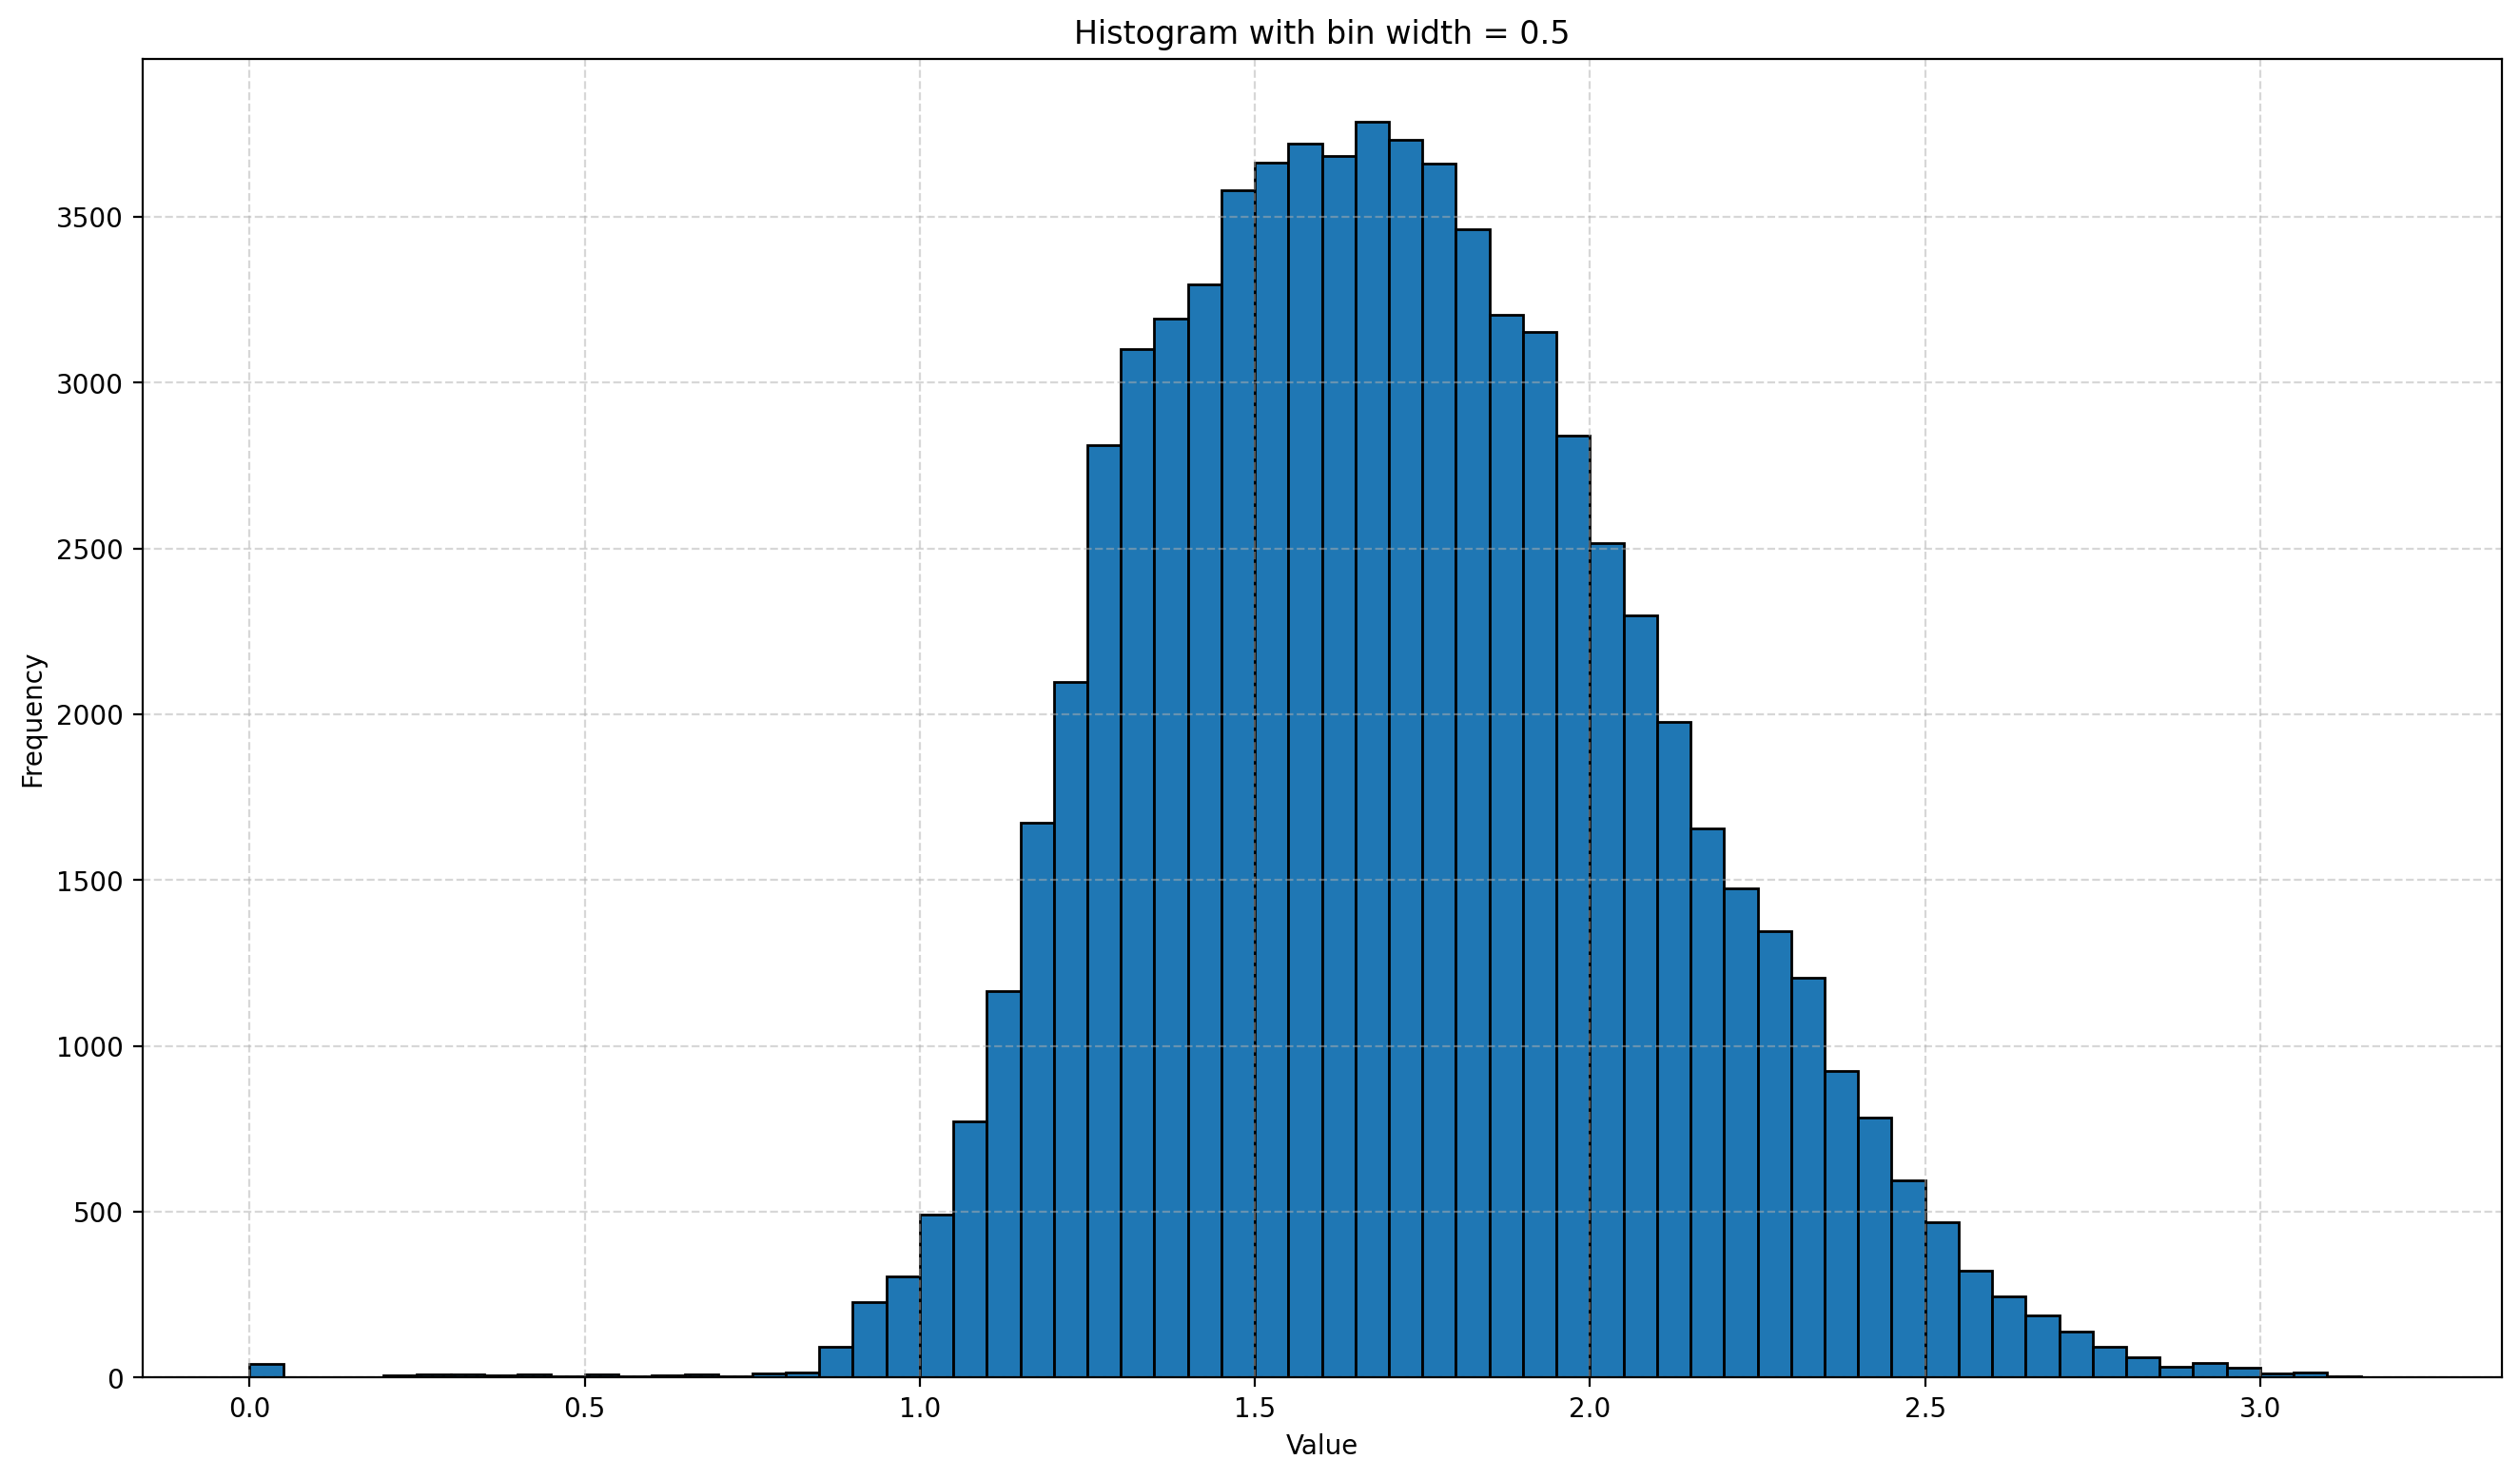

In [35]:
#dis_threÎ•º Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ min_dist_listÏùò Î∂ÑÌè¨ Î≥¥Í∏∞
import matplotlib.pyplot as plt

# binÏùò Í≤ΩÍ≥ÑÍ∞í ÎßåÎì§Í∏∞ (0.5 Í∞ÑÍ≤©)
min_val, max_val = min(min_dist_list), max(min_dist_list)
bins = np.arange(min_val, max_val + 0.05, 0.05)

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.hist(min_dist_list, bins=bins, edgecolor='black')

# ÎùºÎ≤® Î∞è Ï†úÎ™©
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with bin width = 0.5')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Ìè¥Îçî Ï†ïÎ¶¨

import os
import shutil
import re

# Í∏∞Ï§Ä Ìè¥Îçî Í≤ΩÎ°ú
base_dir = r'/home/juwonkim/Pattern_Recognize/SISC/pic/STOCK'

# Ï†ïÍ∑ú ÌëúÌòÑÏãù Ìå®ÌÑ¥ (XÎäî 0 Ïù¥ÏÉÅÏùò Ï†ïÏàò)
pattern = re.compile(r'plot_(\d+)_cvrmm_10_18_22_30_BTC\.png')

# A Ìè¥Îçî ÎÇ¥ Î™®Îì† ÌååÏùº ÌÉêÏÉâ
for filename in os.listdir(base_dir):
    match = pattern.match(filename)
    if match:
        x_value = match.group(1)
        target_folder = os.path.join(base_dir, f'cvrmm_10_18_22_30_BTC')
        os.makedirs(target_folder, exist_ok=True)  # Ìè¥Îçî ÏóÜÏúºÎ©¥ ÏÉùÏÑ±

        src_path = os.path.join(base_dir, filename)
        dst_path = os.path.join(target_folder, filename)

        shutil.move(src_path, dst_path)
        print(f"Moved {filename} to {target_folder}")

Moved plot_4_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_2_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_12_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_13_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_6_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_7_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_11_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_10_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_8_Framework2_BTC_cvr.png to /home/juwonkim/Pattern_Recognize/SISC/pic/STOCK/Framework2_BTC_cvr
Moved plot_1_Framework2_BTC_cvr.png to /ho

In [20]:
#Ï†ÄÏû•Îêú centroid, label, loss Îì±Îì± Î∂ÄÎ•¥Í∏∞

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle


#variable = 'cvr'
init = 'trad' # kmpp, trad
trad = '_4' # initÍ∞Ä kmeansÏù∏ Í≤ΩÏö∞ Îπà string

if init == 'kmpp':
    trad = ''

base_path = f'/home/juwonkim/Pattern_Recognize/SISC/res/{data_name}'
file_name = f'sisc_Framework2_{data_name}_{variable}_clus{n_clusters}_newtrad{trad_num}_k{n_clusters}_l18-22_dba_trad'
#file_name = f'sisc_{variable}_{n_cluster}_18_22_30_BTC{trad}_k{n_cluster}_l18-22_dba_{init}' 


file_path = f'{base_path}/{file_name}_centroids.pkl'
with open(file_path, 'rb') as f:
    centroid = pickle.load(f)
    print('centroids shape: ', centroid.shape)
    
file_path = f'{base_path}/{file_name}_labels.pkl'
with open(file_path, 'rb') as f:
    label = pickle.load(f)
    
file_path = f'{base_path}/{file_name}_subsequences.pkl'
with open(file_path, 'rb') as f:
    subsequence = pickle.load(f)
        

centroids shape:  (8, 22, 3)


In [21]:
# Ïú†ÏÇ¨Ìïú class ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞

import numpy as np
from dtaidistance import dtw
from tslearn.barycenters import dtw_barycenter_averaging


def normalize_centroids_minmax(centroid_list):
    # Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ± (ÏõêÎ≥∏ Ïú†ÏßÄ)
    normalized = np.copy(centroid_list)

    for i in range(normalized.shape[0]):  # Í∞Å centroidÎßàÎã§
        for j in range(normalized.shape[2]):  # Í∞Å Î≥ÄÏàòÎßàÎã§
            series = normalized[i, :, j]
            min_val = np.min(series)
            max_val = np.max(series)
            
            # Î∂ÑÎ™®Í∞Ä 0Ïù¥ ÎêòÎäî Í≤ΩÏö∞ Î∞©ÏßÄ (max == minÏù∏ Í≤ΩÏö∞ 0ÏúºÎ°ú Ï±ÑÏõÄ)
            if max_val - min_val == 0:
                normalized[i, :, j] = 0
            else:
                normalized[i, :, j] = (series - min_val) / (max_val - min_val)
    
    return normalized


def update_centroids_and_labels(centroid, label, subsequence, threshold=0.735):
    centroid = normalize_centroids_minmax(centroid)
    num_classes = centroid.shape[0]
    n_variable = centroid.shape[2]
    print()
    #current_centroids = list(range(num_classes))  # ÌòÑÏû¨ centroid Î≤àÌò∏
    centroid_map = {i: i for i in range(num_classes)}  # ÏÇ≠Ï†úÎêú centroidÏùò label Îß§Ìïë

    # 1. Ïú†ÏÇ¨Ìïú centroid Ïåç Ï∞æÍ≥† Ï†úÍ±∞ (DTW < threshold)
    to_remove = set()
    for i in range(num_classes):
        for j in range(i + 1, num_classes):
            if i in to_remove or j in to_remove:
                continue
            
            d = dtw_ndim.distance(centroid[i], centroid[j])
            #print(d)
            if d < (threshold * np.sqrt(n_variable)):
                print(f"DTW({i}, {j}) = {d:.3f} < {threshold * n_variable}, removing {j}")
                to_remove.add(j)
                centroid_map[j] = i

    # 2. label ÏóÖÎç∞Ïù¥Ìä∏
    new_label = np.array([centroid_map.get(l, l) for l in label])

    # 3. ÎÇ®ÏùÄ centroid Î≤àÌò∏ Î¶¨Ïä§Ìä∏
    remaining_classes = sorted(set(new_label))
    new_centroid = []

    # 4. centroid Ïû¨Í≥ÑÏÇ∞
    for c in remaining_classes:
        idxs = np.where(new_label == c)[0]
        if len(idxs) == 0:
            continue
        seqs = subsequence[idxs]
        new_c = dtw_barycenter_averaging(seqs, barycenter_size=22, tol=1e-5)
        new_centroid.append(new_c)

    new_centroid = np.array(new_centroid)

    return new_centroid, new_label

new_centroid, new_label = update_centroids_and_labels(centroid, label, subsequence)

with open(f'{base_path}/{file_name}_centroids_new.pkl', 'wb') as file:
    pickle.dump(new_centroid, file)
with open(f'{base_path}/{file_name}_labels_new.pkl', 'wb') as file:
    pickle.dump(new_label, file)

centroids shape:  (8, 22, 3)
Î≥ÄÍ≤Ω ÌõÑ


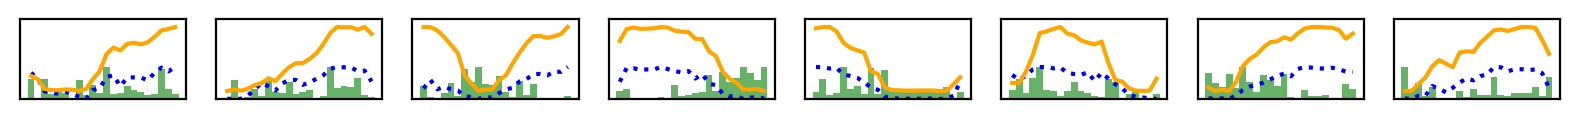

Î≥ÄÍ≤Ω Ï†Ñ


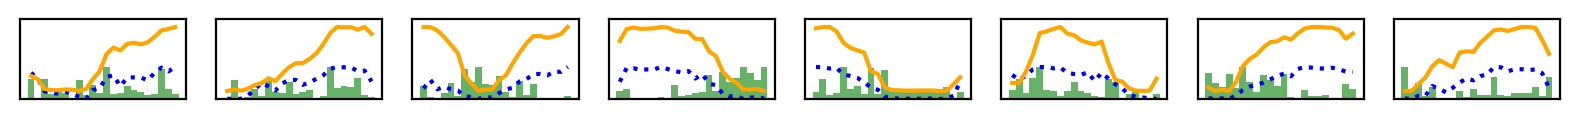

In [22]:
#centroid ÏãúÍ∞ÅÌôî

file_path = f'{base_path}/{file_name}_centroids_new.pkl'
with open(file_path, 'rb') as f:
    new_centroid = pickle.load(f)
    print('centroids shape: ', new_centroid.shape)
    
    
def plot_c(centroid, variable):
    color_map = {
        'c': 'orange',
        'v': 'green',
        'r': 'blue',
        'm': 'purple',
    }

    range_map = {
        'c': (0.1, 0.9),
        'v': (0, 0.4),
        'r': (0.0, 0.4),
        'm': (0.1, 0.9),
    }

    colors = [color_map[var] for var in variable]
    ranges = [range_map[var] for var in variable]

    num_vars = len(variable)
    n_rows = 1
    n_cols = len(centroid)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows * 0.7))

    if n_cols == 1:
        axs = [axs]

    for i, center in enumerate(centroid):
        if center.shape[1] != num_vars:
            raise ValueError(f"Centroid[{i}] has {center.shape[1]} variables, but 'variable' has {num_vars}.")

        for j in reversed(range(center.shape[1])):  # ÏãúÍ≥ÑÏó¥ Ïó≠ÏàúÏúºÎ°ú Í∑∏Î¶¨Í∏∞
            series = center[:, j]
            min_val, max_val = np.min(series), np.max(series)
            if max_val - min_val == 0:
                norm_series = np.zeros_like(series)
            else:
                norm_series = (series - min_val) / (max_val - min_val)

            low, high = ranges[j]
            scaled_series = norm_series * (high - low) + low

            if variable[j] == 'v':
                axs[i].bar(
                    np.arange(len(scaled_series)),
                    scaled_series,
                    color=colors[j],
                    width=1.0,
                    alpha=0.6
                )
            else:
                linestyle = ':' if variable[j] == 'r' else '-'
                axs[i].plot(
                    scaled_series,
                    color=colors[j],
                    alpha=1,
                    linestyle=linestyle
                )
        
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

print('Î≥ÄÍ≤Ω ÌõÑ')
plot_c(new_centroid, variable)

print('Î≥ÄÍ≤Ω Ï†Ñ')
plot_c(centroid, variable)

In [32]:
import matplotlib.pyplot as plt
print("Current default linewidth:", plt.rcParams['lines.linewidth'])

Current default linewidth: 1.5


In [25]:
#Ï†ÄÏû•Îêú centroid, label, loss Îì±Îì± Î∂ÄÎ•¥Í∏∞

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle


file_path = f'{base_path}/{file_name}_centroids_new.pkl'
with open(file_path, 'rb') as f:
    centroid = pickle.load(f)
    print('centroids shape: ', centroid.shape)
    #print('centroids: ', centroid)
    
file_path = f'{base_path}/{file_name}_labels_new.pkl'
with open(file_path, 'rb') as f:
    label = pickle.load(f)
    print(Counter(label))
    print('label total num: ', len(label))
    print('ÌèâÍ∑† sub Ìå®ÌÑ¥ Ïàò: ', len(label) / len(set(label)))
    #print('labels: ', label)
    
file_path = f'{base_path}/{file_name}_segmentation.pkl'
with open(file_path, 'rb') as f:
    data = pickle.load(f)
    print('segmentation total num: ', len(data))
    #print('segmentation: ', data)
    
file_path = f'{base_path}/{file_name}_subsequences.pkl'
with open(file_path, 'rb') as f:
    subsequence = pickle.load(f)
    print('subsequences shape: ', data.shape)
    #print('subsequences: ', data)
    

file_path = f'{base_path}/{file_name}_MinMeanLoss.txt'
with open(file_path, "rb") as f:  # binary Î™®ÎìúÎ°ú Ïó¥Í∏∞
    data = pickle.load(f)
    print('loss: ', data)
        

centroids shape:  (8, 22, 3)
Counter({np.int64(3): 134, np.int64(4): 90, np.int64(2): 84, np.int64(0): 83, np.int64(1): 77, np.int64(6): 69, np.int64(5): 61, np.int64(7): 44})
label total num:  642
ÌèâÍ∑† sub Ìå®ÌÑ¥ Ïàò:  80.25
segmentation total num:  642
subsequences shape:  (642,)
loss:  0.20867277502084966


In [98]:
!nvidia-smi

Sat May 17 08:51:31 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               On  | 00000000:01:00.0 Off |                  Off |
| 44%   73C    P2             298W / 300W |  43616MiB / 49140MiB |    100%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [99]:
import pickle

# ÌîºÌÅ¥ ÌååÏùº Ïó¥Í∏∞
with open('/home/juwonkim/Pattern_Recognize/ShapeNet/shapenet/result/BTC_shapelet_label.pkl', 'rb') as f:
    data = pickle.load(f)
data

[np.int64(0), np.int64(3), np.int64(1), np.int64(5), np.int64(4)]

In [100]:
import pickle

# ÌîºÌÅ¥ ÌååÏùº Ïó¥Í∏∞
with open(f'/home/juwonkim/Pattern_Recognize/ShapeNet/shapenet/result/{data_name}_shapelet.pkl', 'rb') as f:
    data = pickle.load(f)
data[1].shape

(3, 60)

In [20]:
import pickle

# ÌîºÌÅ¥ ÌååÏùº Ïó¥Í∏∞
with open('/home/juwonkim/Pattern_Recognize/ShapeNet/shapenet/result/BTC_utility_sort_index.pkl', 'rb') as f:
    data = pickle.load(f)
data

array([2, 4, 3, 1, 0])

In [21]:
import pickle

# ÌîºÌÅ¥ ÌååÏùº Ïó¥Í∏∞
with open('/home/juwonkim/Pattern_Recognize/ShapeNet/shapenet/result/BTC_test.pkl', 'rb') as f:
    data = pickle.load(f)
data.shape

(94, 3, 100)

In [22]:
import pickle

# ÌîºÌÅ¥ ÌååÏùº Ïó¥Í∏∞
with open('/home/juwonkim/Pattern_Recognize/ShapeNet/shapenet/result/BTC_test_label.pkl', 'rb') as f:
    data = pickle.load(f)
data

array([0, 4, 4, 1, 4, 3, 1, 5, 0, 5, 2, 4, 5, 5, 4, 2, 4, 2, 3, 5, 3, 2,
       3, 2, 0, 4, 2, 0, 2, 1, 0, 4, 2, 3, 4, 1, 0, 3, 2, 1, 1, 2, 2, 1,
       2, 5, 3, 4, 0, 0, 3, 3, 3, 4, 0, 1, 4, 1, 2, 5, 1, 5, 4, 4, 4, 3,
       0, 5, 2, 4, 5, 3, 4, 3, 3, 1, 4, 1, 3, 4, 3, 2, 3, 0, 5, 0, 4, 5,
       1, 3, 2, 4, 0, 1])

centroids shape:  (8, 22, 3)
Counter({0: 142, 4: 103, 2: 76, 5: 70, 1: 69, 7: 63, 6: 60, 3: 56})
label total num:  639
ÌèâÍ∑† sub Ìå®ÌÑ¥ Ïàò:  79.875
segmentation total num:  639
subsequences shape:  (639,)
loss:  0.19994882836957958
üí° ÏµúÎã® DTW Í±∞Î¶¨: 1.4854 (ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 vs 7)
   ‚àöd Ï†ïÍ∑úÌôî Í±∞Î¶¨: 0.8576

centroids shape:  (8, 22, 3)
Î≥ÄÍ≤Ω ÌõÑ


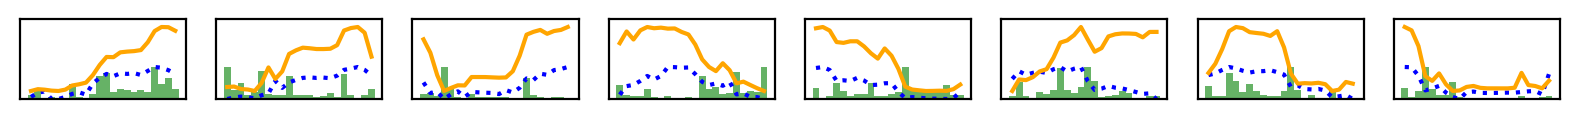

Î≥ÄÍ≤Ω Ï†Ñ


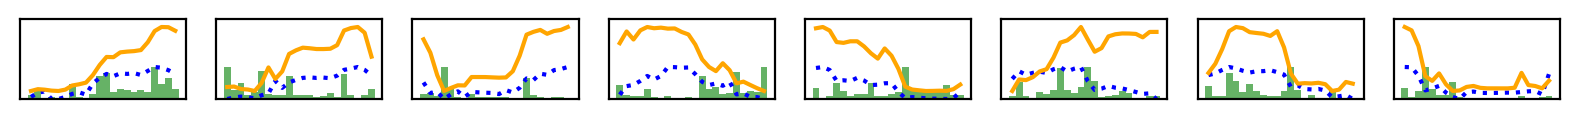

In [25]:

dataname = '/home/juwonkim/Pattern_Recognize/SISC/res/BTC/sisc_Framework2_BTC_cvr_clus8_trad6_k8_l18-22_dba_trad' 
variable = 'cvr'


#Ï†ÄÏû•Îêú centroid, label, loss Îì±Îì± Î∂ÄÎ•¥Í∏∞

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle


file_path = f'{dataname}_centroids.pkl'
with open(file_path, 'rb') as f:
    centroid = pickle.load(f)
    print('centroids shape: ', centroid.shape)
    #print('centroids: ', centroid)
    
file_path = f'{dataname}_labels.pkl'
with open(file_path, 'rb') as f:
    label = pickle.load(f)
    print(Counter(label))
    print('label total num: ', len(label))
    print('ÌèâÍ∑† sub Ìå®ÌÑ¥ Ïàò: ', len(label) / len(set(label)))
    #print('labels: ', label)
    
file_path = f'{dataname}_segmentation.pkl'
with open(file_path, 'rb') as f:
    data = pickle.load(f)
    print('segmentation total num: ', len(data))
    #print('segmentation: ', data)
    
file_path = f'{dataname}_subsequences.pkl'
with open(file_path, 'rb') as f:
    subsequence = pickle.load(f)
    print('subsequences shape: ', data.shape)
    #print('subsequences: ', data)
    

file_path = f'{dataname}_MinMeanLoss.txt'
with open(file_path, "rb") as f:  # binary Î™®ÎìúÎ°ú Ïó¥Í∏∞
    data = pickle.load(f)
    print('loss: ', data)
        
        
        
        
        

# Ïú†ÏÇ¨Ìïú class ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞

import numpy as np
from dtaidistance import dtw
from tslearn.barycenters import dtw_barycenter_averaging


def normalize_centroids_minmax(centroid_list):
    # Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ± (ÏõêÎ≥∏ Ïú†ÏßÄ)
    normalized = np.copy(centroid_list)

    for i in range(normalized.shape[0]):  # Í∞Å centroidÎßàÎã§
        for j in range(normalized.shape[2]):  # Í∞Å Î≥ÄÏàòÎßàÎã§
            series = normalized[i, :, j]
            min_val = np.min(series)
            max_val = np.max(series)
            
            # Î∂ÑÎ™®Í∞Ä 0Ïù¥ ÎêòÎäî Í≤ΩÏö∞ Î∞©ÏßÄ (max == minÏù∏ Í≤ΩÏö∞ 0ÏúºÎ°ú Ï±ÑÏõÄ)
            if max_val - min_val == 0:
                normalized[i, :, j] = 0
            else:
                normalized[i, :, j] = (series - min_val) / (max_val - min_val)
    
    return normalized

# Î™®Îì† centroid Ïåç ÏÇ¨Ïù¥Ïùò DTW Í±∞Î¶¨ Ï§ë ÏµúÏÜåÍ∞í Í≥ÑÏÇ∞
def compute_min_dtw_distance(centroids):
    centroids = normalize_centroids_minmax(centroids)
    num_classes = centroids.shape[0]
    n_variable = centroids.shape[2]

    min_dist = float('inf')
    min_pair = (None, None)

    for i in range(num_classes):
        for j in range(i + 1, num_classes):
            d = dtw_ndim.distance(centroids[i], centroids[j])
            if d < min_dist:
                min_dist = d
                min_pair = (i, j)

    print(f"üí° ÏµúÎã® DTW Í±∞Î¶¨: {min_dist:.4f} (ÌÅ¥Îü¨Ïä§ÌÑ∞ {min_pair[0]} vs {min_pair[1]})")
    print(f"   ‚àöd Ï†ïÍ∑úÌôî Í±∞Î¶¨: {min_dist / np.sqrt(n_variable):.4f}")



def update_centroids_and_labels(centroid, label, subsequence, threshold=0.735):
    centroid = normalize_centroids_minmax(centroid)
    num_classes = centroid.shape[0]
    n_variable = centroid.shape[2]
    print()
    #current_centroids = list(range(num_classes))  # ÌòÑÏû¨ centroid Î≤àÌò∏
    centroid_map = {i: i for i in range(num_classes)}  # ÏÇ≠Ï†úÎêú centroidÏùò label Îß§Ìïë

    # 1. Ïú†ÏÇ¨Ìïú centroid Ïåç Ï∞æÍ≥† Ï†úÍ±∞ (DTW < threshold)
    to_remove = set()
    for i in range(num_classes):
        for j in range(i + 1, num_classes):
            if i in to_remove or j in to_remove:
                continue
            
            d = dtw_ndim.distance(centroid[i], centroid[j])
            #print(d)
            if d < (threshold * np.sqrt(n_variable)):
                print(f"DTW({i}, {j}) = {d:.3f} < {threshold * n_variable}, removing {j}")
                to_remove.add(j)
                centroid_map[j] = i

    # 2. label ÏóÖÎç∞Ïù¥Ìä∏
    new_label = np.array([centroid_map.get(l, l) for l in label])

    # 3. ÎÇ®ÏùÄ centroid Î≤àÌò∏ Î¶¨Ïä§Ìä∏
    remaining_classes = sorted(set(new_label))
    new_centroid = []

    # 4. centroid Ïû¨Í≥ÑÏÇ∞
    for c in remaining_classes:
        idxs = np.where(new_label == c)[0]
        if len(idxs) == 0:
            continue
        seqs = subsequence[idxs]
        new_c = dtw_barycenter_averaging(seqs, barycenter_size=22, tol=1e-5)
        new_centroid.append(new_c)

    new_centroid = np.array(new_centroid)

    return new_centroid, new_label

compute_min_dtw_distance(centroid)
new_centroid, new_label = update_centroids_and_labels(centroid, label, subsequence)

with open(f'{dataname}_centroids_new.pkl', 'wb') as file:
    pickle.dump(new_centroid, file)
with open(f'{dataname}_labels_new.pkl', 'wb') as file:
    pickle.dump(new_label, file)
    
    
#centroid ÏãúÍ∞ÅÌôî

file_path = f'{dataname}_centroids_new.pkl'
with open(file_path, 'rb') as f:
    new_centroid = pickle.load(f)
    print('centroids shape: ', new_centroid.shape)
    
    
def plot_c(centroid, variable):
    color_map = {
        'c': 'orange',
        'v': 'green',
        'r': 'blue',
        'm': 'purple',
    }

    range_map = {
        'c': (0.1, 0.9),
        'v': (0, 0.4),
        'r': (0.0, 0.4),
        'm': (0.1, 0.9),
    }

    colors = [color_map[var] for var in variable]
    ranges = [range_map[var] for var in variable]

    num_vars = len(variable)
    n_rows = 1
    n_cols = len(centroid)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows * 0.7))

    if n_cols == 1:
        axs = [axs]

    for i, center in enumerate(centroid):
        if center.shape[1] != num_vars:
            raise ValueError(f"Centroid[{i}] has {center.shape[1]} variables, but 'variable' has {num_vars}.")

        for j in reversed(range(center.shape[1])):  # ÏãúÍ≥ÑÏó¥ Ïó≠ÏàúÏúºÎ°ú Í∑∏Î¶¨Í∏∞
            series = center[:, j]
            min_val, max_val = np.min(series), np.max(series)
            if max_val - min_val == 0:
                norm_series = np.zeros_like(series)
            else:
                norm_series = (series - min_val) / (max_val - min_val)

            low, high = ranges[j]
            scaled_series = norm_series * (high - low) + low

            if variable[j] == 'v':
                axs[i].bar(
                    np.arange(len(scaled_series)),
                    scaled_series,
                    color=colors[j],
                    width=1.0,
                    alpha=0.6
                )
            else:
                linestyle = ':' if variable[j] == 'r' else '-'
                axs[i].plot(
                    scaled_series,
                    color=colors[j],
                    alpha=1,
                    linestyle=linestyle
                )
        
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

print('Î≥ÄÍ≤Ω ÌõÑ')
plot_c(new_centroid, variable)

print('Î≥ÄÍ≤Ω Ï†Ñ')
plot_c(centroid, variable)

In [23]:
file_path = f'{dataname}_centroids_new.pkl'
with open(file_path, 'rb') as f:
    centroid = pickle.load(f)
    print('centroids shape: ', centroid.shape)
    #print('centroids: ', centroid)
    
file_path = f'{dataname}_labels_new.pkl'
with open(file_path, 'rb') as f:
    label = pickle.load(f)
    print(Counter(label))
    print('label total num: ', len(label))
    print('ÌèâÍ∑† sub Ìå®ÌÑ¥ Ïàò: ', len(label) / len(set(label)))
    #print('labels: ', label)
 
 

centroids shape:  (5, 22, 1)
Counter({np.int64(3): 240, np.int64(2): 149, np.int64(1): 131, np.int64(6): 75, np.int64(0): 63})
label total num:  658
ÌèâÍ∑† sub Ìå®ÌÑ¥ Ïàò:  131.6
